In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
# Import train dataframe that got form Kaggle
train_df = pd.read_csv('datasets/train.csv')

In [3]:
train_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
train_df.shape

(2051, 81)

## Data Cleaning

### Train Data

In [5]:
# Check for type of each columns
for key,value in train_df.dtypes.iteritems():
    print(key,value)

Id int64
PID int64
MS SubClass int64
MS Zoning object
Lot Frontage float64
Lot Area int64
Street object
Alley object
Lot Shape object
Land Contour object
Utilities object
Lot Config object
Land Slope object
Neighborhood object
Condition 1 object
Condition 2 object
Bldg Type object
House Style object
Overall Qual int64
Overall Cond int64
Year Built int64
Year Remod/Add int64
Roof Style object
Roof Matl object
Exterior 1st object
Exterior 2nd object
Mas Vnr Type object
Mas Vnr Area float64
Exter Qual object
Exter Cond object
Foundation object
Bsmt Qual object
Bsmt Cond object
Bsmt Exposure object
BsmtFin Type 1 object
BsmtFin SF 1 float64
BsmtFin Type 2 object
BsmtFin SF 2 float64
Bsmt Unf SF float64
Total Bsmt SF float64
Heating object
Heating QC object
Central Air object
Electrical object
1st Flr SF int64
2nd Flr SF int64
Low Qual Fin SF int64
Gr Liv Area int64
Bsmt Full Bath float64
Bsmt Half Bath float64
Full Bath int64
Half Bath int64
Bedroom AbvGr int64
Kitchen AbvGr int64
Kitchen 

In [6]:
def find_col_type(dataframe, types):
    """This function will return the list column name for a specific types
    
    Input Arguments: 
    dataframe: dataframe that want to look for.
    types    : type of column that want to look for.
    
    Returns: list of column name for specific type 
    """
    col_list = []
    if types == 'Numerical':
        col_list = [col for col in dataframe.columns if (dataframe[col].dtypes == 'int64' or dataframe[col].dtypes == 'float64')]
    elif types == 'Categorical':
        col_list = [col for col in dataframe.columns if (dataframe[col].dtypes == 'object')]
    return col_list

In [7]:
# Find list of numerical column
num_col = find_col_type(train_df, 'Numerical')
num_col

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [8]:
# Find list of categorical column
cat_col = find_col_type(train_df, 'Categorical')
cat_col

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [9]:
len(num_col)

39

In [10]:
len(cat_col)

42

In [11]:
train_df.shape

(2051, 81)

> Category columns

In [12]:
# Check for missing value in categorical columns
train_df[cat_col].isnull().sum()

MS Zoning            0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin Type 2      56
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Paved Drive          0
Pool QC           2042
Fence             1651
Misc Feature      1986
Sale Type            0
dtype: int64

In [13]:
# Create function to display boxplot
# Will use this function for categolical columns
def cat_boxplot(dataframe, feature = None, target = 'SalePrice', list_feature = None):
    if list_feature == None:
        plt.figure(figsize = (10,8))
        sns.boxplot(data = dataframe, x = feature, y = target, hue = feature)
        plt.grid()
    
    elif list_feature != None:
        for col in list_feature:
            plt.figure(figsize = (15,12))
            sns.boxplot(data = dataframe, x = col, y = target, hue = col)
            plt.title(f'{target} in each {col}')
            plt.xticks(rotation = 90)
            plt.grid()
            plt.show()
            plt.clf();

In [14]:
# Create function to display scatter plot
# Will use this function for numerical columns
def num_scatterplot(dataframe, feature = None, target = 'SalePrice', list_feature = None):
    if list_feature == None:
        plt.figure(figsize = (10,8))
        sns.scatterplot(data = dataframe, x = feature, y = target)
        plt.title(f'{feature} vs {target}')
        
    elif list_feature != None:
        for col in list_feature:
            plt.figure(figsize = (15,12))
            sns.scatterplot(data = dataframe, x = col, y = target)
            plt.title(f'{target} in each {col}')
            plt.show()
            plt.clf();

In [15]:
# This function will return missing value, unique value, value count for each unique value and return boxplot or scatter plot due to type of that column
def column_info(dataframe, column):
    if dataframe[column].dtypes == 'O':
        print('NaN:',dataframe[column].isna().sum())
        print('\nValue Counts')
        print(dataframe[column].value_counts())
        print('\nUnique Value')
        print(dataframe[column].unique())
        print('')
    else:
        print('Missing Value')
        print('NaN:',dataframe[column].isna().sum())
        print('')
    
    if 'SalePrice' in dataframe.columns:
        # Use function from above to show the visualization
        if dataframe[column].dtypes == 'object':
            cat_boxplot(dataframe, column)
        else:
            num_scatterplot(dataframe, column)
    else:
        pass

In [16]:
# This function is to replace missing value
def fill_none(dataframe, column, value):
    na_list = list(dataframe[dataframe[column].isna() == True].index)
    col_index = dataframe.columns.get_loc(column)
    dataframe.iloc[na_list, col_index] = value

> Alley

NaN: 1911

Value Counts
Grvl    85
Pave    55
Name: Alley, dtype: int64

Unique Value
[nan 'Pave' 'Grvl']



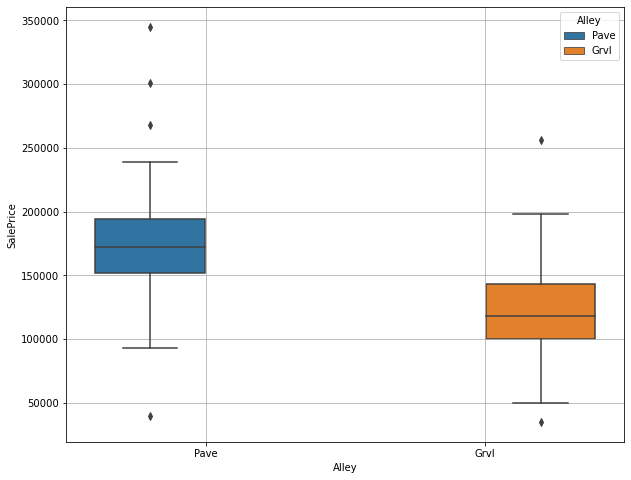

In [17]:
# Look for null value, value counts and unique value
# Type of Alley --> Grvl = Gravel, Pave = Paved, NA = No alley access
column_info(train_df, 'Alley')

In [18]:
# We can see from the boxplot graph that Alley might has an effect on sale price, so I will replace the null values with NA which is No alley access
fill_none(train_df, 'Alley', 'NA')

NaN: 0

Value Counts
NA      1911
Grvl      85
Pave      55
Name: Alley, dtype: int64

Unique Value
['NA' 'Pave' 'Grvl']



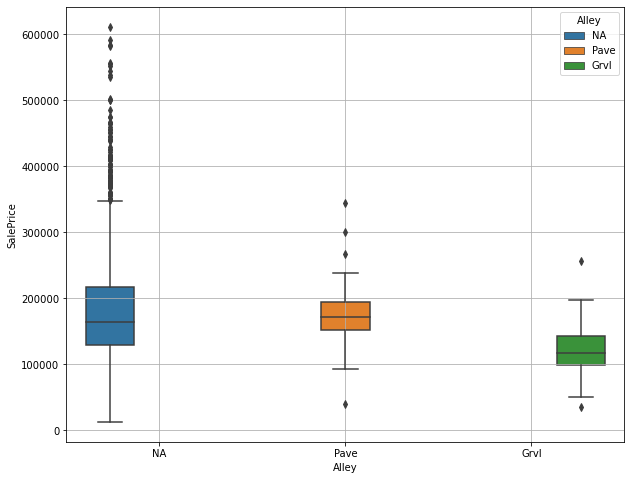

In [19]:
column_info(train_df,'Alley')

> Mas Vnr Type

NaN: 22

Value Counts
None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

Unique Value
['BrkFace' 'None' nan 'Stone' 'BrkCmn']



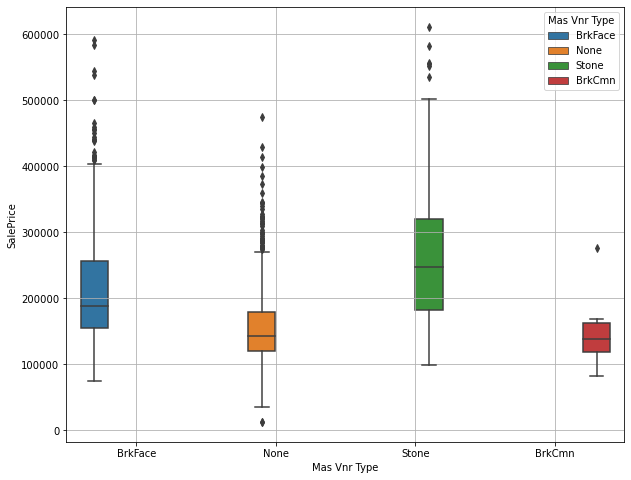

In [20]:
column_info(train_df,'Mas Vnr Type')

In [21]:
# In Mansonry veneer type there are 5 type which are Brick Commonm,Brick Face, Cinder Block, None and Stone.
# But when we look at unique value Cinder Block isn't there.
train_df[train_df['Mas Vnr Type'] == 'CBlock']

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 81 columns]

In [22]:
# We can see from the box plot that each of Mansonry veneer type have different sale price so I will use this column to predict the sale price
# So I assume that the missing value is Cinder Block
fill_none(train_df, 'Mas Vnr Type','CBlock')

NaN: 0

Value Counts
None       1218
BrkFace     630
Stone       168
CBlock       22
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

Unique Value
['BrkFace' 'None' 'CBlock' 'Stone' 'BrkCmn']



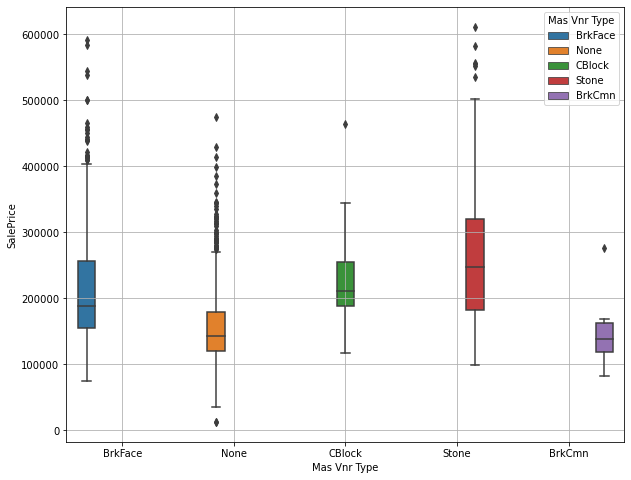

In [23]:
column_info(train_df,'Mas Vnr Type')

> Bsmt Qual

NaN: 55

Value Counts
TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

Unique Value
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']



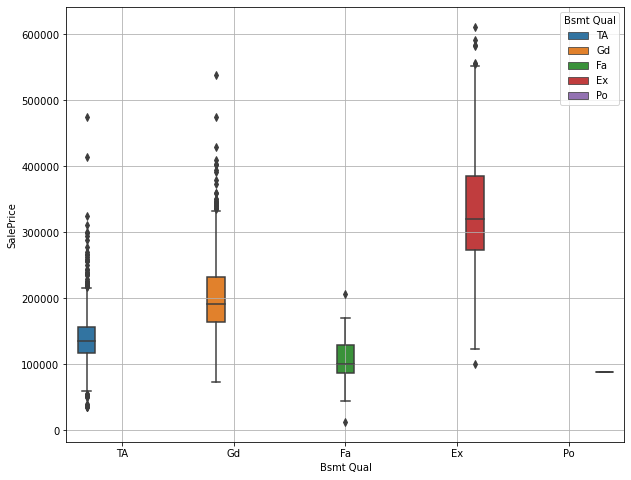

In [24]:
# This column show height of the basement which are Excellent (100+ inches), Good (90-99 inches), Typical (80-89 inches), Fair (70-79 inches), Poor (<70 inches) and no basement.
column_info(train_df,'Bsmt Qual')

In [25]:
# We can see from the box plot that each of basement quality or height have different sale price so I will use this column to predict the sale price
# So I assume that null values are no basement then  fill the null values with NA which is no basement.
fill_none(train_df, 'Bsmt Qual','NA')

NaN: 0

Value Counts
TA    887
Gd    864
Ex    184
Fa     60
NA     55
Po      1
Name: Bsmt Qual, dtype: int64

Unique Value
['TA' 'Gd' 'Fa' 'NA' 'Ex' 'Po']



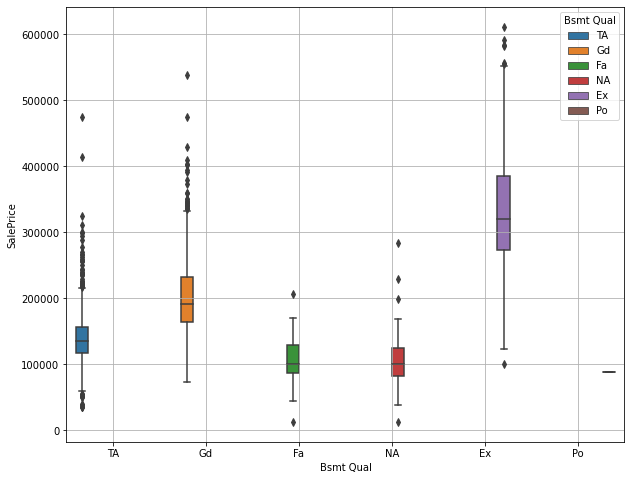

In [26]:
column_info(train_df,'Bsmt Qual')

> Bsmt Cond

NaN: 55

Value Counts
TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

Unique Value
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']



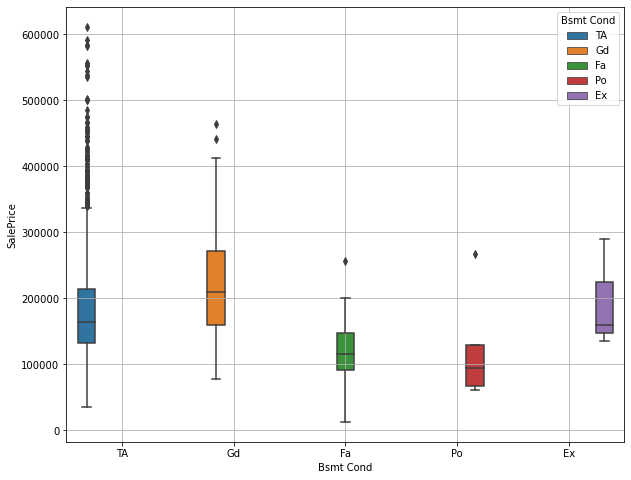

In [27]:
# This column show general condition of basement which are Excellent, Good, Typical, Fair, Poor and no basement.
column_info(train_df,'Bsmt Cond')

In [28]:
# We can see from the box plot that each of condition of basement have different sale price so I will use this column to predict the sale price
# So I assume that null values are no basement.
# NA --> No basement
fill_none(train_df, 'Bsmt Cond','NA')

NaN: 0

Value Counts
TA    1834
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

Unique Value
['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex']



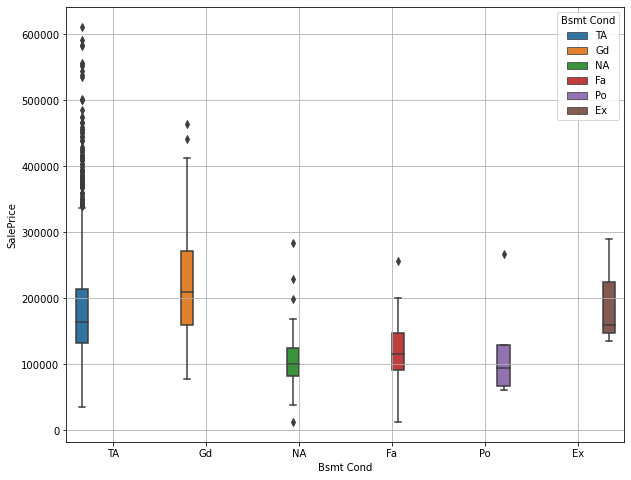

In [29]:
column_info(train_df,'Bsmt Cond')

> Bsmt Exposure

NaN: 58

Value Counts
No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

Unique Value
['No' 'Gd' 'Av' nan 'Mn']



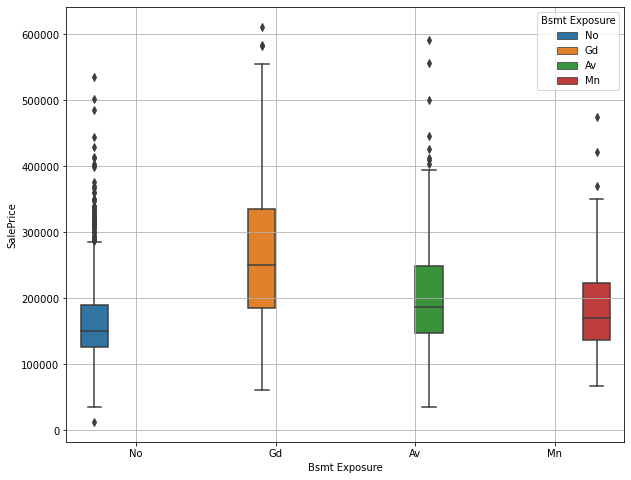

In [30]:
# This column show Walkout or garden level basement wall
# No --> No exposure, Gd --> Good Exposure, Av --> Average Exposure, Mn --> Minimum Exposure
column_info(train_df,'Bsmt Exposure')

In [31]:
# I assume that missing value are no basement
# NA --> No basement
fill_none(train_df, 'Bsmt Exposure', 'NA')

NaN: 0

Value Counts
No    1339
Av     288
Gd     203
Mn     163
NA      58
Name: Bsmt Exposure, dtype: int64

Unique Value
['No' 'Gd' 'Av' 'NA' 'Mn']



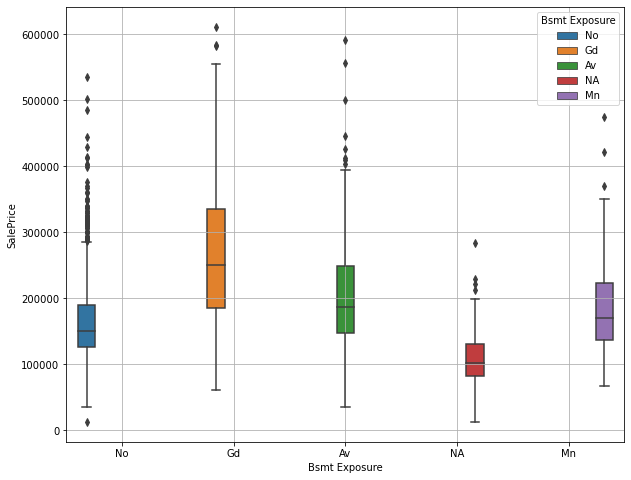

In [32]:
column_info(train_df,'Bsmt Exposure')

> BsmtFin Type 1

NaN: 55

Value Counts
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

Unique Value
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']



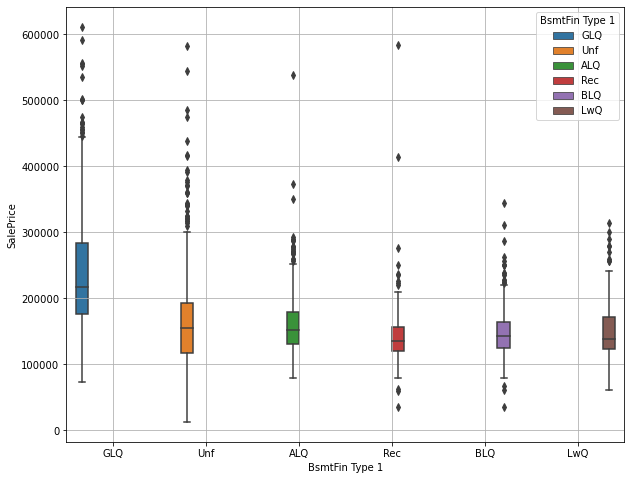

In [33]:
column_info(train_df,'BsmtFin Type 1')

In [34]:
# NA --> No basement
fill_none(train_df, 'BsmtFin Type 1','NA')

NaN: 0

Value Counts
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NA      55
Name: BsmtFin Type 1, dtype: int64

Unique Value
['GLQ' 'Unf' 'ALQ' 'Rec' 'NA' 'BLQ' 'LwQ']



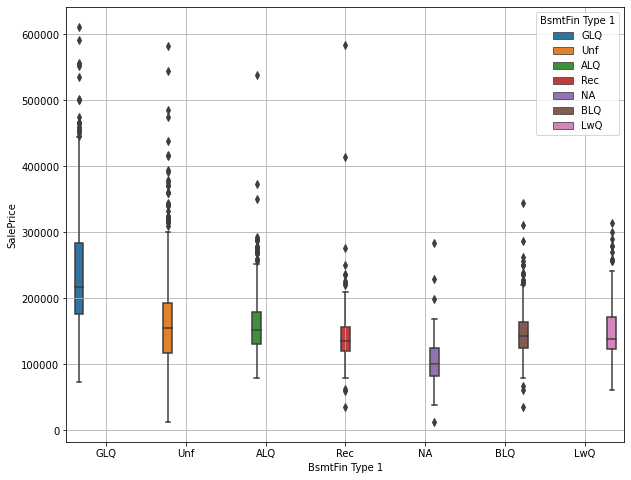

In [35]:
column_info(train_df,'BsmtFin Type 1')

> BsmtFin Type 2

NaN: 56

Value Counts
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

Unique Value
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']



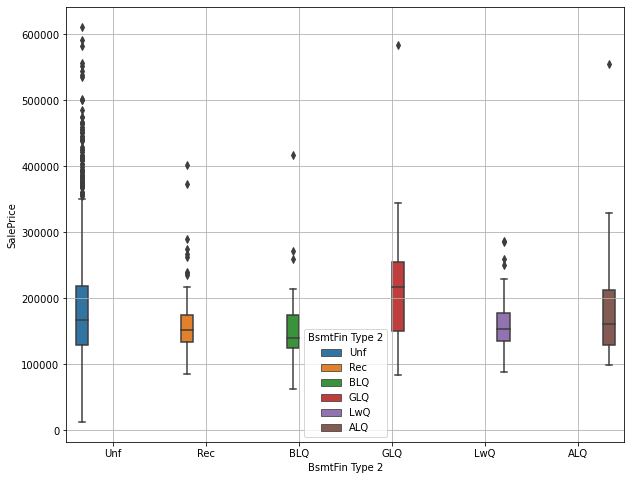

In [36]:
column_info(train_df,'BsmtFin Type 2')

In [37]:
# NA --> no basement
fill_none(train_df, 'BsmtFin Type 2', 'NA')

NaN: 0

Value Counts
Unf    1749
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

Unique Value
['Unf' 'Rec' 'NA' 'BLQ' 'GLQ' 'LwQ' 'ALQ']



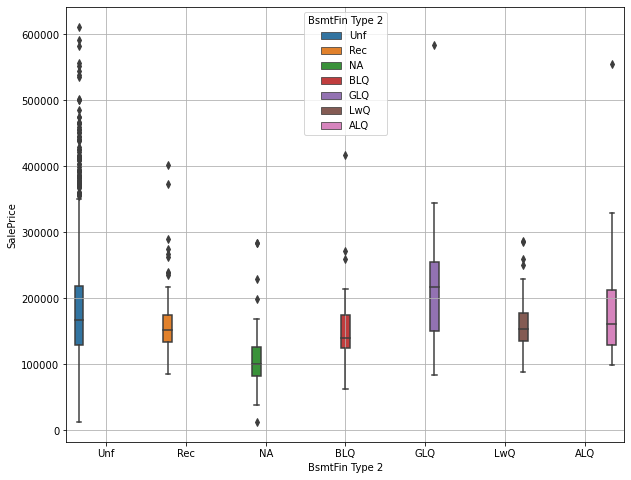

In [38]:
column_info(train_df,'BsmtFin Type 2')

In [39]:
train_df[train_df['Bsmt Qual'] == 'NA'][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2
12          NA        NA            NA             NA             NA
93          NA        NA            NA             NA             NA
114         NA        NA            NA             NA             NA
146         NA        NA            NA             NA             NA
183         NA        NA            NA             NA             NA
240         NA        NA            NA             NA             NA
249         NA        NA            NA             NA             NA
256         NA        NA            NA             NA             NA
390         NA        NA            NA             NA             NA
437         NA        NA            NA             NA             NA
485         NA        NA            NA             NA             NA
499         NA        NA            NA             NA             NA
514         NA        NA            NA             NA             NA
580         NA        NA            NA             NA             NA
581         NA        NA            NA             NA             NA
616         NA        NA            NA             NA             NA
635         NA        NA            NA             NA             NA
642         NA        NA            NA             NA             NA
696         NA        NA            NA             NA             NA
700         NA        NA            NA             NA             NA
737         NA        NA            NA             NA             NA
772         NA        NA            NA             NA             NA
790         NA        NA            NA             NA             NA
794         NA        NA            NA             NA             NA
924         NA        NA            NA             NA             NA
933         NA        NA            NA             NA             NA
954         NA        NA            NA             NA             NA
1007        NA        NA            NA             NA             NA
1022        NA        NA            NA             NA             NA
1049        NA        NA            NA             NA             NA
1089        NA        NA            NA             NA             NA
1098        NA        NA            NA             NA             NA
1125        NA        NA            NA             NA             NA
1157        NA        NA            NA             NA             NA
1211        NA        NA            NA             NA             NA
1222        NA        NA            NA             NA             NA
1252        NA        NA            NA             NA             NA
1256        NA        NA            NA             NA             NA
1270        NA        NA            NA             NA             NA
1327        NA        NA            NA             NA             NA
1331        NA        NA            NA             NA             NA
1377        NA        NA            NA             NA             NA
1387        NA        NA            NA             NA             NA
1428        NA        NA            NA             NA             NA
1481        NA        NA            NA             NA             NA
1594        NA        NA            NA             NA             NA
1620        NA        NA            NA             NA             NA
1681        NA        NA            NA             NA             NA
1684        NA        NA            NA             NA             NA
1686        NA        NA            NA             NA             NA
1859        NA        NA            NA             NA             NA
1875        NA        NA            NA             NA             NA
1889        NA        NA            NA             NA             NA
1933        NA        NA            NA             NA             NA
2010        NA        NA            NA             NA             NA

In [40]:
train_df[train_df['Bsmt Qual'] == 'NA'][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']].shape

(55, 5)

> Fireplace Qu

NaN: 1000

Value Counts
Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace Qu, dtype: int64

Unique Value
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']



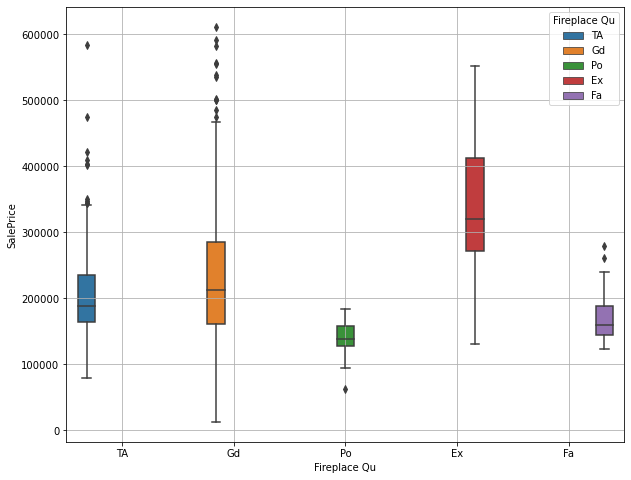

In [41]:
# This column shows the quality of fireplace
# There are many missing value (1000)
# But I think the missing value was because the houses had no fireplaces.
column_info(train_df,'Fireplace Qu')

In [42]:
# So I check with Fireplaces column which show that how many fireplace in each house has.
# We can see that there are 1000 houses with no fireplaces, so I will fill the missing value with NA (No fireplaces).
train_df['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

In [43]:
 # NA --> No fireplace
fill_none(train_df, 'Fireplace Qu', 'NA')

NaN: 0

Value Counts
NA    1000
Gd     523
TA     407
Fa      59
Ex      31
Po      31
Name: Fireplace Qu, dtype: int64

Unique Value
['NA' 'TA' 'Gd' 'Po' 'Ex' 'Fa']



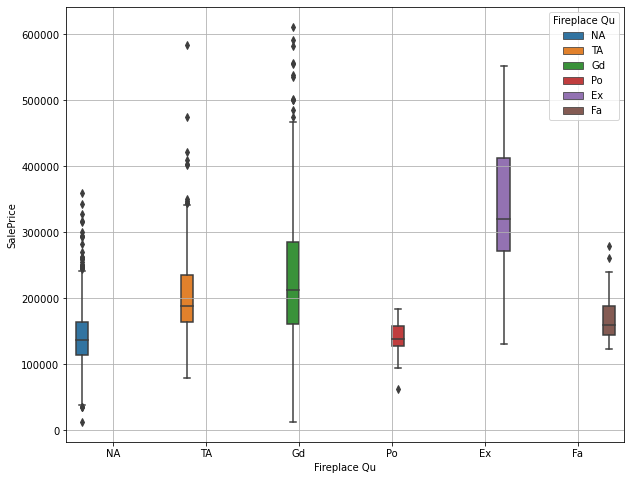

In [44]:
column_info(train_df,'Fireplace Qu')

> Garage Type

NaN: 113

Value Counts
Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

Unique Value
['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']



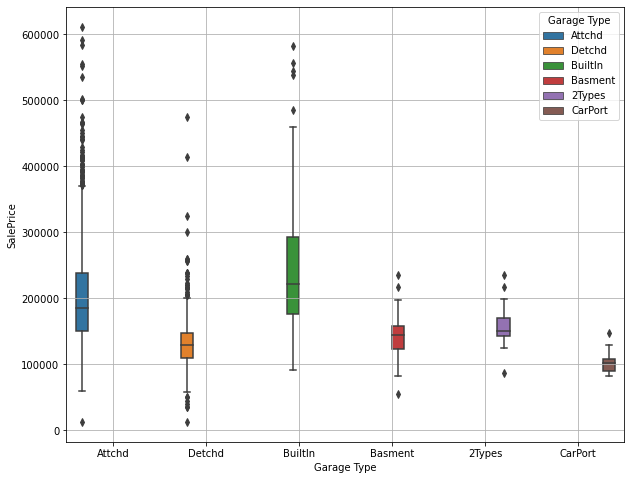

In [45]:
# This columns show type of garage in each house
column_info(train_df,'Garage Type')

In [46]:
# I assume that there are missing values because those house dont have any garage
# NA --> no garage
fill_none(train_df, 'Garage Type', 'NA')

NaN: 0

Value Counts
Attchd     1213
Detchd      536
BuiltIn     132
NA          113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

Unique Value
['Attchd' 'Detchd' 'BuiltIn' 'Basment' 'NA' '2Types' 'CarPort']



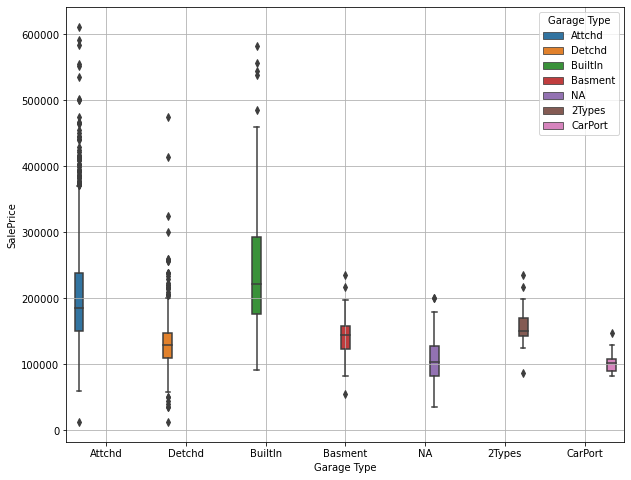

In [47]:
column_info(train_df,'Garage Type')

>Garage Finish

NaN: 114

Value Counts
Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

Unique Value
['RFn' 'Unf' 'Fin' nan]



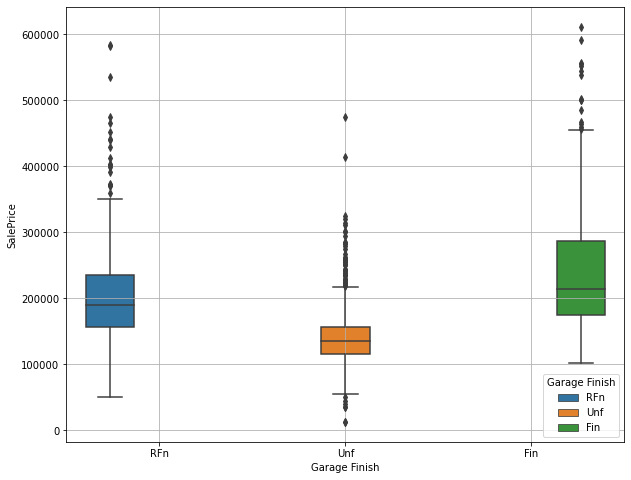

In [48]:
# This columns show is that house already finsh construct the garage or not
column_info(train_df,'Garage Finish')

In [49]:
# I assume that there are missing values because those house dont have any garage
# NA --> no garage
fill_none(train_df, 'Garage Finish','NA')

NaN: 0

Value Counts
Unf    849
RFn    579
Fin    509
NA     114
Name: Garage Finish, dtype: int64

Unique Value
['RFn' 'Unf' 'Fin' 'NA']



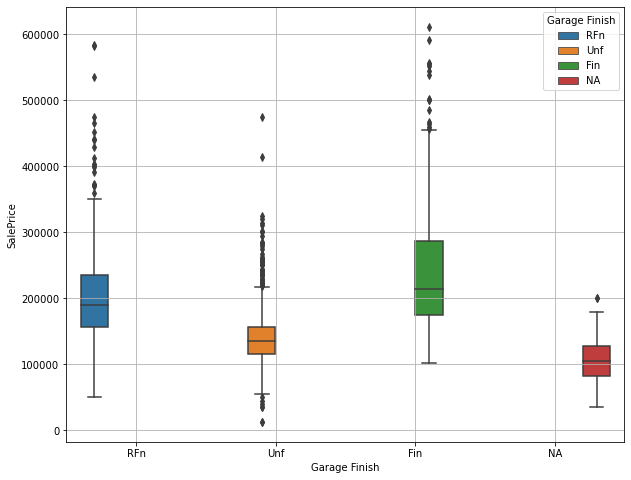

In [50]:
column_info(train_df,'Garage Finish')

> Garage Qual

NaN: 114

Value Counts
TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

Unique Value
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']



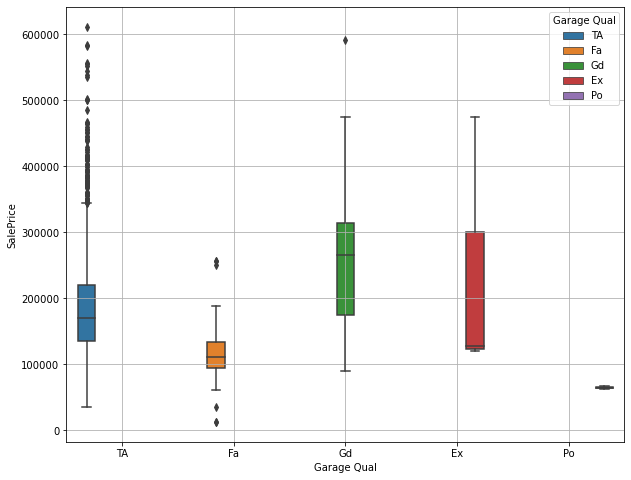

In [51]:
# This column shows quality of garage
column_info(train_df,'Garage Qual')

In [52]:
# I assume that there are missing values because those house dont have any garage
# NA --> no garage
fill_none(train_df, 'Garage Qual','NA')

NaN: 0

Value Counts
TA    1832
NA     114
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

Unique Value
['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']



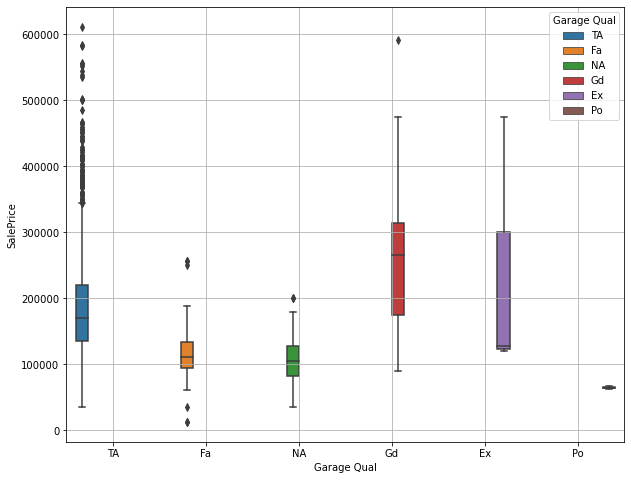

In [53]:
column_info(train_df,'Garage Qual')

> Garage Cond

NaN: 114

Value Counts
TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

Unique Value
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']



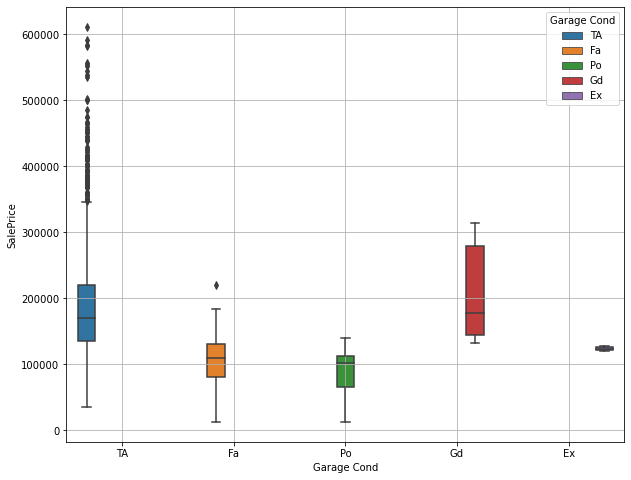

In [54]:
# This column shows garage condition
column_info(train_df,'Garage Cond')

In [55]:
# I assume that there are missing values because those house dont have any garage
# NA --> no garage
fill_none(train_df, 'Garage Cond','NA')

NaN: 0

Value Counts
TA    1868
NA     114
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

Unique Value
['TA' 'Fa' 'NA' 'Po' 'Gd' 'Ex']



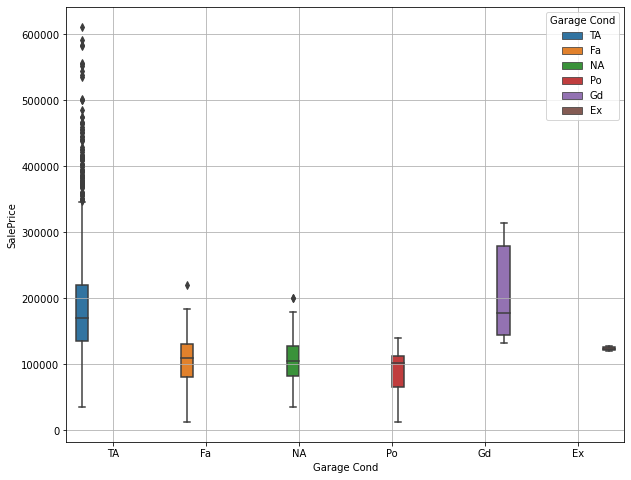

In [56]:
column_info(train_df,'Garage Cond')

> Pool QC

NaN: 2042

Value Counts
Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

Unique Value
[nan 'Fa' 'Gd' 'Ex' 'TA']



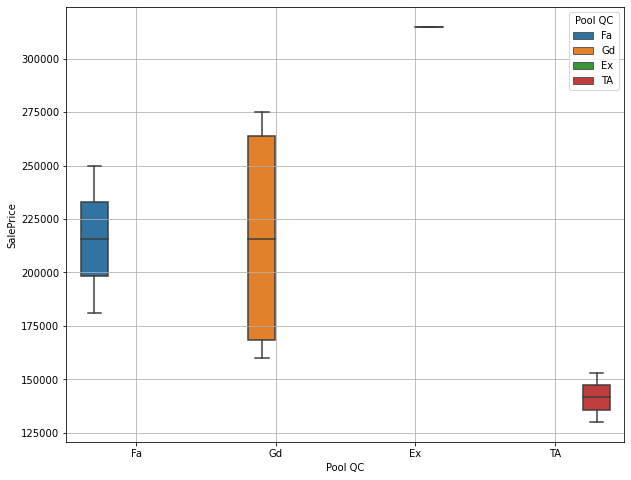

In [57]:
# There are many missing value in this column, but probably because many house dont have pool.
column_info(train_df,'Pool QC')

In [58]:
# When we check with pool area column which represent the area of pools, we can see that there are 2042 houses that dont have pools.
train_df['Pool Area'].value_counts()

0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: Pool Area, dtype: int64

In [59]:
# For pool area column there is no missing value
train_df['Pool Area'].isnull().sum()

0

In [60]:
# Since the numbers of missing value in pool quality and 0 area in pool area column are match, So I will replace missing values with NA
# NA --> No pool
fill_none(train_df, 'Pool QC','NA')

NaN: 0

Value Counts
NA    2042
Gd       4
TA       2
Fa       2
Ex       1
Name: Pool QC, dtype: int64

Unique Value
['NA' 'Fa' 'Gd' 'Ex' 'TA']



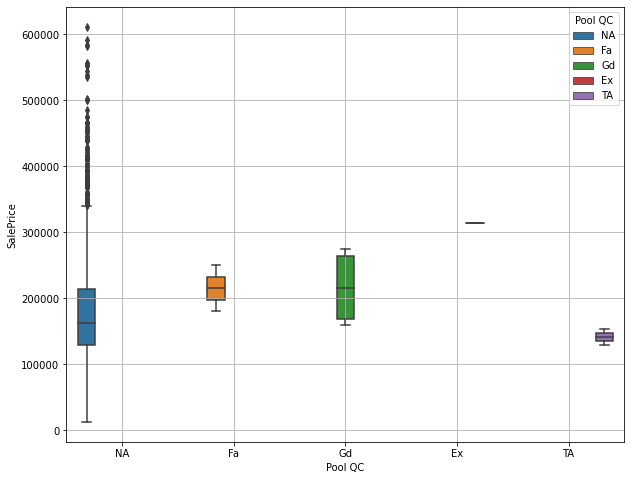

In [61]:
column_info(train_df,'Pool QC')

> Fence

NaN: 1651

Value Counts
MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

Unique Value
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']



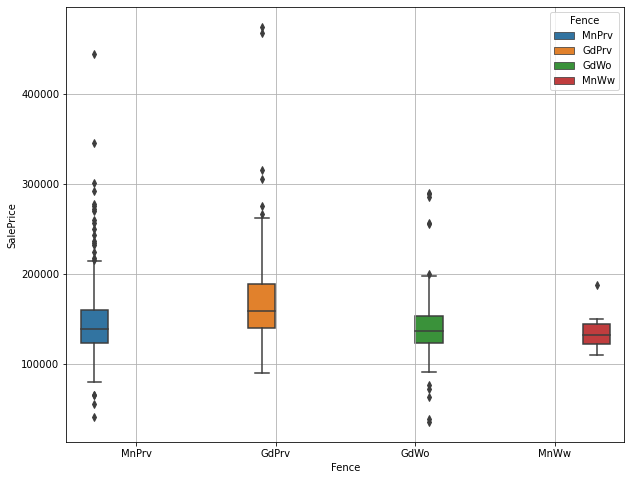

In [62]:
# This column show fence quality
column_info(train_df,'Fence')

In [63]:
# I assume that there are missing value because those house dont have fence.
fill_none(train_df, 'Fence','NA')

NaN: 0

Value Counts
NA       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

Unique Value
['NA' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']



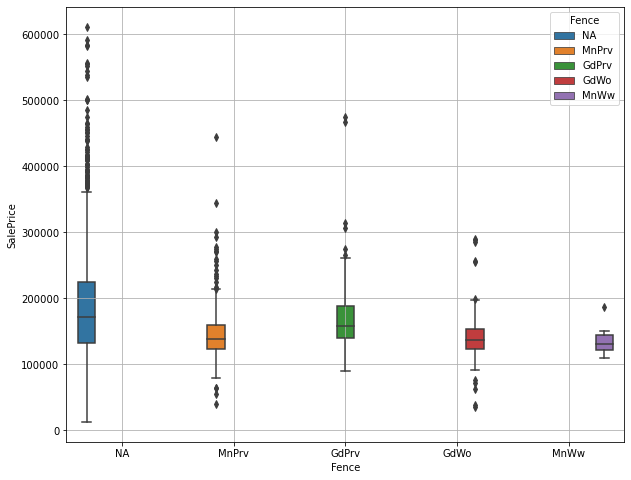

In [64]:
column_info(train_df,'Fence')

In [65]:
# We can see that from the Boxplot of each fence there are not very different sale prices and have many missing value so I decided to drop this column.
train_df.drop(columns = 'Fence', inplace = True)

> Misc Feature

NaN: 1986

Value Counts
Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

Unique Value
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']



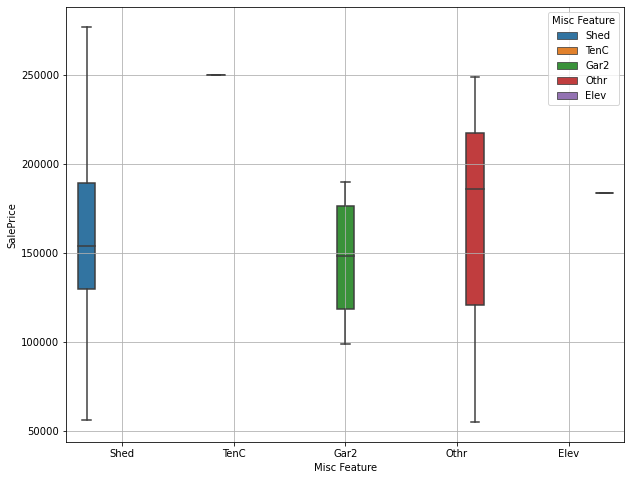

In [66]:
# This column shows Miscellaneous feature not covered in other categories such as elevator, tennis court
column_info(train_df,'Misc Feature')

In [67]:
# I assume that there are missing values because those house dont have it
# NA --> None
fill_none(train_df, 'Misc Feature','NA')

NaN: 0

Value Counts
NA      1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: Misc Feature, dtype: int64

Unique Value
['NA' 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']



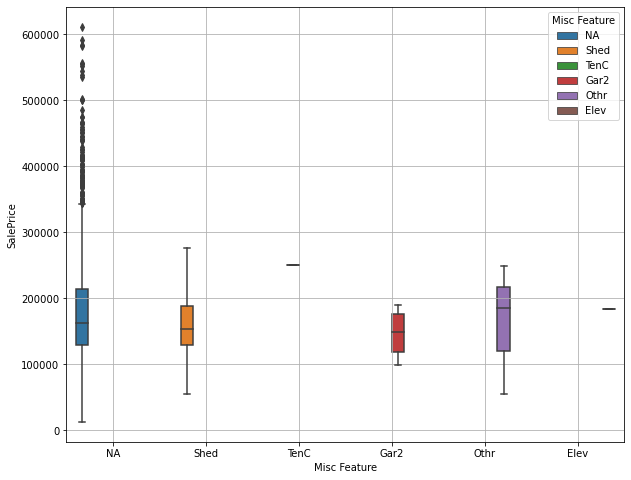

In [68]:
column_info(train_df,'Misc Feature')

In [69]:
# We can see that from the Boxplot of each fence there are not very different sale prices and have many missing value so I decided to drop this column
#train_df.drop(columns = 'Misc Feature', inplace = True)

In [70]:
cat_col = find_col_type(train_df, 'Categorical')
train_df[cat_col].isnull().sum()

MS Zoning         0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Pool QC           0
Misc Feature      0
Sale Type         0
dtype: int64

> Numerical Columns

In [71]:
train_df[num_col].shape

(2051, 39)

In [72]:
train_df[num_col].isnull().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       330
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

> Lot Frontage

Missing Value
NaN: 330



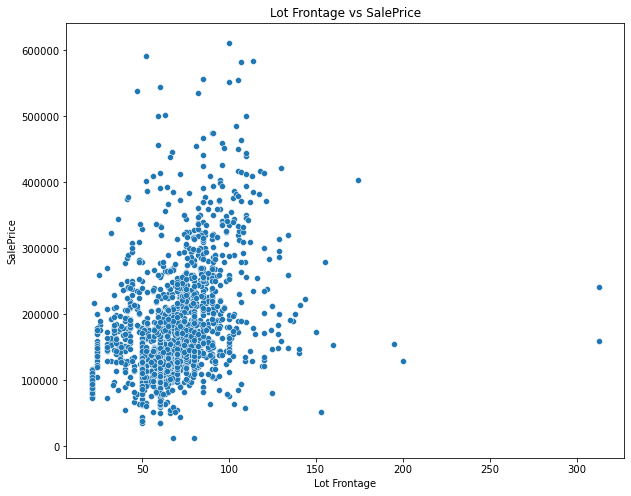

In [73]:
# This column show Linear feet of street connected to property.
column_info(train_df, 'Lot Frontage')

In [74]:
# I replace the missing value with mean of this column.
fill_none(train_df,'Lot Frontage', train_df['Lot Frontage'].mean())

Missing Value
NaN: 0



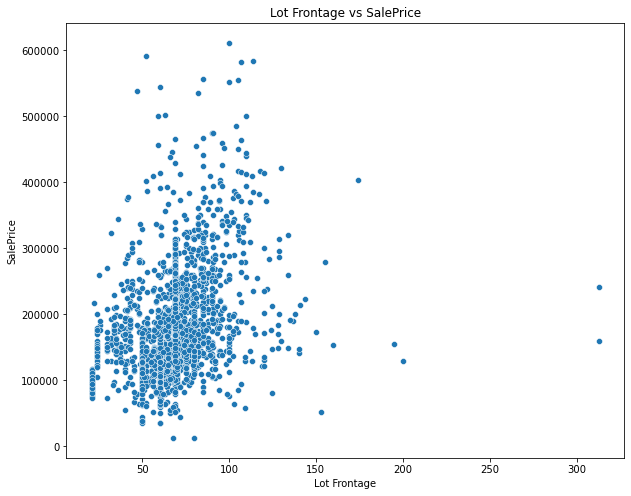

In [75]:
column_info(train_df,'Lot Frontage')

In [76]:
# There are some outliers
train_df[train_df['Lot Frontage']>300]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1335  1266  535427070           20        RL         313.0     27650   Pave   

     Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
960     NA       IR3          Bnk  ...          0            0       480   
1335    NA       IR2          HLS  ...          0            0         0   

     Pool QC Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
960       Gd           NA        0       1    2008        New     160000  
1335      NA           NA        0      11    2008        WD      242000  

[2 rows x 80 columns]

In [77]:
# Since linear regression is sensitive to outliers, I decided to drop these 2 rows
train_df.drop([960,1335], inplace = True)

Missing Value
NaN: 0



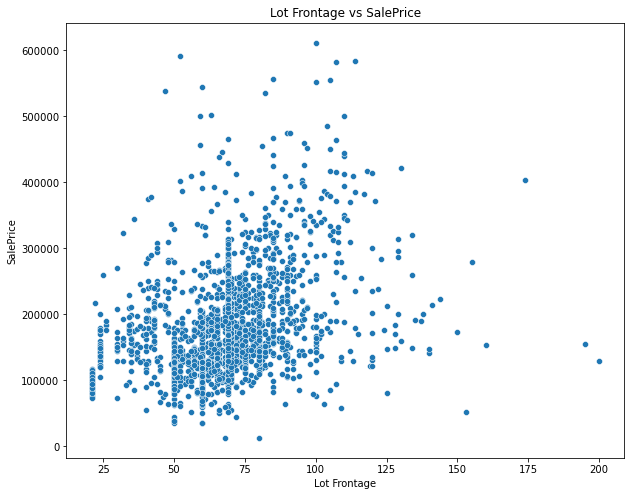

In [78]:
column_info(train_df,'Lot Frontage')

> Mas Vnr Area

Missing Value
NaN: 22



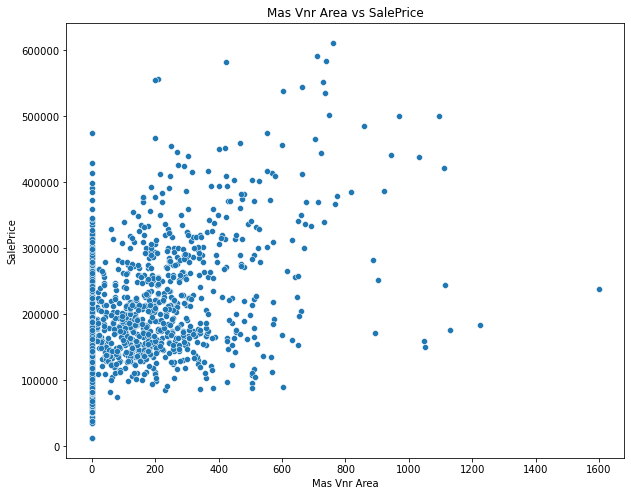

In [79]:
# This column show Mansonry veneer area in square feet
# I assume that missing values are 0 area
column_info(train_df,'Mas Vnr Area')

In [80]:
# Find the index of missing value
mas_vnr_area_na = train_df[train_df['Mas Vnr Area'].isna() == True].index

In [81]:
train_df.loc[mas_vnr_area_na, 'Mas Vnr Area'] = 0

Missing Value
NaN: 0



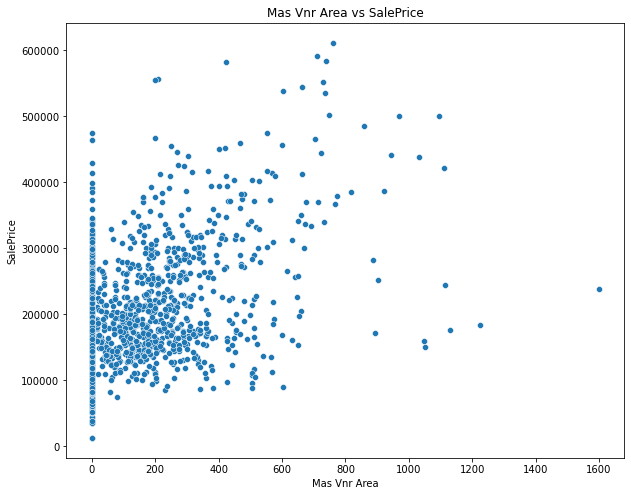

In [82]:
column_info(train_df, 'Mas Vnr Area')

> BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF and Total Bsmt SF

In [83]:
# There are 1 missing value for BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF and Total Bsmt SF
# These column are about basement area so I assume that there are missing value because that house doesn't have basement
# So I decided to drop this row
train_df[train_df['BsmtFin SF 1'].isna() == True][['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF
1327           NaN           NaN          NaN            NaN

In [84]:
train_df.drop(1327, inplace = True)

In [85]:
train_df.shape

(2048, 80)

In [86]:
train_df['BsmtFin SF 1'].isna().sum()

0

>> BsmtFin SF 1

Missing Value
NaN: 0



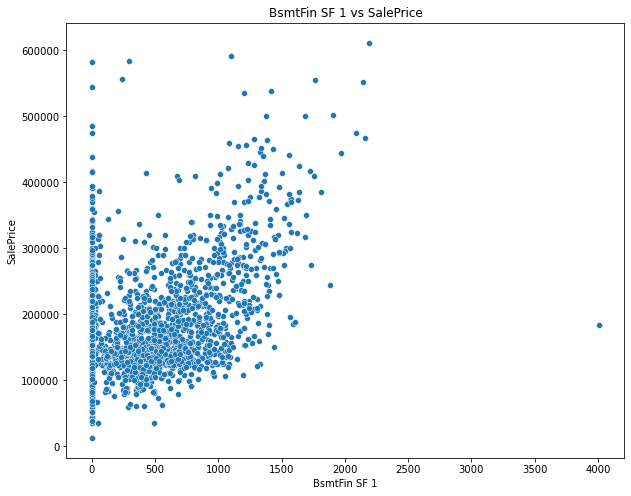

In [87]:
# This column shows Type 1 finished square feet
# There is one outlier
column_info(train_df,'BsmtFin SF 1')

In [88]:
train_df[train_df['BsmtFin SF 1']> 4000]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1885  2181  908154195           20        RL         128.0     39290   Pave   

     Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
1885    NA       IR1          Bnk  ...          0            0         0   

     Pool QC Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1885      NA         Elev    17000      10    2007        New     183850  

[1 rows x 80 columns]

In [89]:
# Drop outlier
train_df.drop(1885, inplace = True)

Missing Value
NaN: 0



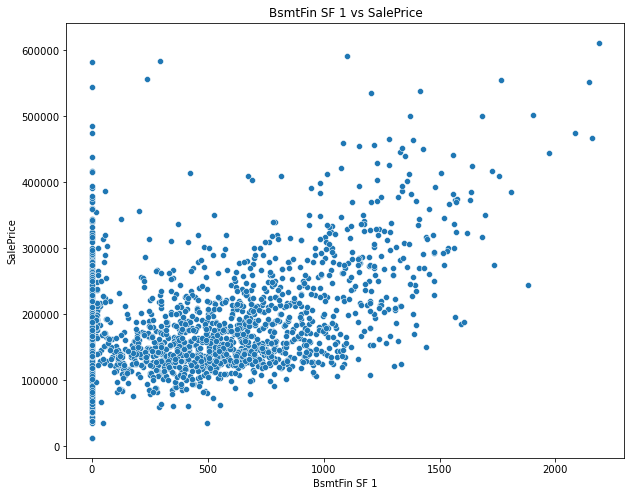

In [90]:
column_info(train_df, 'BsmtFin SF 1')

>> BsmtFin SF 2

Missing Value
NaN: 0



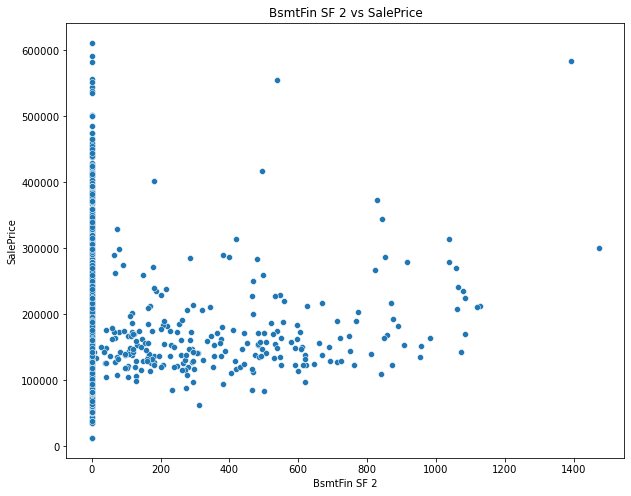

In [91]:
# This columns show Quality of second finished area (if present)
column_info(train_df, 'BsmtFin SF 2')

>> Bsmt Unf SF

Missing Value
NaN: 0



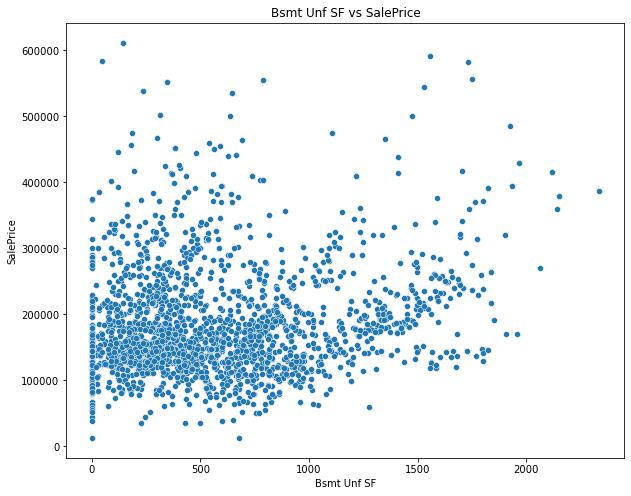

In [92]:
# This column shows Unfinished square feet of basement area
column_info(train_df, 'Bsmt Unf SF')

>> Total Bsmt SF

Missing Value
NaN: 0



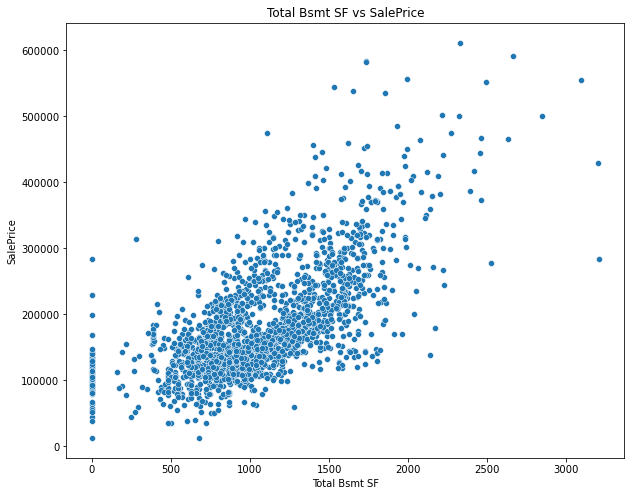

In [93]:
# This column shows Total square feet of basement area
column_info(train_df, 'Total Bsmt SF')

> Bsmt Full Bath and Bsmt Half Bath

In [94]:
# These column are about basement bath room so I assume that there are missing value because that house doesn't have basement
# Since I already dropped this row so the missing value is gone
train_df[train_df['Bsmt Full Bath'].isna() == True][['Bsmt Full Bath','Bsmt Half Bath']]

Bsmt Full Bath  Bsmt Half Bath
616             NaN             NaN

> Garage Yr Blt

Missing Value
NaN: 114



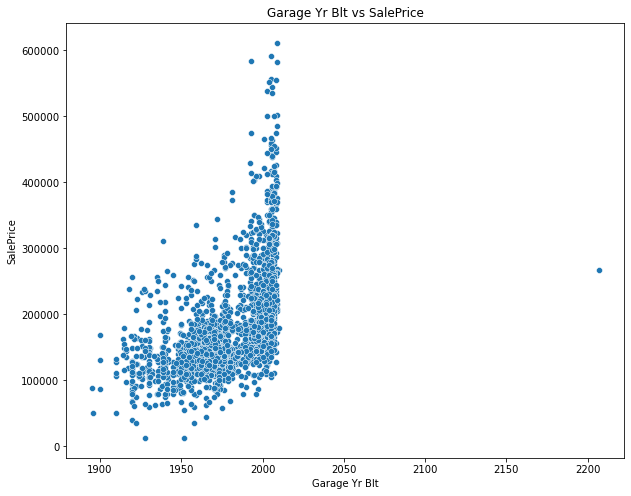

In [95]:
# This column show the year that garage was built
column_info(train_df, 'Garage Yr Blt')

In [96]:
# From the scatter plot we can see that there are one outlier
# There is no way that garage will built in year 2207 so I decided to drop this row
train_df[train_df['Garage Yr Blt'] > 2050]['Garage Yr Blt']

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [97]:
train_df.drop(1699, inplace  = True)

In [98]:
train_df[train_df['Garage Yr Blt'] > 2050]['Garage Yr Blt']

Series([], Name: Garage Yr Blt, dtype: float64)

In [99]:
# Since this data was deployed 2 years ago, I also check if there any garage that built after 2019
train_df[train_df['Garage Yr Blt'] > 2019]['Garage Yr Blt']

Series([], Name: Garage Yr Blt, dtype: float64)

In [100]:
# I assume that there is no garage year built because that house might not has any garage
# So I check with another column about garage
train_df[train_df['Garage Yr Blt'].isna() == True][['Garage Yr Blt','Garage Type','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Yr Blt Garage Type Garage Finish  Garage Cars  Garage Area  \
28              NaN          NA            NA          0.0          0.0   
53              NaN          NA            NA          0.0          0.0   
65              NaN          NA            NA          0.0          0.0   
79              NaN          NA            NA          0.0          0.0   
101             NaN          NA            NA          0.0          0.0   
...             ...         ...           ...          ...          ...   
1991            NaN          NA            NA          0.0          0.0   
2010            NaN          NA            NA          0.0          0.0   
2027            NaN          NA            NA          0.0          0.0   
2039            NaN          NA            NA          0.0          0.0   
2042            NaN          NA            NA          0.0          0.0   

     Garage Qual Garage Cond  
28            NA          NA  
53            NA          NA  
65            NA          NA  
79            NA          NA  
101           NA          NA  
...          ...         ...  
1991          NA          NA  
2010          NA          NA  
2027          NA          NA  
2039          NA          NA  
2042          NA          NA  

[114 rows x 7 columns]

In [101]:
# Found that 113 rows are no garage but 1 rows seem to has garage
train_df[train_df['Garage Yr Blt'].isna() == True]['Garage Type'].value_counts()

NA        113
Detchd      1
Name: Garage Type, dtype: int64

In [102]:
# Find the rows that has garage but no information about year built
new_df = train_df[train_df['Garage Type'] == 'Detchd']
new_df[new_df['Garage Yr Blt'].isna() == True]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1712  2237  910201180           70        RM          50.0      9060   Pave   

     Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
1712    NA       Reg          Lvl  ...          0            0         0   

     Pool QC Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1712      NA           NA        0       3    2007        WD      150909  

[1 rows x 80 columns]

In [103]:
# Actually this house might has a garage because there is an information for garage type
# But it also got many missing value for other garage information
# So I think dropping this row might be a better choice
train_df.loc[1712,:][['Garage Yr Blt','Garage Type','Garage Area','Garage Qual','Garage Cond','Garage Finish','Garage Cars']]

Garage Yr Blt       NaN
Garage Type      Detchd
Garage Area         NaN
Garage Qual          NA
Garage Cond          NA
Garage Finish        NA
Garage Cars         NaN
Name: 1712, dtype: object

In [104]:
train_df.shape

(2046, 80)

In [105]:
train_df.drop(1712, inplace = True)

In [106]:
train_df.shape

(2045, 80)

In [107]:
# Since these house don't have any garage I will replace the missing value with the year that each house was built.
train_df[train_df['Garage Yr Blt'].isna() == True][['Year Built','Garage Yr Blt']]

Year Built  Garage Yr Blt
28          1895            NaN
53          1970            NaN
65          2007            NaN
79          1925            NaN
101         1920            NaN
...          ...            ...
1991        1971            NaN
2010        1945            NaN
2027        1960            NaN
2039        1970            NaN
2042        1922            NaN

[113 rows x 2 columns]

In [108]:
# Find index for the rows that have missing value
year_na_index = train_df[train_df['Garage Yr Blt'].isna() == True].index

In [109]:
len(year_na_index)

113

In [110]:
train_df.loc[year_na_index, 'Garage Yr Blt'] = train_df.loc[year_na_index, 'Year Built']

In [111]:
train_df.loc[year_na_index, ['Garage Yr Blt','Year Built']].head()

Garage Yr Blt  Year Built
28          1895.0        1895
53          1970.0        1970
65          2007.0        2007
79          1925.0        1925
101         1920.0        1920

Missing Value
NaN: 0



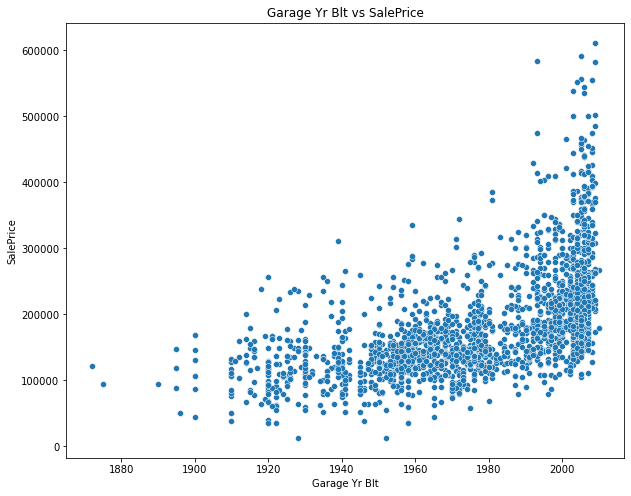

In [112]:
column_info(train_df, 'Garage Yr Blt')

> Garage Cars

Missing Value
NaN: 0



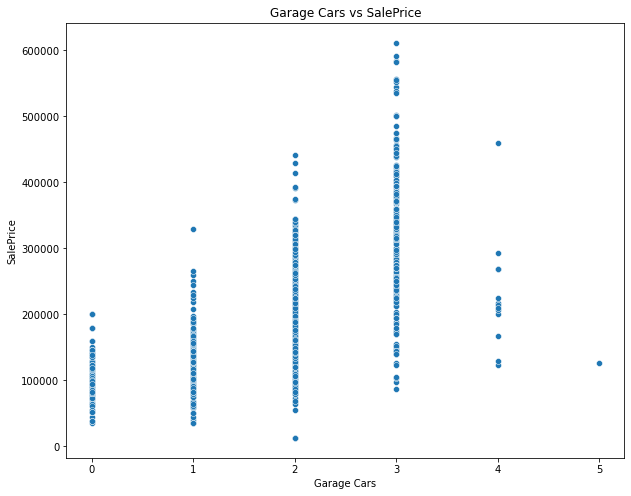

In [113]:
column_info(train_df, 'Garage Cars')

> Garage Area

Missing Value
NaN: 0



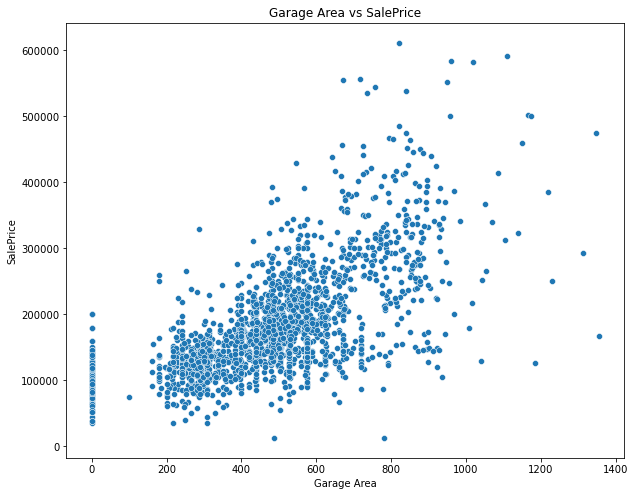

In [114]:
column_info(train_df,'Garage Area')

In [115]:
train_df[num_col].isnull().sum()

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     1
Bsmt Half Bath     1
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

### Test data

For the testing data, I'll do the same as I did for the train data set.

In [116]:
test_df = pd.read_csv('datasets/test.csv')

In [117]:
test_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [118]:
test_df.shape

(879, 80)

In [119]:
for key,value in test_df.isna().sum().iteritems():
    print(key,value)

Id 0
PID 0
MS SubClass 0
MS Zoning 0
Lot Frontage 160
Lot Area 0
Street 0
Alley 821
Lot Shape 0
Land Contour 0
Utilities 0
Lot Config 0
Land Slope 0
Neighborhood 0
Condition 1 0
Condition 2 0
Bldg Type 0
House Style 0
Overall Qual 0
Overall Cond 0
Year Built 0
Year Remod/Add 0
Roof Style 0
Roof Matl 0
Exterior 1st 0
Exterior 2nd 0
Mas Vnr Type 1
Mas Vnr Area 1
Exter Qual 0
Exter Cond 0
Foundation 0
Bsmt Qual 25
Bsmt Cond 25
Bsmt Exposure 25
BsmtFin Type 1 25
BsmtFin SF 1 0
BsmtFin Type 2 25
BsmtFin SF 2 0
Bsmt Unf SF 0
Total Bsmt SF 0
Heating 0
Heating QC 0
Central Air 0
Electrical 1
1st Flr SF 0
2nd Flr SF 0
Low Qual Fin SF 0
Gr Liv Area 0
Bsmt Full Bath 0
Bsmt Half Bath 0
Full Bath 0
Half Bath 0
Bedroom AbvGr 0
Kitchen AbvGr 0
Kitchen Qual 0
TotRms AbvGrd 0
Functional 0
Fireplaces 0
Fireplace Qu 422
Garage Type 44
Garage Yr Blt 45
Garage Finish 45
Garage Cars 0
Garage Area 0
Garage Qual 45
Garage Cond 45
Paved Drive 0
Wood Deck SF 0
Open Porch SF 0
Enclosed Porch 0
3Ssn Porch 0
Scree

In [120]:
for key,value in test_df.dtypes.iteritems():
    print(key,value)

Id int64
PID int64
MS SubClass int64
MS Zoning object
Lot Frontage float64
Lot Area int64
Street object
Alley object
Lot Shape object
Land Contour object
Utilities object
Lot Config object
Land Slope object
Neighborhood object
Condition 1 object
Condition 2 object
Bldg Type object
House Style object
Overall Qual int64
Overall Cond int64
Year Built int64
Year Remod/Add int64
Roof Style object
Roof Matl object
Exterior 1st object
Exterior 2nd object
Mas Vnr Type object
Mas Vnr Area float64
Exter Qual object
Exter Cond object
Foundation object
Bsmt Qual object
Bsmt Cond object
Bsmt Exposure object
BsmtFin Type 1 object
BsmtFin SF 1 int64
BsmtFin Type 2 object
BsmtFin SF 2 int64
Bsmt Unf SF int64
Total Bsmt SF int64
Heating object
Heating QC object
Central Air object
Electrical object
1st Flr SF int64
2nd Flr SF int64
Low Qual Fin SF int64
Gr Liv Area int64
Bsmt Full Bath int64
Bsmt Half Bath int64
Full Bath int64
Half Bath int64
Bedroom AbvGr int64
Kitchen AbvGr int64
Kitchen Qual object


In [121]:
test_num_col = find_col_type(test_df, 'Numerical')
test_num_col

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [122]:
test_cat_col = find_col_type(train_df, 'Categorical')
test_cat_col

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Misc Feature',
 'Sale Type']

### Categorical Column

In [123]:
test_df[test_cat_col].isna().sum()

MS Zoning           0
Street              0
Alley             821
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Heating             0
Heating QC          0
Central Air         0
Electrical          1
Kitchen Qual        0
Functional          0
Fireplace Qu      422
Garage Type        44
Garage Finish      45
Garage Qual        45
Garage Cond        45
Paved Drive         0
Pool QC           875
Misc Feature      838
Sale Type           0
dtype: int64

> Alley

In [124]:
column_info(test_df, 'Alley')

NaN: 821

Value Counts
Grvl    35
Pave    23
Name: Alley, dtype: int64

Unique Value
['Grvl' nan 'Pave']



In [125]:
# NA is No alley
fill_none(test_df, 'Alley','NA')

In [126]:
column_info(test_df, 'Alley')

NaN: 0

Value Counts
NA      821
Grvl     35
Pave     23
Name: Alley, dtype: int64

Unique Value
['Grvl' 'NA' 'Pave']



> Bsmt Qual

In [127]:
column_info(test_df,'Bsmt Qual')

NaN: 25

Value Counts
TA    396
Gd    355
Ex     74
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64

Unique Value
['Fa' 'Gd' 'TA' 'Ex' nan 'Po']



In [128]:
# NA is No basement
fill_none(test_df, 'Bsmt Qual', 'NA')

In [129]:
column_info(test_df,'Bsmt Qual')

NaN: 0

Value Counts
TA    396
Gd    355
Ex     74
Fa     28
NA     25
Po      1
Name: Bsmt Qual, dtype: int64

Unique Value
['Fa' 'Gd' 'TA' 'Ex' 'NA' 'Po']



> Bsmt Cond

In [130]:
column_info(test_df,'Bsmt Cond')

NaN: 25

Value Counts
TA    782
Fa     39
Gd     33
Name: Bsmt Cond, dtype: int64

Unique Value
['TA' 'Gd' nan 'Fa']



In [131]:
fill_none(test_df, 'Bsmt Cond', 'NA')

In [132]:
column_info(test_df,'Bsmt Cond')

NaN: 0

Value Counts
TA    782
Fa     39
Gd     33
NA     25
Name: Bsmt Cond, dtype: int64

Unique Value
['TA' 'Gd' 'NA' 'Fa']



> Bsmt Exposure

In [133]:
column_info(test_df, 'Bsmt Exposure')

NaN: 25

Value Counts
No    567
Av    130
Gd     81
Mn     76
Name: Bsmt Exposure, dtype: int64

Unique Value
['No' 'Av' nan 'Mn' 'Gd']



In [134]:
fill_none(test_df, 'Bsmt Exposure', 'NA')

In [135]:
column_info(test_df, 'Bsmt Exposure')

NaN: 0

Value Counts
No    567
Av    130
Gd     81
Mn     76
NA     25
Name: Bsmt Exposure, dtype: int64

Unique Value
['No' 'Av' 'NA' 'Mn' 'Gd']



> BsmtFin Type 1

In [136]:
column_info(test_df, 'BsmtFin Type 1')

NaN: 25

Value Counts
Unf    248
GLQ    244
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64

Unique Value
['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']



In [137]:
fill_none(test_df,'BsmtFin Type 1','NA')

In [138]:
column_info(test_df, 'BsmtFin Type 1')

NaN: 0

Value Counts
Unf    248
GLQ    244
ALQ    136
Rec    105
BLQ     69
LwQ     52
NA      25
Name: BsmtFin Type 1, dtype: int64

Unique Value
['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' 'NA' 'LwQ']



> BsmtFin Type 2

In [139]:
column_info(test_df, 'BsmtFin Type 2')

NaN: 25

Value Counts
Unf    750
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64

Unique Value
['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']



In [140]:
fill_none(test_df,'BsmtFin Type 2','NA')

In [141]:
column_info(test_df, 'BsmtFin Type 2')

NaN: 0

Value Counts
Unf    750
LwQ     29
Rec     26
NA      25
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64

Unique Value
['Unf' 'LwQ' 'NA' 'ALQ' 'GLQ' 'Rec' 'BLQ']



> Fireplace Qu

In [142]:
column_info(test_df,'Fireplace Qu')

NaN: 422

Value Counts
Gd    221
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64

Unique Value
[nan 'Gd' 'Fa' 'TA' 'Po' 'Ex']



In [143]:
fill_none(test_df, 'Fireplace Qu','NA')

In [144]:
column_info(test_df,'Fireplace Qu')

NaN: 0

Value Counts
NA    422
Gd    221
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64

Unique Value
['NA' 'Gd' 'Fa' 'TA' 'Po' 'Ex']



Garage Type

In [145]:
column_info(test_df,'Garage Type')

NaN: 44

Value Counts
Attchd     518
Detchd     246
BuiltIn     54
Basment      9
2Types       4
CarPort      4
Name: Garage Type, dtype: int64

Unique Value
['Detchd' 'Attchd' 'BuiltIn' nan '2Types' 'CarPort' 'Basment']



In [146]:
fill_none(test_df, 'Garage Type', 'NA')

In [147]:
column_info(test_df,'Garage Type')

NaN: 0

Value Counts
Attchd     518
Detchd     246
BuiltIn     54
NA          44
Basment      9
2Types       4
CarPort      4
Name: Garage Type, dtype: int64

Unique Value
['Detchd' 'Attchd' 'BuiltIn' 'NA' '2Types' 'CarPort' 'Basment']



> Garage Finish

In [148]:
column_info(test_df,'Garage Finish')

NaN: 45

Value Counts
Unf    382
RFn    233
Fin    219
Name: Garage Finish, dtype: int64

Unique Value
['Unf' 'Fin' 'RFn' nan]



In [149]:
fill_none(test_df, 'Garage Finish', 'NA')

In [150]:
column_info(test_df,'Garage Finish')

NaN: 0

Value Counts
Unf    382
RFn    233
Fin    219
NA      45
Name: Garage Finish, dtype: int64

Unique Value
['Unf' 'Fin' 'RFn' 'NA']



> Garage Qual

In [151]:
column_info(test_df,'Garage Qual')

NaN: 45

Value Counts
TA    783
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

Unique Value
['Po' 'TA' 'Fa' nan 'Gd']



In [152]:
fill_none(test_df, 'Garage Qual', 'NA')

In [153]:
column_info(test_df,'Garage Qual')

NaN: 0

Value Counts
TA    783
NA     45
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

Unique Value
['Po' 'TA' 'Fa' 'NA' 'Gd']



> Garage Cond

In [154]:
column_info(test_df,'Garage Cond')

NaN: 45

Value Counts
TA    797
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

Unique Value
['Po' 'TA' nan 'Fa' 'Gd' 'Ex']



In [155]:
fill_none(test_df, 'Garage Cond', 'NA')

In [156]:
column_info(test_df,'Garage Cond')

NaN: 0

Value Counts
TA    797
NA     45
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

Unique Value
['Po' 'TA' 'NA' 'Fa' 'Gd' 'Ex']



> Pool QC

In [157]:
column_info(test_df,'Pool QC')

NaN: 875

Value Counts
Ex    3
TA    1
Name: Pool QC, dtype: int64

Unique Value
[nan 'Ex' 'TA']



In [158]:
fill_none(test_df, 'Pool QC','NA')

In [159]:
column_info(test_df,'Pool QC')

NaN: 0

Value Counts
NA    875
Ex      3
TA      1
Name: Pool QC, dtype: int64

Unique Value
['NA' 'Ex' 'TA']



> Fence

In [160]:
column_info(test_df, 'Fence')

NaN: 707

Value Counts
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

Unique Value
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']



In [161]:
fill_none(test_df, 'Fence','NA')

In [162]:
column_info(test_df, 'Fence')

NaN: 0

Value Counts
NA       707
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64

Unique Value
['NA' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']



> Misc Feature

In [163]:
column_info(test_df, 'Misc Feature')

NaN: 838

Value Counts
Shed    39
Othr     1
Gar2     1
Name: Misc Feature, dtype: int64

Unique Value
[nan 'Shed' 'Othr' 'Gar2']



In [164]:
fill_none(test_df,'Misc Feature','NA')

In [165]:
column_info(test_df,'Misc Feature')

NaN: 0

Value Counts
NA      838
Shed     39
Othr      1
Gar2      1
Name: Misc Feature, dtype: int64

Unique Value
['NA' 'Shed' 'Othr' 'Gar2']



### Numerical column

In [166]:
test_df[test_num_col].isna().sum()

Id                   0
PID                  0
MS SubClass          0
Lot Frontage       160
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area         1
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       45
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
dtype: int64

> Mas Vnr Area

In [167]:
# This column is about Masonry veneer type
column_info(test_df, 'Mas Vnr Area')

Missing Value
NaN: 1



In [168]:
test_df[test_df['Mas Vnr Area'].isna() == True][['Mas Vnr Area','Mas Vnr Type']]

Mas Vnr Area Mas Vnr Type
866           NaN          NaN

In [169]:
# So I assume that this house mmight not have Masonry veneer
test_df.loc[866, 'Mas Vnr Area'] = 0

In [170]:
column_info(test_df, 'Mas Vnr Area')

Missing Value
NaN: 0



> Lot Frontage

In [171]:
column_info(test_df, 'Lot Frontage')

Missing Value
NaN: 160



In [172]:
# Find the index of rows that Lot Frontage = 0
lot_front_test_na = test_df[test_df['Lot Frontage'].isna()].index

In [173]:
# Repalce the missing value with mean of Lot Frontage
test_df.loc[lot_front_test_na, 'Lot Frontage'] = test_df['Lot Frontage'].mean()

In [174]:
column_info(test_df, 'Lot Frontage')

Missing Value
NaN: 0



> Garage Yr Blt

In [175]:
# I will replace missing value like I did in train data which is assume that rows that dont have garage year built because they dont have garage
# So I replace it with the year that house was built
column_info(test_df,'Garage Yr Blt')

Missing Value
NaN: 45



In [176]:
test_df.shape

(879, 80)

In [177]:
test_year_na_index = test_df[test_df['Garage Yr Blt'].isna() == True].index

In [178]:
test_df.loc[test_year_na_index, 'Garage Yr Blt'] = test_df['Year Built']

In [179]:
test_df.shape

(879, 80)

In [180]:
column_info(test_df,'Garage Yr Blt')

Missing Value
NaN: 0



In [181]:
test_df[test_num_col].isna().sum()

Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64

In [182]:
# How ever in categorical columns in train and test data there might be some column that dont have exactly the same type of that value
# For example there might be 5 types of dwelling in train data but in test data which has a fewer rows might has only 4 types of dwelling
# So I will check it first because if we dont fix this when we do the get dummies it wont have the same number of columns
# This function is use to check the unique value in category columns between dataframe
def check_unique(dataframe1 , dataframe2,columns_list):
    list_col = []
    for column in columns_list:
        value_1 = [val for val in dataframe1[column].unique()]
        value_2 = [val for val in dataframe2[column].unique()]
        if set(value_1) != set(value_2): # I use set because some values are int, while some are str and the order of two list is not the same.
            list_col.append(column)
    return list_col

In [183]:
# cat_col is the category columns
col_not_match = check_unique(train_df, test_df, cat_col)
col_not_match

['MS Zoning',
 'Utilities',
 'Neighborhood',
 'Condition 2',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Bsmt Cond',
 'Heating',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Qual',
 'Pool QC',
 'Misc Feature',
 'Sale Type']

In [184]:
# There are 15 columns that unique value are not match
len(col_not_match)

18

In [185]:
print(f'train_df.shape {train_df.shape}, test_df.shape {test_df.shape}')

train_df.shape (2045, 80), test_df.shape (879, 80)


In [186]:
# I decided to dropped them in both train and test dataframe
train_df.drop(columns = col_not_match, inplace = True)
test_df.drop(columns = col_not_match, inplace = True)

In [187]:
print(f'train_df.shape {train_df.shape}, test_df.shape {test_df.shape}')

train_df.shape (2045, 62), test_df.shape (879, 62)


In [188]:
train_df.to_csv('datasets/train_cleaned.csv', index = False)
test_df.to_csv('datasets/test_cleaned.csv', index = False)

## Exploratory Data Analysis

> Numeric Columns

In [189]:
train_df[num_col].corr()

Id       PID  MS SubClass  Lot Frontage  Lot Area  \
Id               1.000000  0.174743     0.027023     -0.024090  0.032162   
PID              0.174743  1.000000    -0.002912     -0.092217  0.020116   
MS SubClass      0.027023 -0.002912     1.000000     -0.384798 -0.248865   
Lot Frontage    -0.024090 -0.092217    -0.384798      1.000000  0.356721   
Lot Area         0.032162  0.020116    -0.248865      0.356721  1.000000   
Overall Qual    -0.063280 -0.269612     0.037344      0.173499  0.090750   
Overall Cond    -0.025611  0.107677    -0.069639     -0.058339 -0.017850   
Year Built      -0.065031 -0.348973     0.036741      0.105876  0.029756   
Year Remod/Add  -0.091575 -0.178090     0.045547      0.072317  0.043226   
Mas Vnr Area    -0.038696 -0.251168    -0.000816      0.186025  0.143934   
BsmtFin SF 1    -0.051918 -0.101269    -0.060761      0.141074  0.166473   
BsmtFin SF 2     0.001073 -0.012701    -0.068627      0.038969  0.044773   
Bsmt Unf SF      0.007834 -0.112583    -0.139533      0.132146  0.041809   
Total Bsmt SF   -0.045007 -0.227032    -0.235019      0.298734  0.232880   
1st Flr SF      -0.028143 -0.161907    -0.252982      0.398037  0.346178   
2nd Flr SF      -0.008487 -0.006197     0.304916      0.011381  0.026739   
Low Qual Fin SF  0.011848  0.072604     0.030952      0.001177  0.002053   
Gr Liv Area     -0.028125 -0.123993     0.073190      0.320364  0.293487   
Bsmt Full Bath  -0.033137 -0.031412     0.025751      0.083099  0.103024   
Bsmt Half Bath   0.013111 -0.003568    -0.015908     -0.033155  0.023916   
Full Bath       -0.060186 -0.180527     0.142729      0.140057  0.122668   
Half Bath       -0.042147 -0.164919     0.179432      0.030118  0.044059   
Bedroom AbvGr    0.011513  0.011156    -0.004261      0.208508  0.141596   
Kitchen AbvGr   -0.002171  0.068950     0.252008      0.018616 -0.012368   
TotRms AbvGrd   -0.011201 -0.088937     0.037113      0.322795  0.217941   
Fireplaces      -0.038624 -0.123684    -0.054354      0.214256  0.276577   
Garage Yr Blt   -0.054946 -0.292650     0.030902      0.085102  0.026334   
Garage Cars     -0.049567 -0.229348    -0.048746      0.296356  0.214745   
Garage Area     -0.047030 -0.206016    -0.108177      0.335353  0.246365   
Wood Deck SF    -0.011099 -0.044142     0.002504      0.103732  0.149160   
Open Porch SF   -0.000861 -0.086885    -0.018730      0.158141  0.117554   
Enclosed Porch   0.032713  0.149779    -0.041071      0.003570  0.017380   
3Ssn Porch      -0.022689 -0.024503    -0.030266      0.032120  0.020711   
Screen Porch     0.010089 -0.041501    -0.039288      0.077029  0.071259   
Pool Area        0.057915 -0.000466    -0.005320      0.079509  0.070317   
Misc Val        -0.032650 -0.013929    -0.019954      0.013185  0.042870   
Mo Sold          0.127831 -0.031345     0.014719     -0.018213  0.005412   
Yr Sold         -0.975804  0.009311    -0.033177      0.007416 -0.029820   
SalePrice       -0.051813 -0.254934    -0.087166      0.348090  0.303297   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                  -0.063280     -0.025611   -0.065031       -0.091575   
PID                 -0.269612      0.107677   -0.348973       -0.178090   
MS SubClass          0.037344     -0.069639    0.036741        0.045547   
Lot Frontage         0.173499     -0.058339    0.105876        0.072317   
Lot Area             0.090750     -0.017850    0.029756        0.043226   
Overall Qual         1.000000     -0.080871    0.601957        0.583626   
Overall Cond        -0.080871      1.000000   -0.370092        0.043797   
Year Built           0.601957     -0.370092    1.000000        0.629675   
Year Remod/Add       0.583626      0.043797    0.629675        1.000000   
Mas Vnr Area         0.424214     -0.130657    0.319389        0.201973   
BsmtFin SF 1         0.266911     -0.043037    0.277735        0.163628   
BsmtFin SF 2        -0.027379      0.047871   -0.020850       -0.056508   
Bsmt Un

<AxesSubplot:>

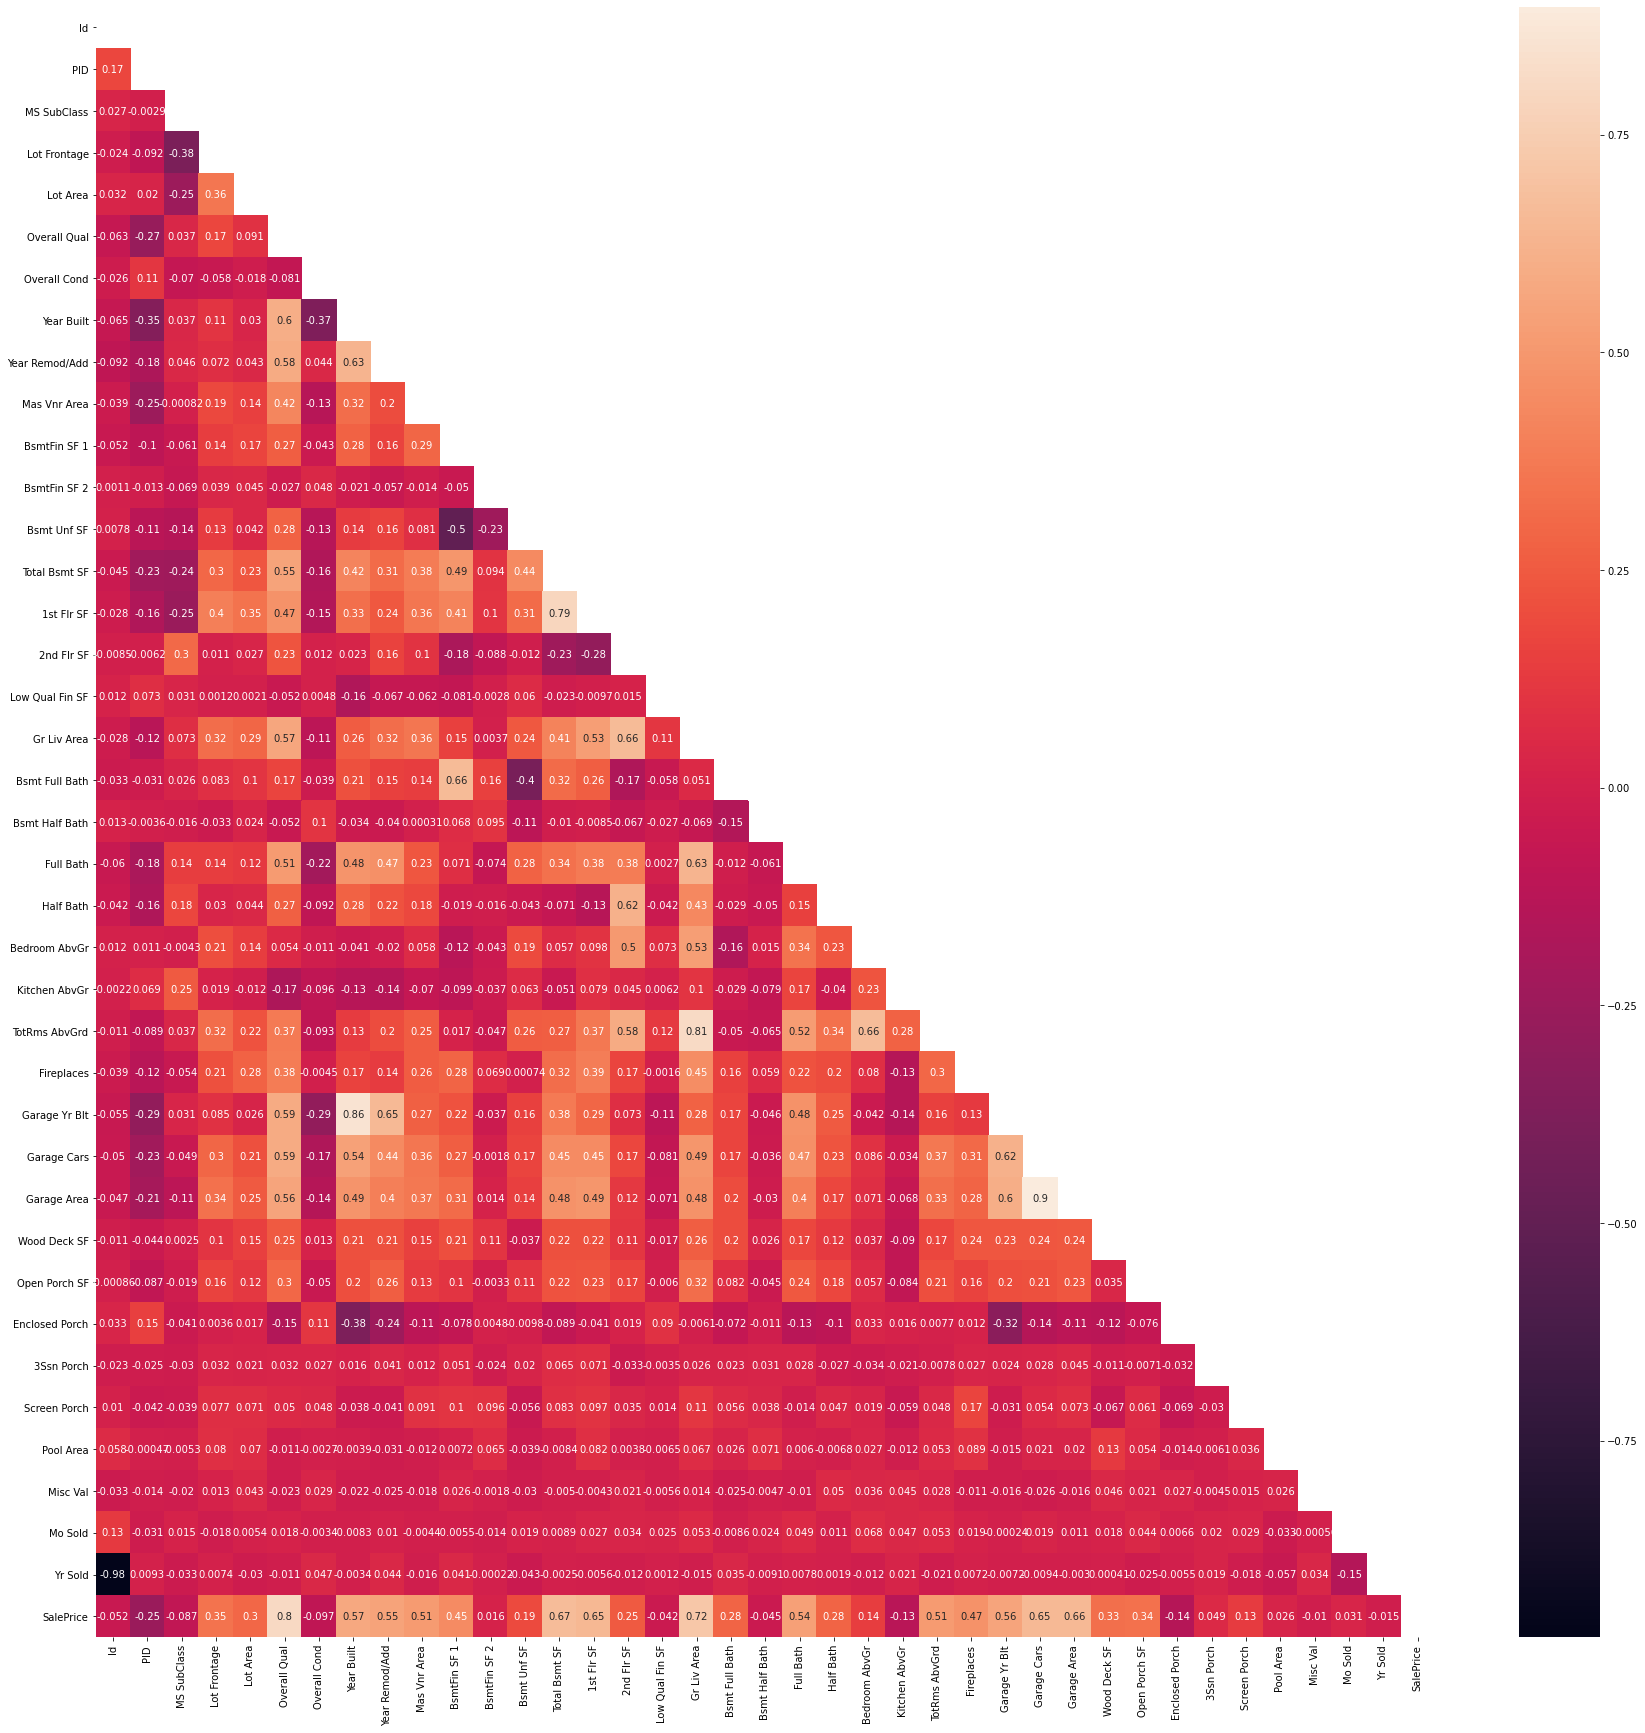

In [190]:
# Create heatmap to see the correlation
plt.figure(figsize = (30,30))

mask = np.zeros_like(train_df.corr())
mask [np.triu_indices_from(mask)] = True

sns.heatmap(train_df[num_col].corr(), mask = mask, annot = True)

<AxesSubplot:>

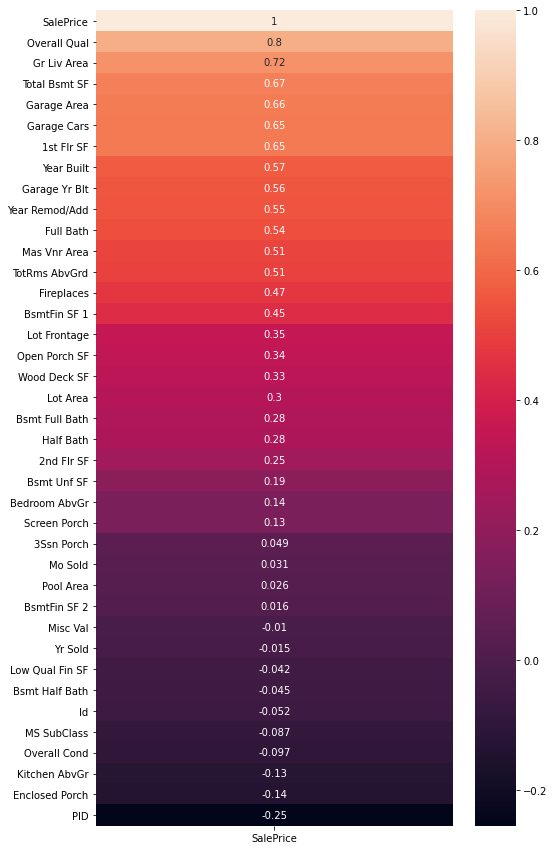

In [191]:
# Create single column heatmap to see the correlation
plt.figure(figsize = (8,15))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by = 'SalePrice',ascending = False), annot = True)

In [192]:
train_df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.803118
Gr Liv Area        0.719525
Total Bsmt SF      0.665288
Garage Area        0.655472
Garage Cars        0.648494
1st Flr SF         0.648030
Year Built         0.572273
Garage Yr Blt      0.556644
Year Remod/Add     0.550219
Full Bath          0.537861
Mas Vnr Area       0.511928
TotRms AbvGrd      0.509373
Fireplaces         0.473149
BsmtFin SF 1       0.445874
Lot Frontage       0.348090
Open Porch SF      0.339070
Wood Deck SF       0.327810
Lot Area           0.303297
Bsmt Full Bath     0.284942
Half Bath          0.283832
2nd Flr SF         0.249712
Bsmt Unf SF        0.190174
Bedroom AbvGr      0.136811
Screen Porch       0.134707
3Ssn Porch         0.048772
Mo Sold            0.030664
Pool Area          0.025833
BsmtFin SF 2       0.016438
Misc Val          -0.010324
Yr Sold           -0.014944
Low Qual Fin SF   -0.041636
Bsmt Half Bath    -0.045415
Id                -0.051813
MS SubClass       -0.087166
Overall Cond      -0

In [193]:
# Look at the column that has correlation with sale price more than 0.4.
col_morethan_04 = []
for key,value in train_df.corr()['SalePrice'].sort_values(ascending = False).iteritems():
    if value > 0.4 and key != 'SalePrice':
        col_morethan_04.append(key)
col_morethan_04

['Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1']

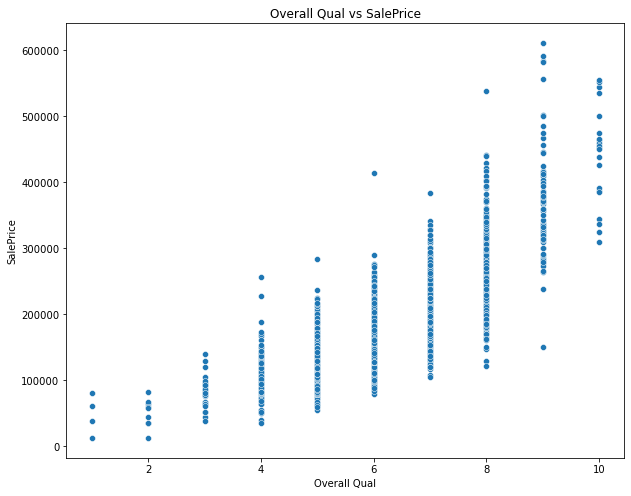

In [194]:
num_scatterplot(train_df,feature = 'Overall Qual')

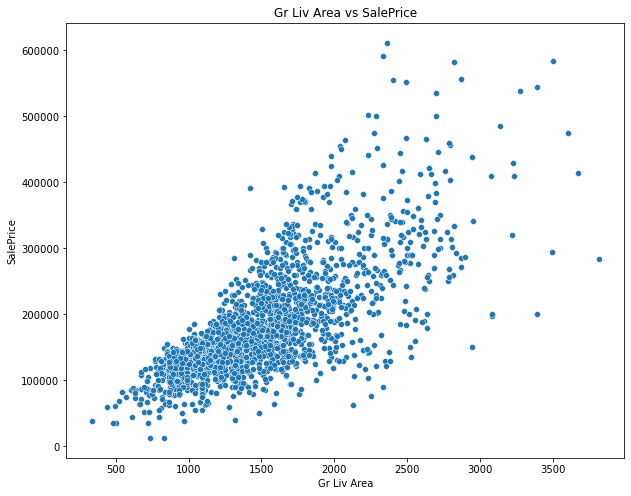

In [195]:
num_scatterplot(train_df,feature = 'Gr Liv Area')

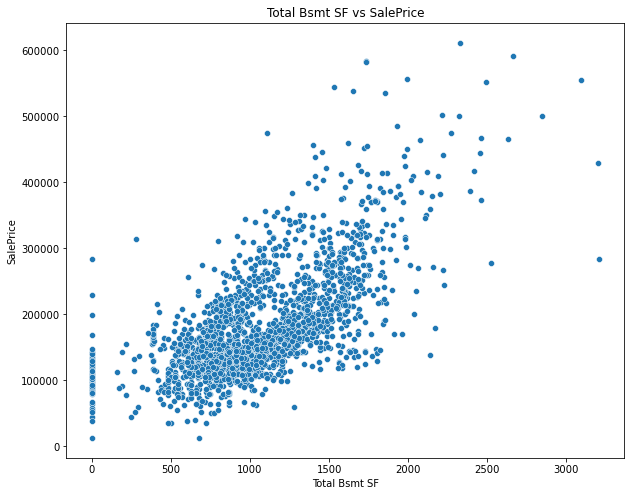

In [196]:
num_scatterplot(train_df,feature = 'Total Bsmt SF')

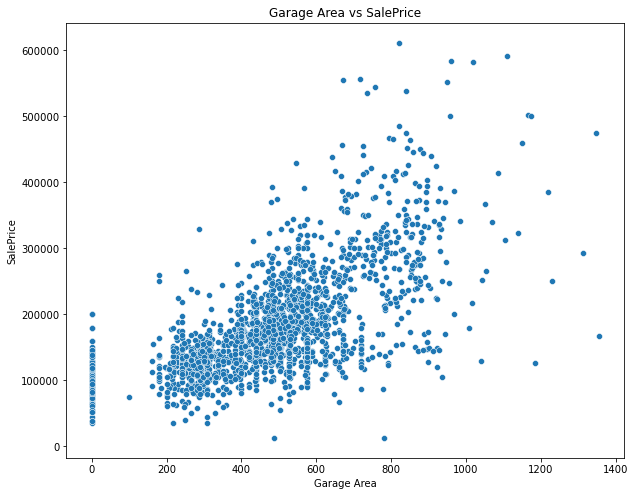

In [197]:
num_scatterplot(train_df,feature = 'Garage Area')

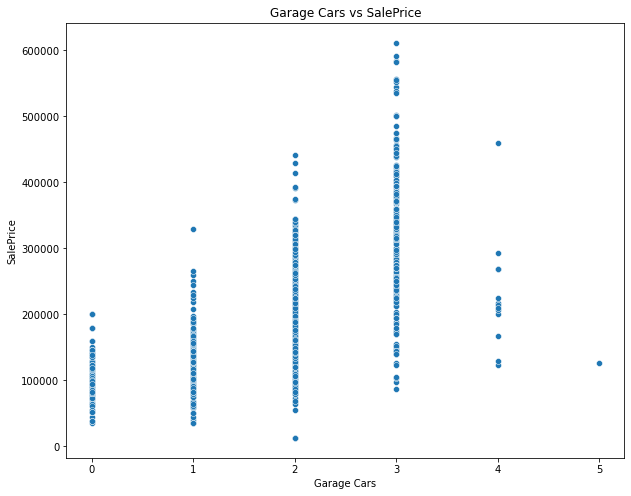

In [198]:
num_scatterplot(train_df,feature = 'Garage Cars')

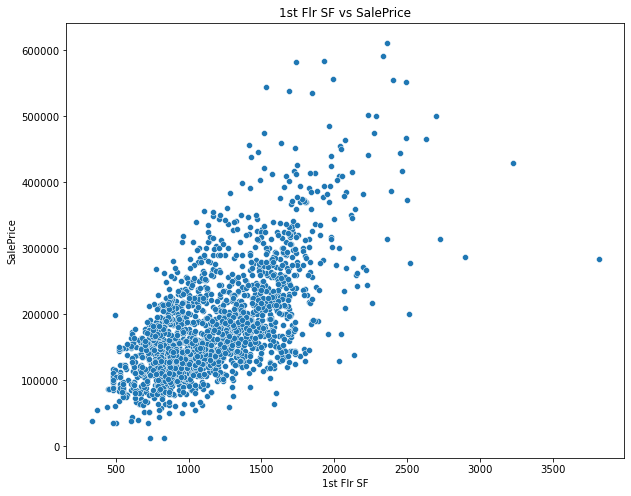

In [199]:
num_scatterplot(train_df,feature = '1st Flr SF')

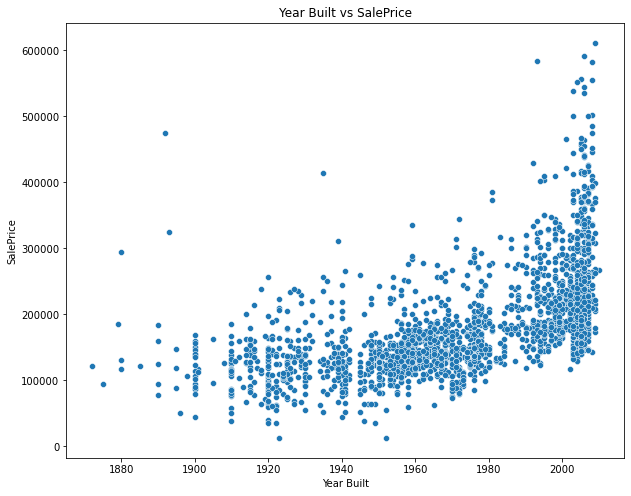

In [200]:
num_scatterplot(train_df,feature = 'Year Built')

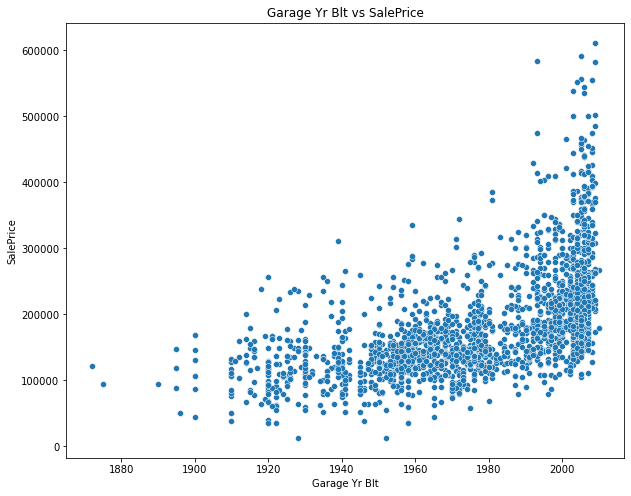

In [201]:
num_scatterplot(train_df,feature = 'Garage Yr Blt')

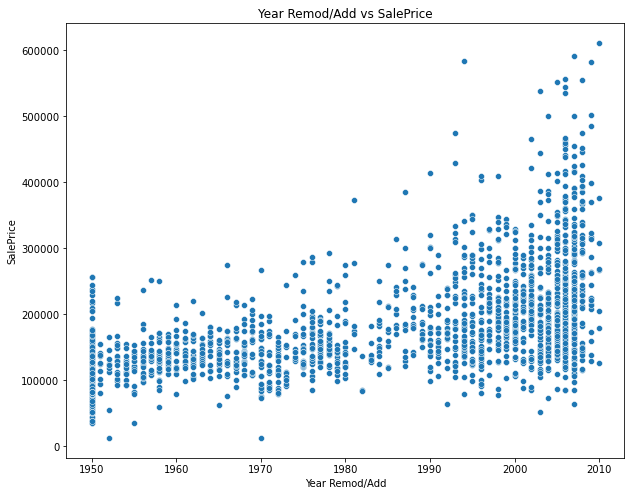

In [202]:
num_scatterplot(train_df,feature = 'Year Remod/Add')

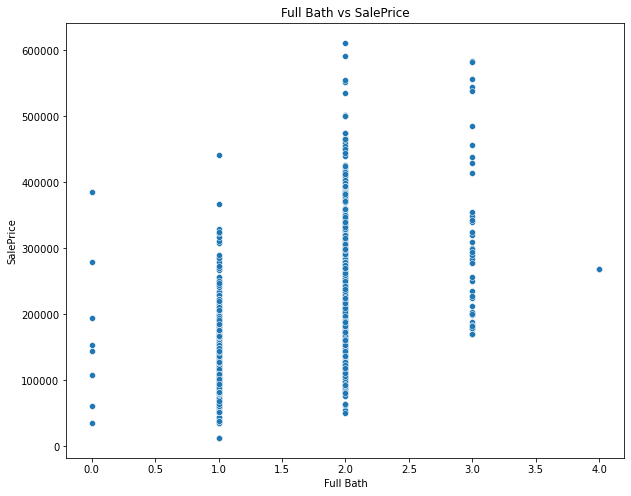

In [203]:
num_scatterplot(train_df,feature = 'Full Bath')

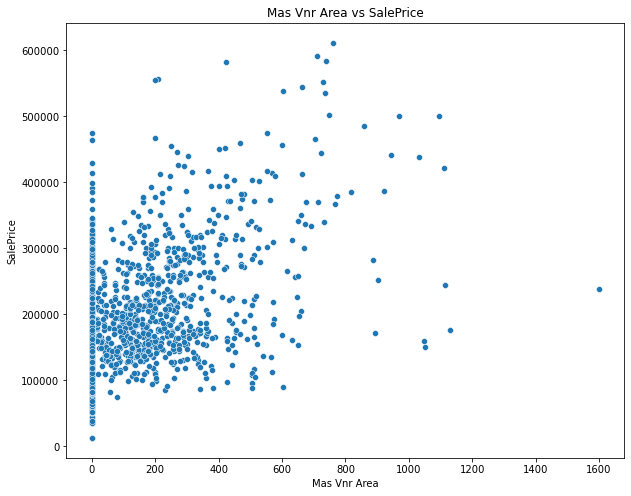

In [204]:
num_scatterplot(train_df,feature = 'Mas Vnr Area')

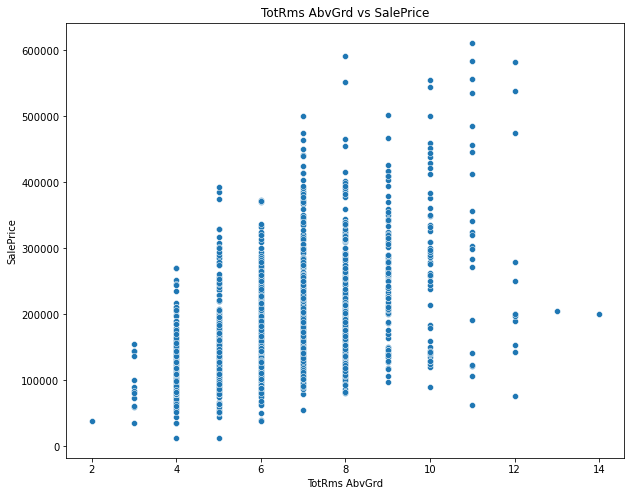

In [205]:
num_scatterplot(train_df,feature = 'TotRms AbvGrd')

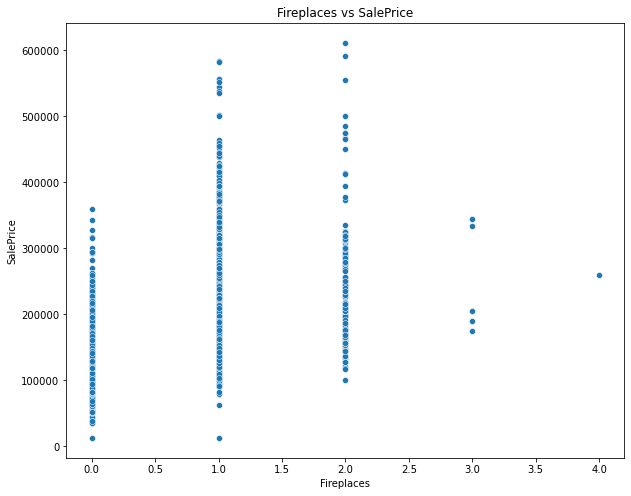

In [206]:
num_scatterplot(train_df,feature = 'Fireplaces')

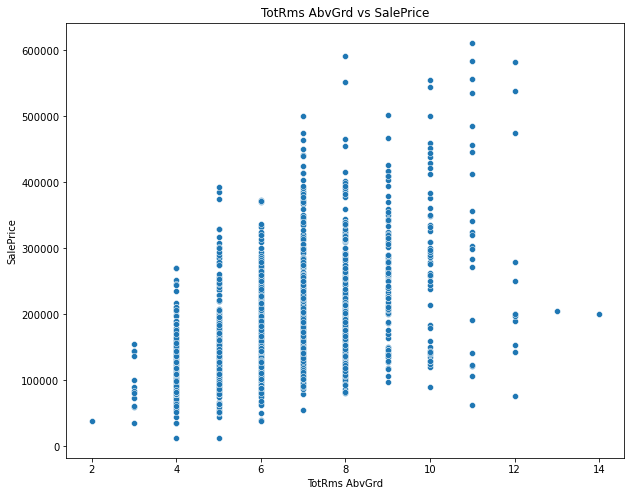

In [207]:
num_scatterplot(train_df,feature = 'TotRms AbvGrd')

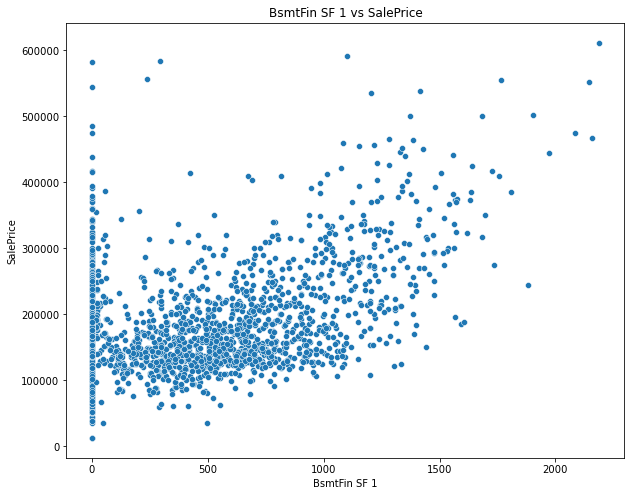

In [208]:
num_scatterplot(train_df,feature = 'BsmtFin SF 1')

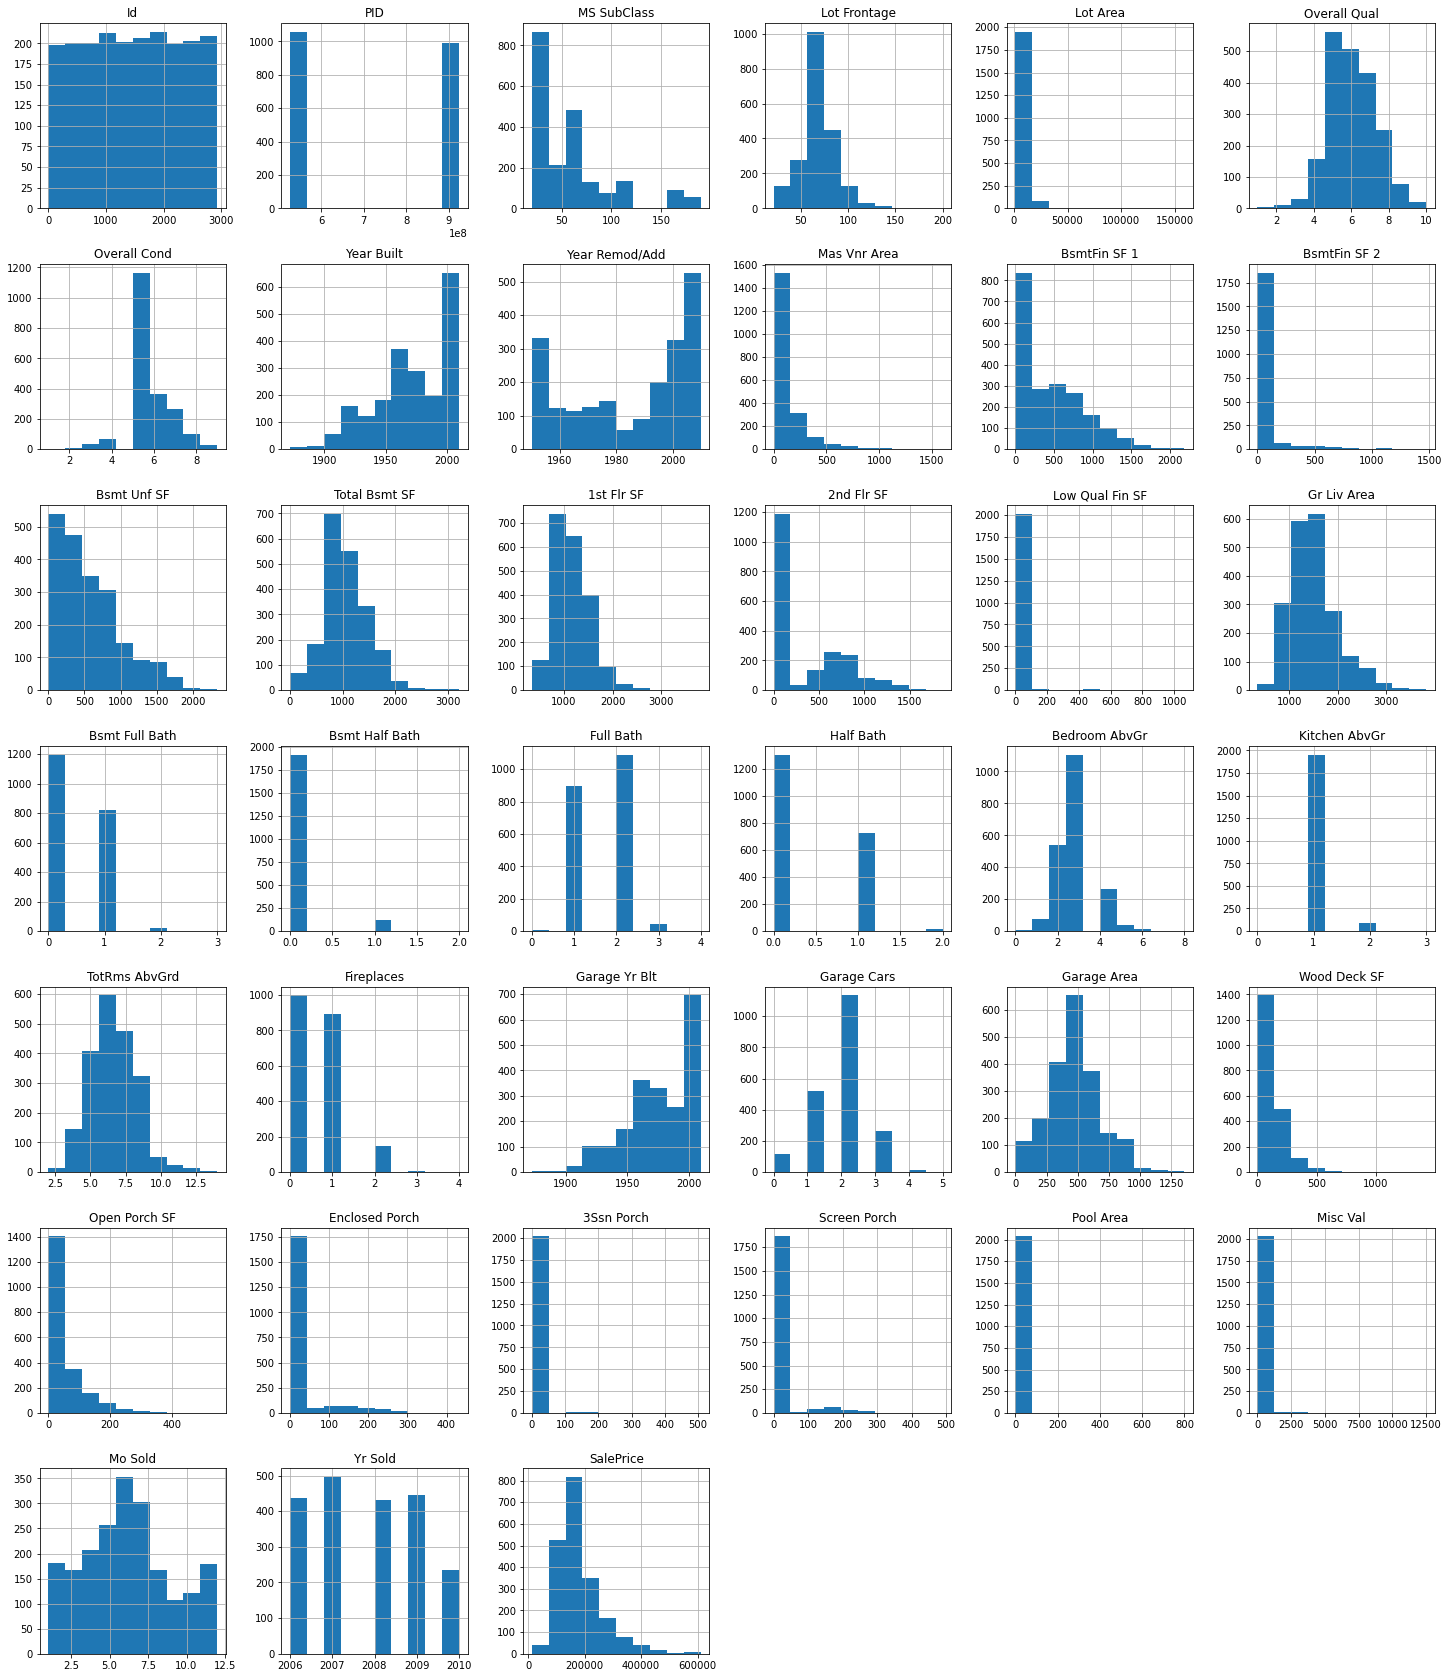

In [209]:
train_df[num_col].hist(figsize = (25,30));

> Categorical columns

In [399]:
cat_col = find_col_type(train_df, 'Categorical')
cat_col

['Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Cond',
 'Paved Drive']

In [211]:
train_df[cat_col]

Street Alley Lot Shape Land Contour Lot Config Land Slope Condition 1  \
0      Pave    NA       IR1          Lvl    CulDSac        Gtl        RRAe   
1      Pave    NA       IR1          Lvl    CulDSac        Gtl        Norm   
2      Pave    NA       Reg          Lvl     Inside        Gtl        Norm   
3      Pave    NA       Reg          Lvl     Inside        Gtl        Norm   
4      Pave    NA       IR1          Lvl     Inside        Gtl        Norm   
...     ...   ...       ...          ...        ...        ...         ...   
2046   Pave    NA       IR1          HLS     Inside        Gtl        Norm   
2047   Pave    NA       IR1          Lvl     Inside        Gtl        Norm   
2048   Pave    NA       Reg          Bnk     Inside        Gtl        Norm   
2049   Pave    NA       Reg          Lvl     Corner        Gtl        Norm   
2050   Pave    NA       Reg          Lvl     Inside        Gtl        Norm   

     Bldg Type House Style Roof Style  ... Bsmt Qual Bsmt Exposure  \
0         1Fam      2Story      Gable  ...        TA            No   
1         1Fam      2Story      Gable  ...        Gd            No   
2         1Fam      1Story      Gable  ...        TA            No   
3         1Fam      2Story      Gable  ...        Gd            No   
4         1Fam      1.5Fin      Gable  ...        Fa            No   
...        ...         ...        ...  ...       ...           ...   
2046      1Fam      1Story      Gable  ...        Gd            Av   
2047      1Fam      1Story      Gable  ...        TA            No   
2048      1Fam      1.5Fin      Gable  ...        TA            No   
2049      1Fam      1Story      Gable  ...        TA            No   
2050      1Fam      2Story      Gable  ...        TA            No   

     BsmtFin Type 1 BsmtFin Type 2 Central Air Fireplace Qu Garage Type  \
0               GLQ            Unf           Y           NA      Attchd   
1               GLQ            Unf           Y           TA      Attchd   
2               GLQ            Unf           Y           NA      Detchd   
3               Unf            Unf           Y           NA     BuiltIn   
4               Unf            Unf           Y           NA      Detchd   
...             ...            ...         ...          ...         ...   
2046            GLQ            Unf           Y           Gd      Attchd   
2047            BLQ            Unf           Y           NA      Detchd   
2048            Unf            Unf           Y           TA      Detchd   
2049            Rec            LwQ           Y           Gd      Attchd   
2050            Unf            Unf           Y           TA      Attchd   

     Garage Finish Garage Cond Paved Drive  
0              RFn          TA           Y  
1              RFn          TA           Y  
2              Unf          TA           Y  
3              Fin          TA           Y  
4              Unf          TA           N  
...            ...         ...         ...  
2046           Fin          TA           Y  
2047           Unf          TA           Y  
2048           Unf          Fa           Y  
2049           Unf          TA           Y  
2050           Fin          TA           Y  

[2045 rows x 23 columns]

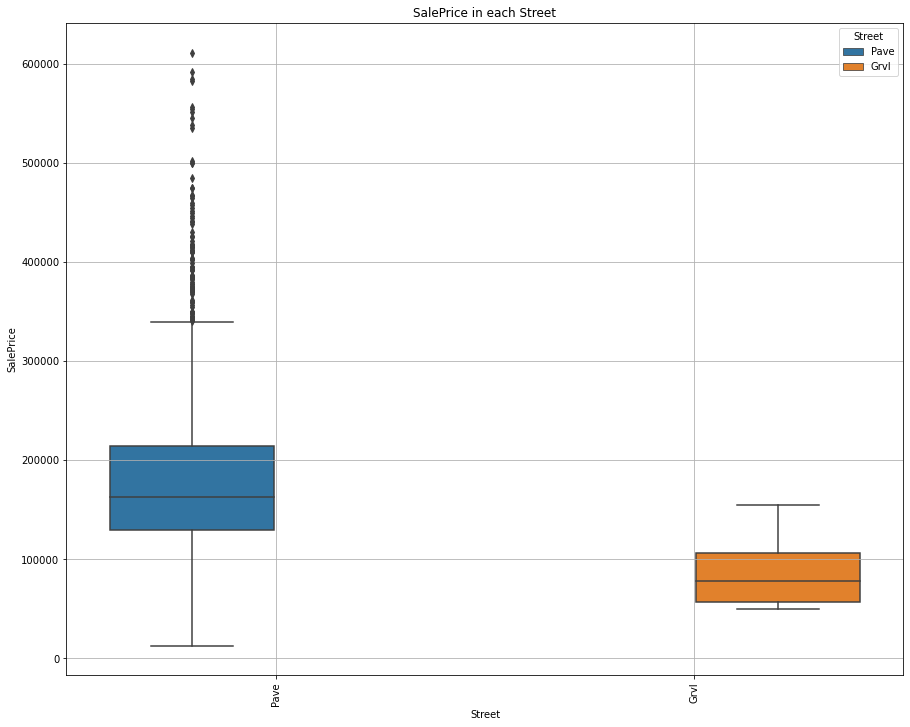

<Figure size 432x288 with 0 Axes>

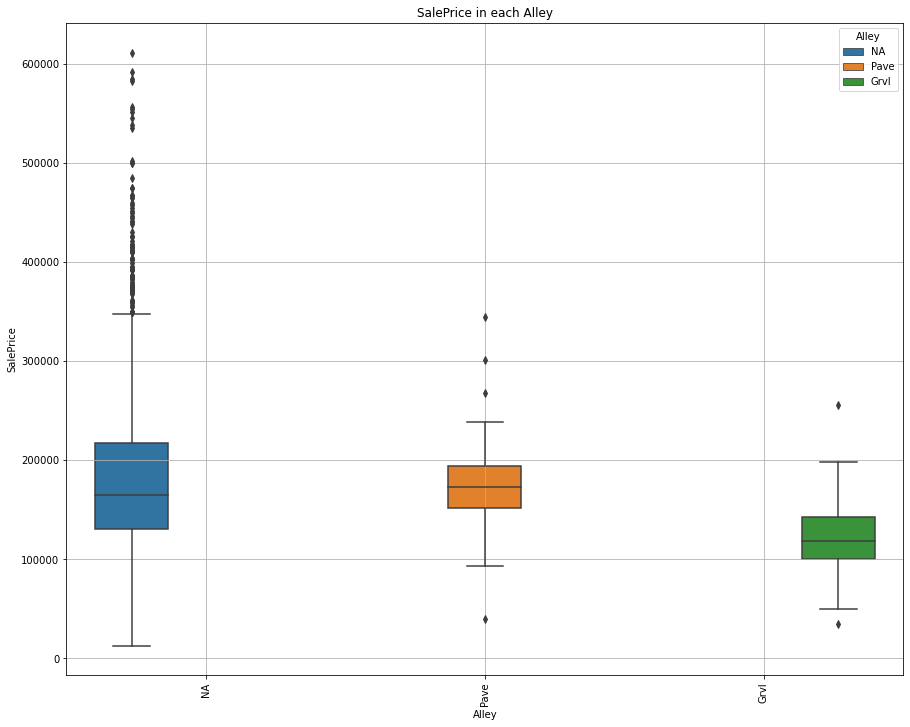

<Figure size 432x288 with 0 Axes>

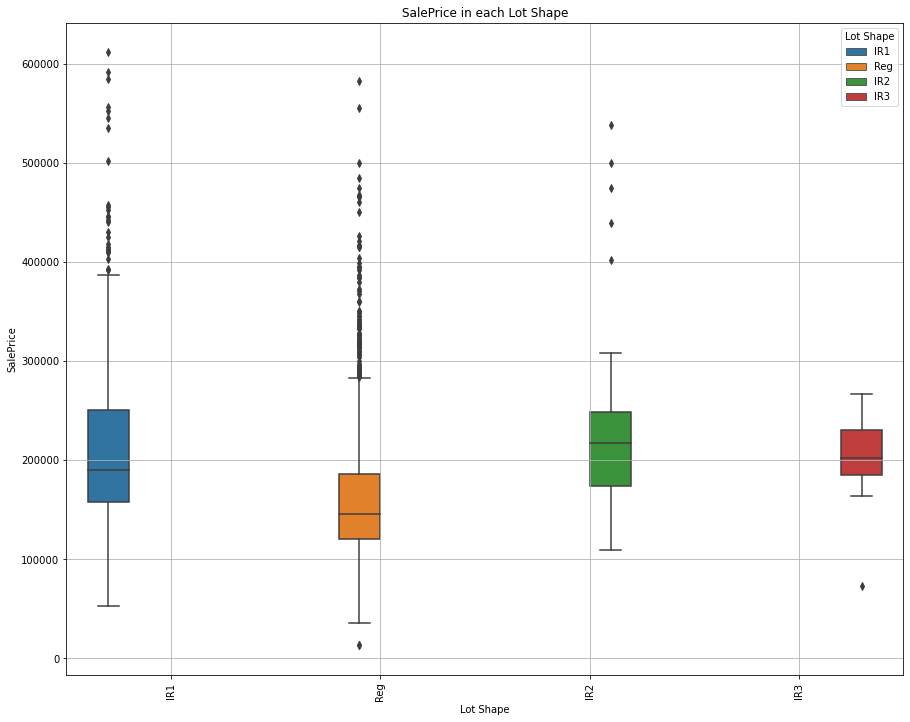

<Figure size 432x288 with 0 Axes>

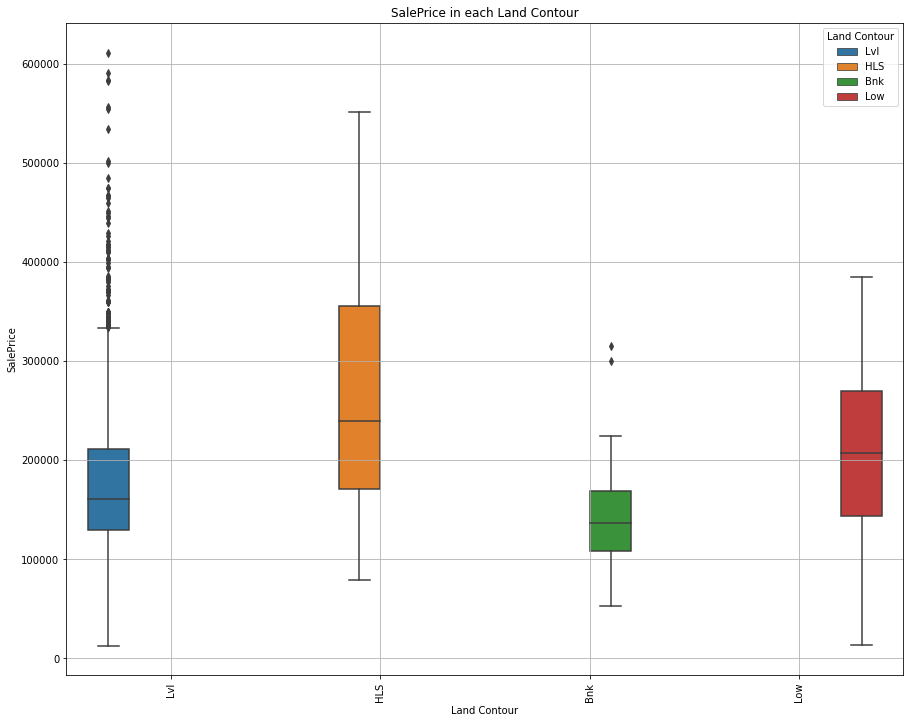

<Figure size 432x288 with 0 Axes>

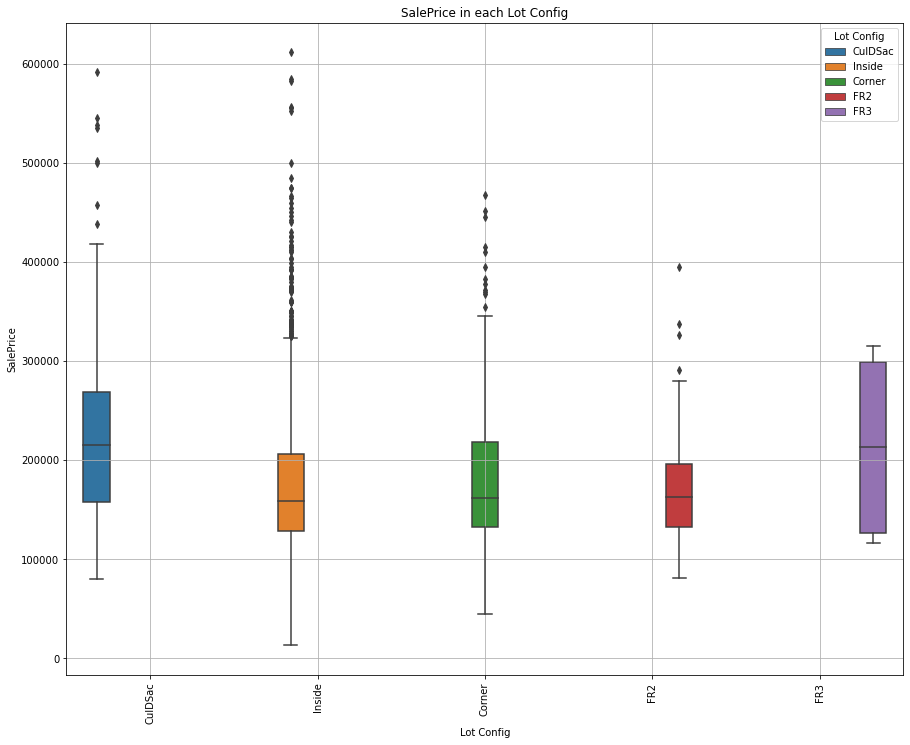

<Figure size 432x288 with 0 Axes>

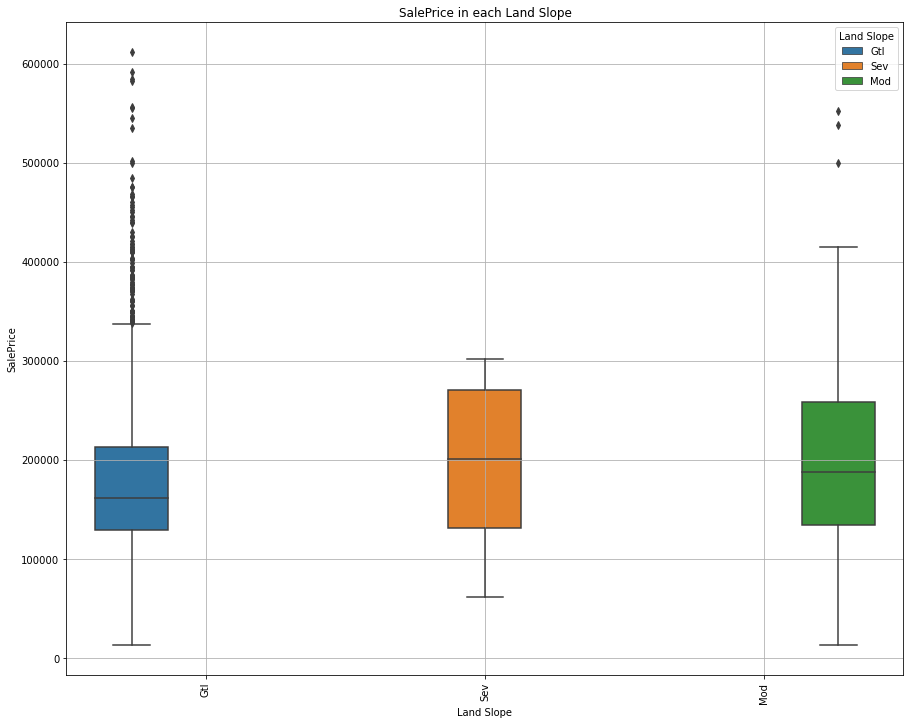

<Figure size 432x288 with 0 Axes>

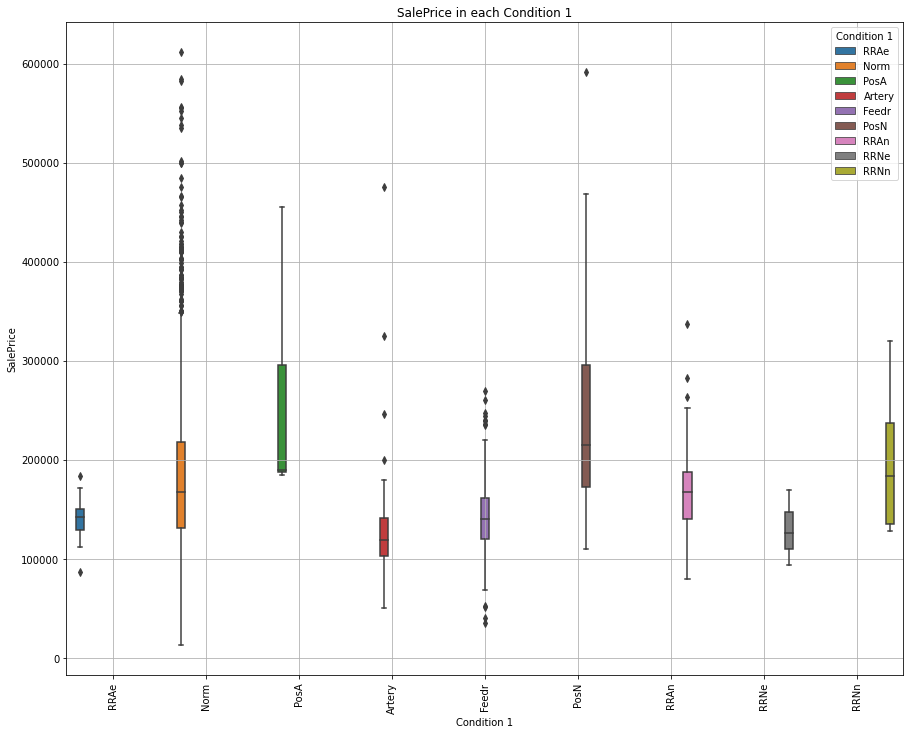

<Figure size 432x288 with 0 Axes>

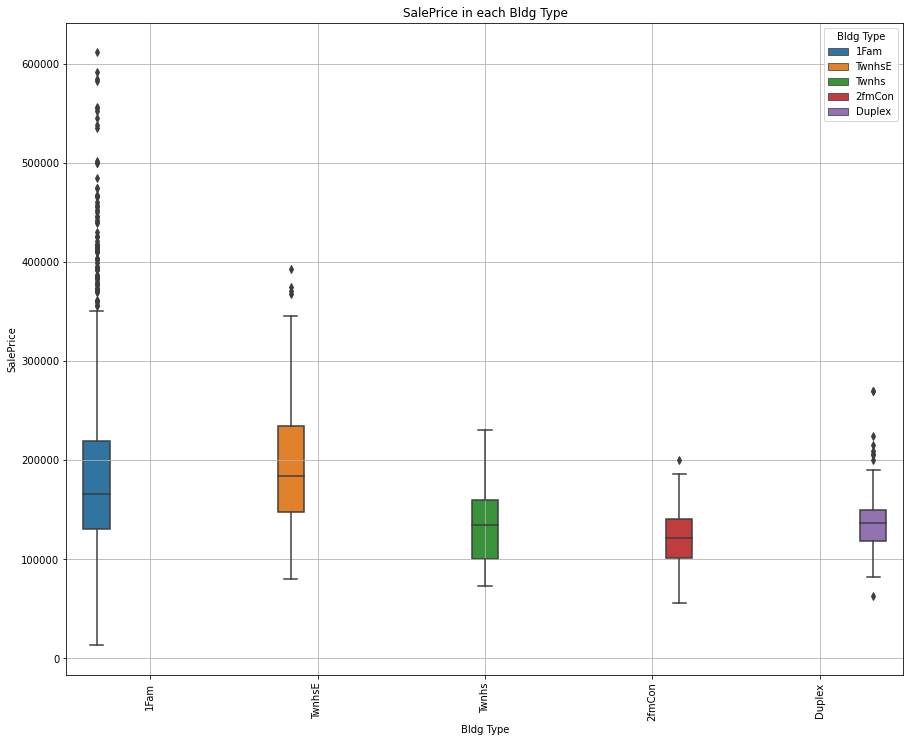

<Figure size 432x288 with 0 Axes>

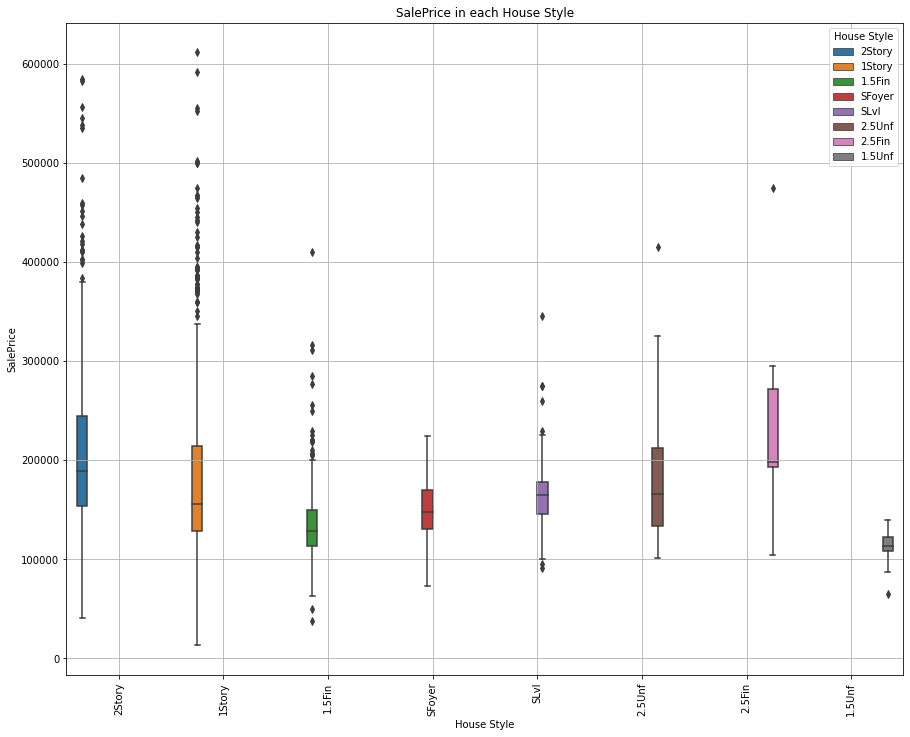

<Figure size 432x288 with 0 Axes>

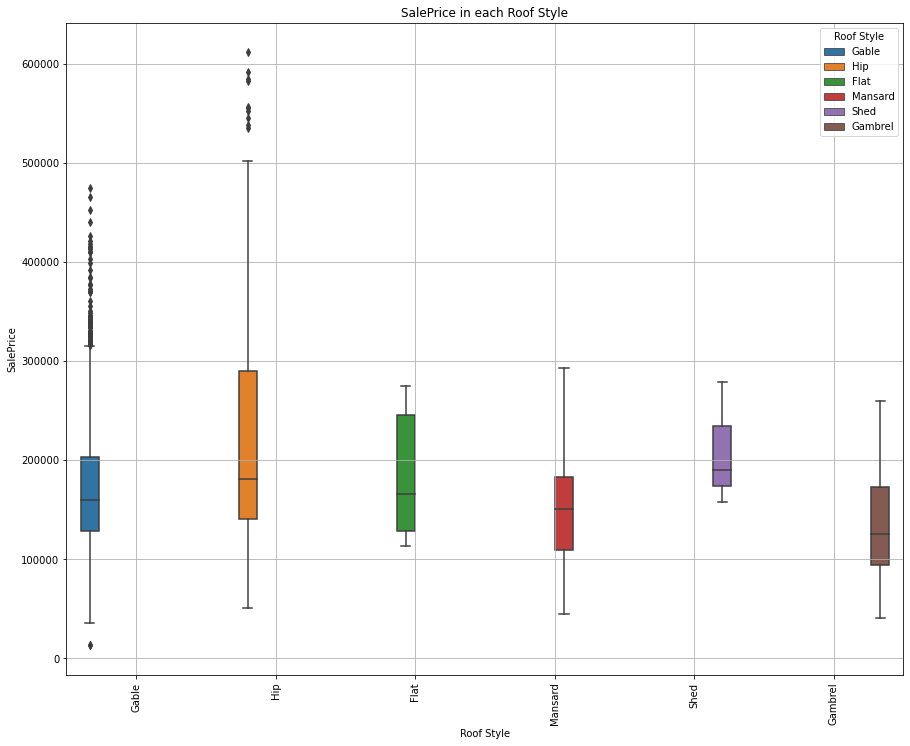

<Figure size 432x288 with 0 Axes>

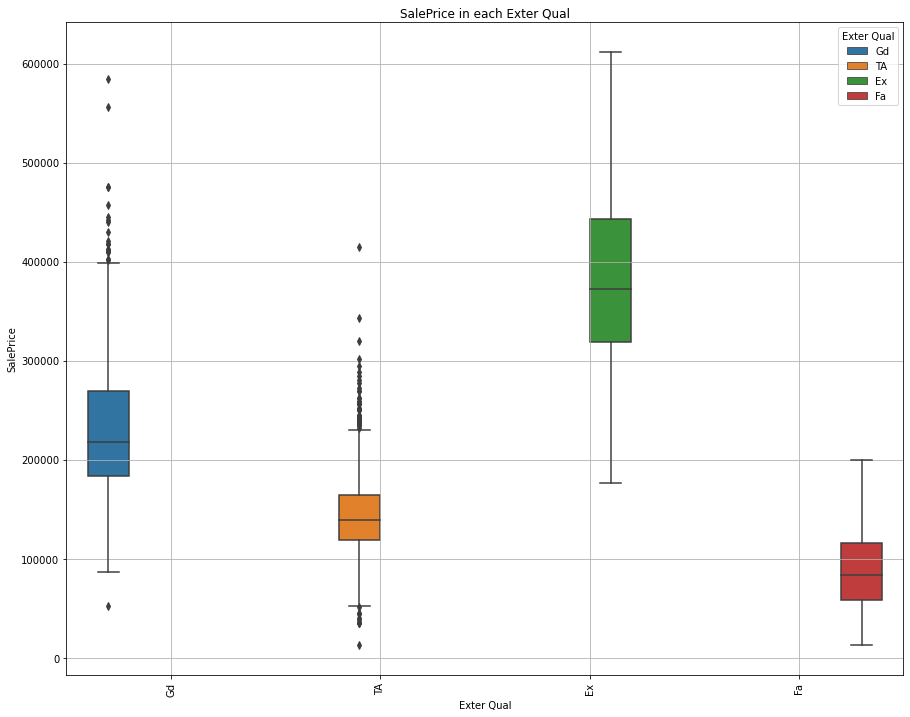

<Figure size 432x288 with 0 Axes>

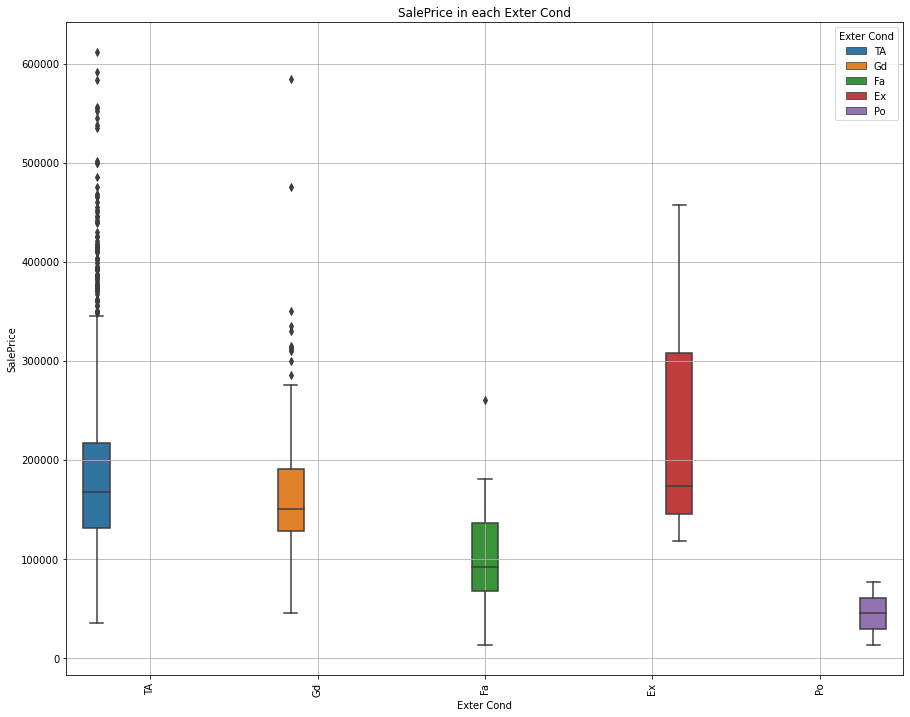

<Figure size 432x288 with 0 Axes>

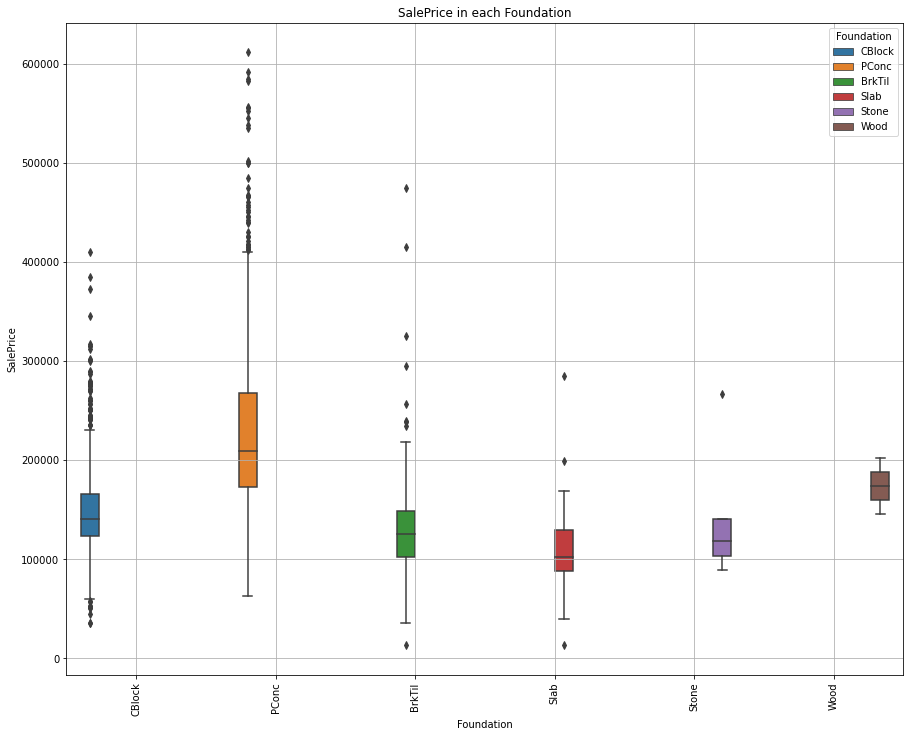

<Figure size 432x288 with 0 Axes>

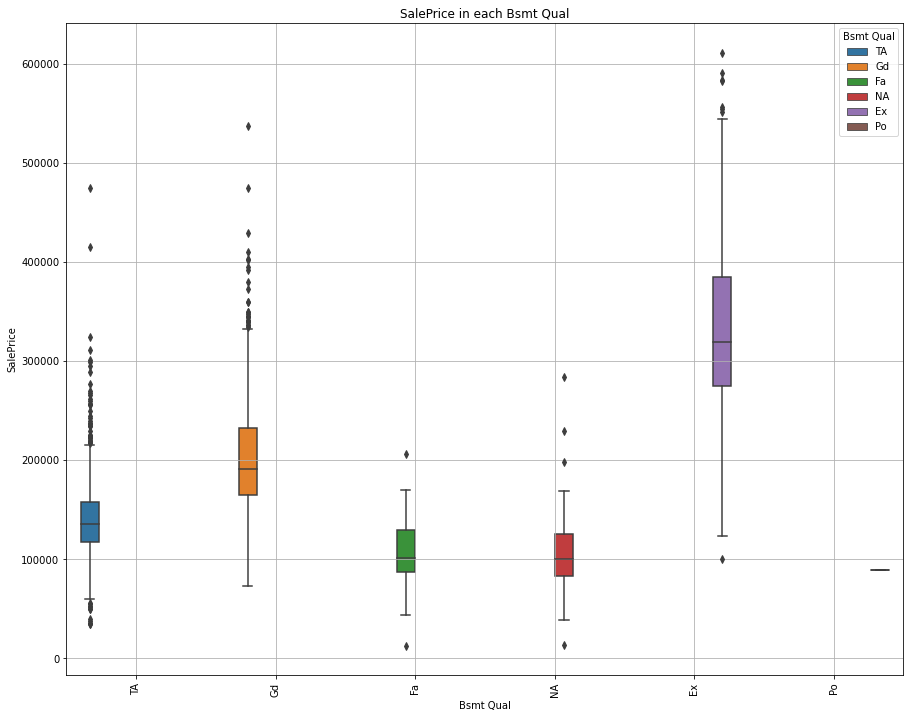

<Figure size 432x288 with 0 Axes>

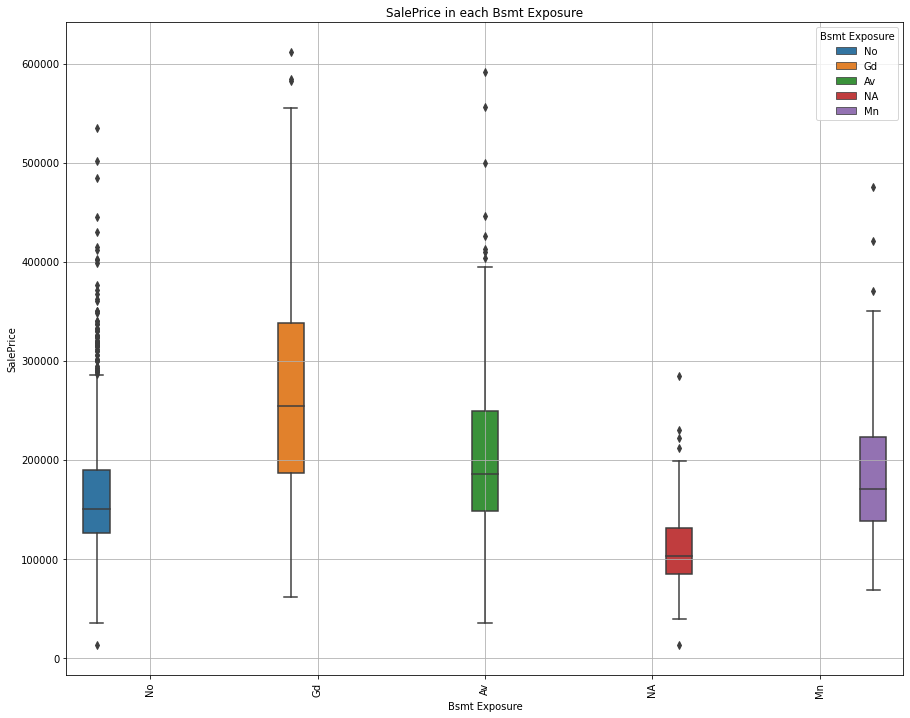

<Figure size 432x288 with 0 Axes>

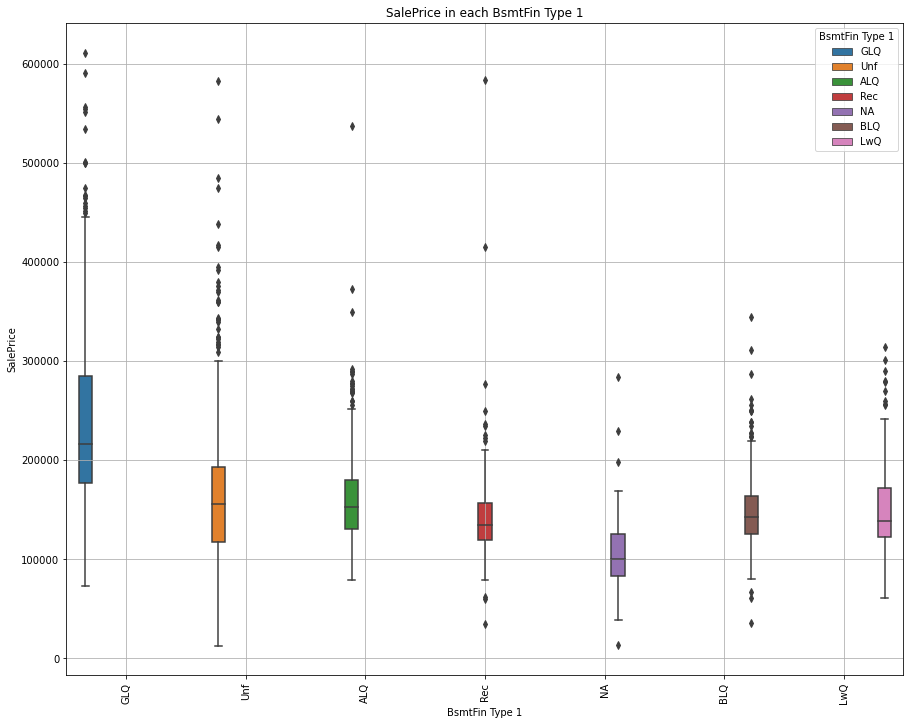

<Figure size 432x288 with 0 Axes>

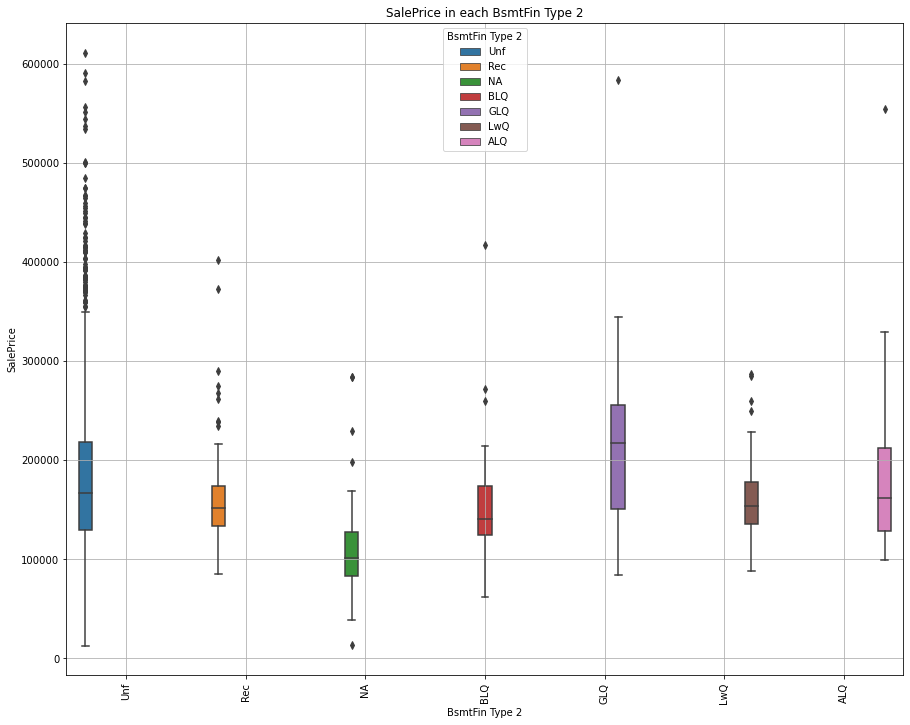

<Figure size 432x288 with 0 Axes>

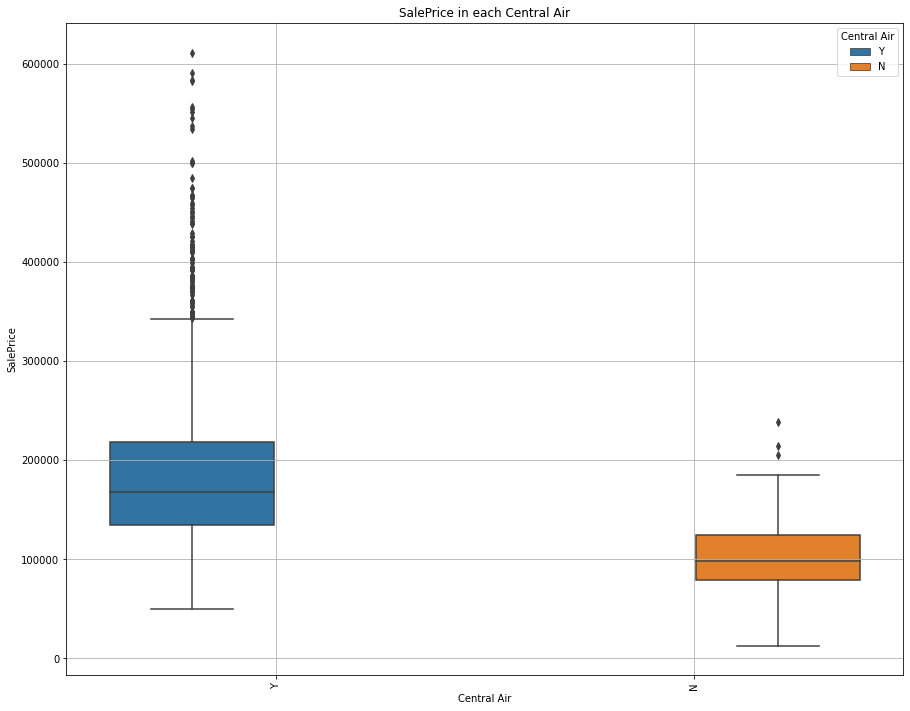

<Figure size 432x288 with 0 Axes>

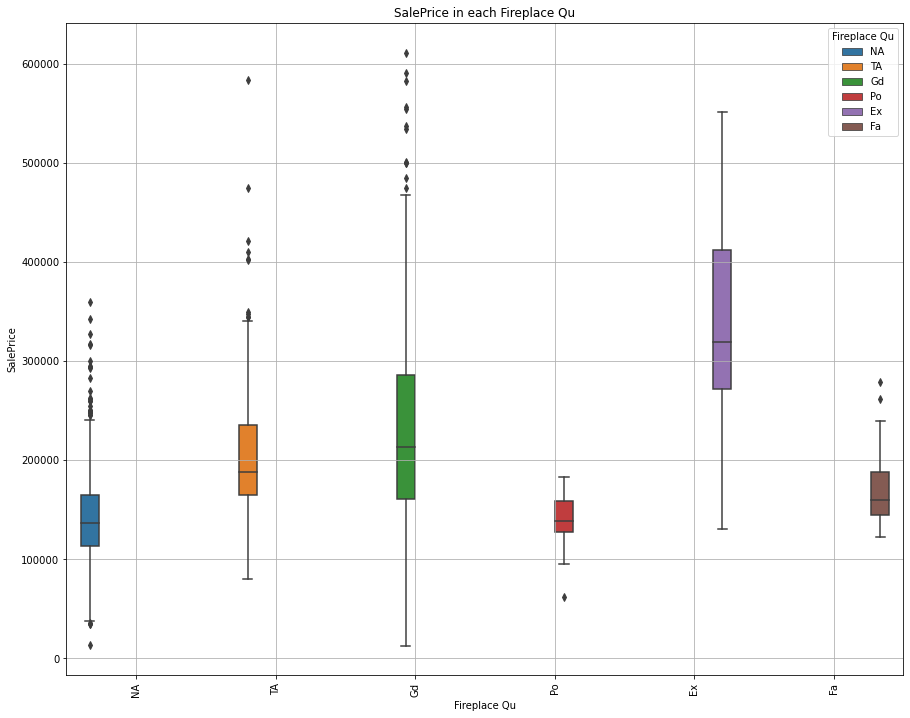

<Figure size 432x288 with 0 Axes>

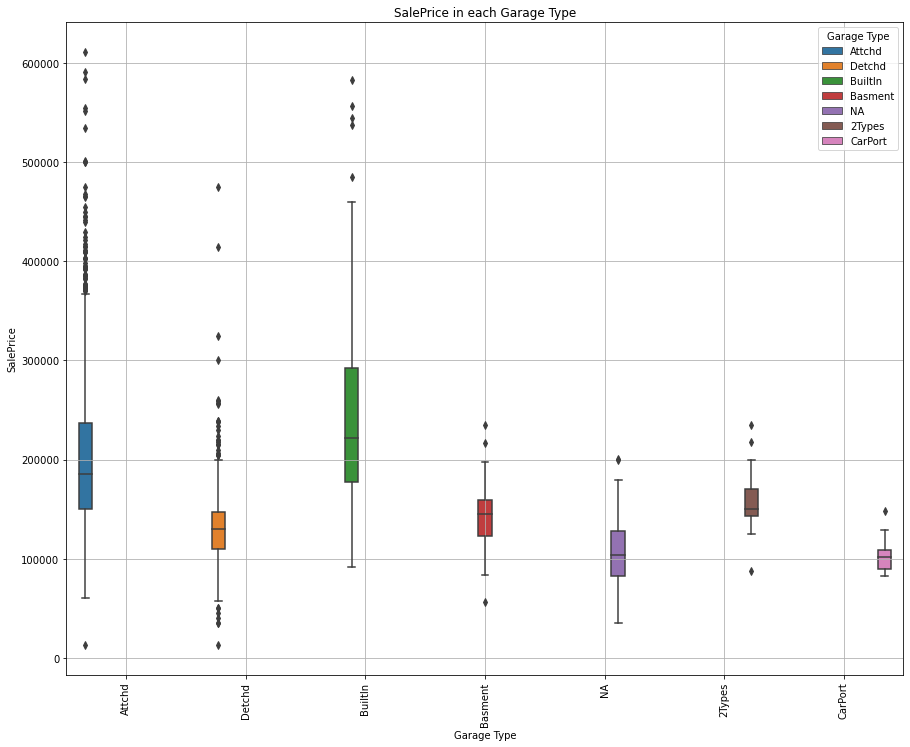

<Figure size 432x288 with 0 Axes>

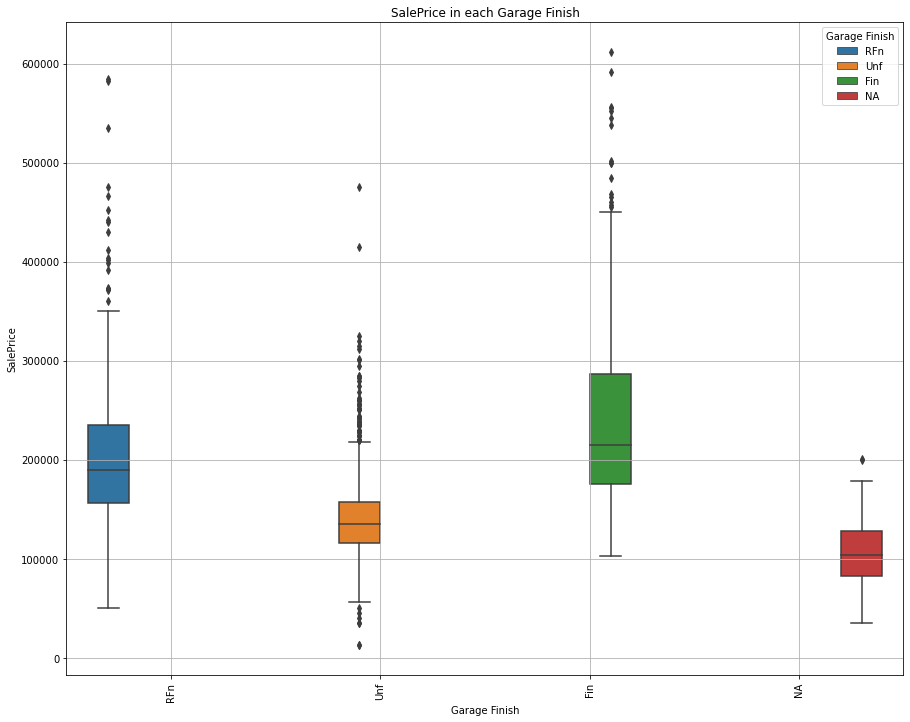

<Figure size 432x288 with 0 Axes>

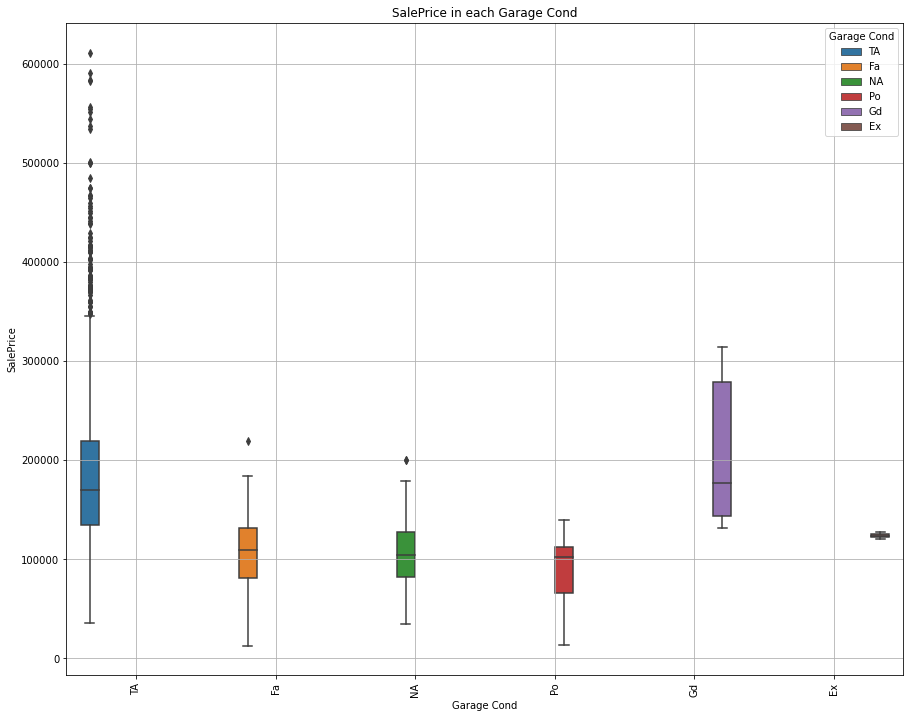

<Figure size 432x288 with 0 Axes>

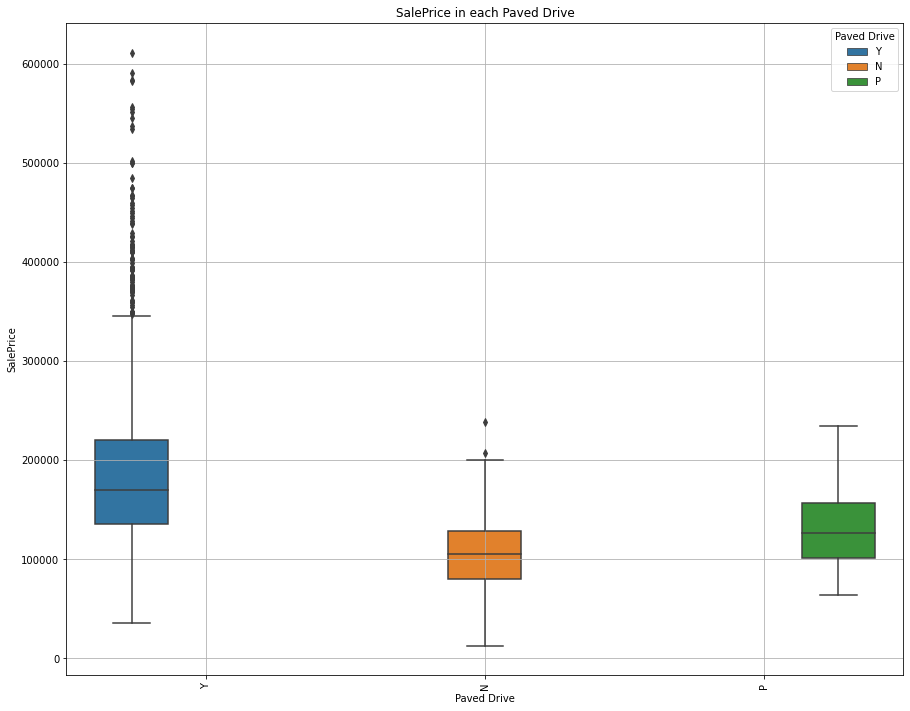

<Figure size 432x288 with 0 Axes>

In [212]:
# Create boxplot for all catrgorical columns
cat_boxplot(train_df,list_feature = cat_col)

# Modeling

> ### Linear Regression

In [213]:
# Create function that will show r2 and rmse of train and validation from linear regression
def linear(X,y):
    lr = LinearRegression() # Instantiate model
    lr.fit(X,y) # Fit the model
    lr_r2 = lr.score(X,y) # calculate r2 of train data
    lr_rmse = np.sqrt(metrics.mean_squared_error(y, lr.predict(X))) #calculate root mean squared error of train data
    lr_r2_val = cross_val_score(lr, X,y , cv = 10).mean() # use cross validation to look for r2 on unseen data  # use cross validation to look for r2 on unseen data
    lr_rmse_val = np.abs(cross_val_score(lr, X,y , cv = 10, scoring = 'neg_root_mean_squared_error').mean())  # use cross validation to look for rmse on unseen data
    print('--- EVALUATION: Linear Regression----')  # use cross validation to look for r2 on unseen data
    print('')
    print(f'Train R2   : {lr_r2}')
    print(f'Val R2     : {lr_r2_val}')
    print(f'Train RMSE : {lr_rmse}')
    print(f'Val RMSE   : {lr_rmse_val}')
    return lr

> ### Ridge Regression

In [214]:
# Create function that will show r2 and rmse of train and validation from ridge regression
def ridge_reg(X,y):
    # Find optimal alpha
    ridge = RidgeCV(alphas = np.logspace(0.1,10,100))
    ridge.fit(X,y)
    opt_alpha = ridge.alpha_
    # Instantiate and fit again with optimal alpha
    ridge = Ridge(alpha = opt_alpha)
    ridge.fit(X,y)
    ridge_r2 = ridge.score(X,y)
    ridge_rmse = np.sqrt(metrics.mean_squared_error(y, ridge.predict(X)).mean())
    ridge_r2_val = cross_val_score(ridge, X, y, cv = 10).mean()
    ridge_rmse_val = np.abs(cross_val_score(ridge, X, y, cv = 10, scoring = 'neg_root_mean_squared_error').mean())
    print('--- EVALUATION: Ridge Regression----')
    print('')
    print(f'Train R2   : {ridge_r2}')
    print(f'Val R2     : {ridge_r2_val}')
    print(f'Train RMSE : {ridge_rmse}')
    print(f'Val RMSE   : {ridge_rmse_val}')
    return ridge

> ### Lasso Regression

In [215]:
# Create function that will show r2 and rmse of train and validation from lasso regression
def lasso_reg(X,y):
    # Find optimal alpha
    lasso = LassoCV(n_alphas = 100)
    lasso.fit(X, y)
    opt_alpha = lasso.alpha_
    # Instantiate and fit model again with the optimal alpha
    lasso = Lasso(alpha = opt_alpha)
    lasso.fit(X,y)
    lasso_r2 = lasso.score(X,y)
    lasso_rmse = np.sqrt(metrics.mean_squared_error(y, lasso.predict(X)).mean())
    lasso_r2_val = cross_val_score(lasso, X, y, cv = 10).mean()
    lasso_rmse_val = np.abs(cross_val_score(lasso, X, y, cv = 10, scoring = 'neg_root_mean_squared_error')).mean()
    print('--- EVALUATION: Lasso Regression----')
    print('')
    print(f'Train R2   : {lasso_r2}')
    print(f'Val R2     : {lasso_r2_val}')
    print(f'Train RMSE : {lasso_rmse}')
    print(f'Val RMSE   : {lasso_rmse_val}')
    return lasso

> ### ElasticNet Regression

In [216]:
# Create function that will show r2 and rmse of train and validation from elastic net regression
def elas_net_reg(X,y):
    # Find optimal alpha and l1 ratio
    elas_net = ElasticNetCV(n_alphas = 100, l1_ratio = [.1,.2,.3,.4,.5,.6,.7,.8,.9,.10])
    elas_net.fit(X, y)
    opt_alpha = elas_net.alpha_
    l1_ratio = elas_net.l1_ratio_
    # Instantiate and fit the model again with optimal alpha and l1 ratio
    elas_net = ElasticNet(alpha = opt_alpha, l1_ratio = l1_ratio)
    elas_net.fit(X,y)
    elas_net_r2 = elas_net.score(X,y)
    elas_net_rmse = np.sqrt(metrics.mean_squared_error(y, elas_net.predict(X)).mean())
    elas_net_r2_val = cross_val_score(elas_net, X, y, cv = 10).mean()
    elas_net_rmse_val = np.abs(cross_val_score(elas_net, X, y, cv = 10, scoring = 'neg_root_mean_squared_error').mean())
    print('--- EVALUATION: ElasticNet Regression----')
    print('')
    print(f'Train R2   : {elas_net_r2}')
    print(f'Val R2     : {elas_net_r2_val}')
    print(f'Train RMSE : {elas_net_rmse}')
    print(f'Val RMSE   : {elas_net_rmse_val}')
    return elas_net

## Model 1

In [217]:
train_df.shape

(2045, 62)

In [218]:
train_df.head()

Id        PID  MS SubClass  Lot Frontage  Lot Area Street Alley Lot Shape  \
0  109  533352170           60       69.0552     13517   Pave    NA       IR1   
1  544  531379050           60       43.0000     11492   Pave    NA       IR1   
2  153  535304180           20       68.0000      7922   Pave    NA       Reg   
3  318  916386060           60       73.0000      9802   Pave    NA       Reg   
4  255  906425045           50       82.0000     14235   Pave    NA       IR1   

  Land Contour Lot Config  ... Wood Deck SF Open Porch SF Enclosed Porch  \
0          Lvl    CulDSac  ...            0            44              0   
1          Lvl    CulDSac  ...            0            74              0   
2          Lvl     Inside  ...            0            52              0   
3          Lvl     Inside  ...          100             0              0   
4          Lvl     Inside  ...            0            59              0   

  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold Yr Sold  SalePrice  
0          0             0          0         0        3    2010     130500  
1          0             0          0         0        4    2009     220000  
2          0             0          0         0        1    2010     109000  
3          0             0          0         0        4    2010     174000  
4          0             0          0         0        3    2010     138500  

[5 rows x 62 columns]

In [219]:
# After see the boxplot I decided to drop some column that I think it might not relevant with the predict model
# Create new data frame so that I can use the old one in other model
# I create model1_df by copy train_df
model1_df = train_df.copy()
model1_df.drop(columns = ['Alley', 'Lot Config', 'Land Slope', 'Bldg Type', 'Roof Style'], inplace= True)

In [220]:
# train_df still has the same columns and rows
train_df.shape

(2045, 62)

In [221]:
# model1_df now has 74 columns
model1_df.shape

(2045, 57)

In [222]:
# Create list of categorical column
cat_col = find_col_type(model1_df, 'Categorical')
cat_col

['Street',
 'Lot Shape',
 'Land Contour',
 'Condition 1',
 'House Style',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Cond',
 'Paved Drive']

In [223]:
len(cat_col)

18

In [224]:
# For Numerical I will use column that has correlation with sale price more than 0.4 to predict the sale price
col_morethan_04 = []
for key,value in model1_df.corr()['SalePrice'].sort_values(ascending = False).iteritems():
    if value > 0.4 and key != 'SalePrice':
        col_morethan_04.append(key)
col_morethan_04

['Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1']

In [225]:
# Create list of numerical columns that not in column that has correlation with sale price more than 0.4
num_col_drop = [col for col in model1_df[num_col].columns if col not in col_morethan_04]
num_col_drop

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Cond',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [226]:
# I still want Sale price so I remove it from the list
num_col_drop.remove('SalePrice')

In [227]:
len(num_col_drop)

24

In [228]:
model1_df.shape

(2045, 57)

In [229]:
model1_df.drop(columns = num_col_drop, inplace = True)

In [230]:
model1_df.shape

(2045, 33)

In [231]:
model1_df.columns

Index(['Street', 'Lot Shape', 'Land Contour', 'Condition 1', 'House Style',
       'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'Total Bsmt SF',
       'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Cond', 'Paved Drive', 'SalePrice'],
      dtype='object')

In [232]:
# Create dummy varibale for categorical columns
model1_df = pd.get_dummies(data = model1_df, columns = cat_col)

In [233]:
model1_df.head()

Overall Qual  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0             6        1976            2005         289.0         533.0   
1             7        1996            1997         132.0         637.0   
2             5        1953            2007           0.0         731.0   
3             5        2006            2007           0.0           0.0   
4             6        1900            1993           0.0           0.0   

   Total Bsmt SF  1st Flr SF  Gr Liv Area  Full Bath  TotRms AbvGrd  ...  \
0          725.0         725         1479          2              6  ...   
1          913.0         913         2122          2              8  ...   
2         1057.0        1057         1057          1              5  ...   
3          384.0         744         1444          2              7  ...   
4          676.0         831         1445          2              6  ...   

   Garage Finish_Unf  Garage Cond_Ex  Garage Cond_Fa  Garage Cond_Gd  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  1               0               0               0   
3                  0               0               0               0   
4                  1               0               0               0   

   Garage Cond_NA  Garage Cond_Po  Garage Cond_TA  Paved Drive_N  \
0               0               0               1              0   
1               0               0               1              0   
2               0               0               1              0   
3               0               0               1              0   
4               0               0               1              1   

   Paved Drive_P  Paved Drive_Y  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              0  

[5 rows x 110 columns]

In [234]:
# Create list of columns to use as a feature to predict sale price
features = [col for col in model1_df.columns if col != 'SalePrice']

In [235]:
len(features)

109

In [236]:
# Assign feature and target to X and y
X = model1_df[features]
y = model1_df['SalePrice']

In [237]:
# Before fit these variable to Linear regression I will transform it to be in the same scale first
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [238]:
# We can see that val R2 is a minus value
# This means that my model is doing worse than the baseline model
# This might happen because of the model is overfitting
lr = linear(X_scaled,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.9003934950548609
Val R2     : -1.585599451569493e+24
Train RMSE : 25022.68076901439
Val RMSE   : 3.2306431283865664e+16


### LassoCV

I will use Lasso to solve overfitting problem

In [239]:
# Instantiate model
lasso = lasso_reg(X_scaled,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.8987629559683247
Val R2     : 0.8903548911635524
Train RMSE : 25226.657597711077
Val RMSE   : 26159.697546207353


> Try with test data

In [240]:
model1_test_df = test_df.copy()

In [241]:
model1_test_df.drop(columns = ['Alley', 'Lot Config', 'Land Slope', 'Bldg Type', 'Roof Style'], inplace= True)

In [242]:
model1_test_df.drop(columns = num_col_drop, inplace = True)

In [243]:
model1_df.shape

(2045, 110)

In [244]:
model1_test_df.shape

(879, 33)

In [245]:
model1_test_df = pd.get_dummies(data = model1_test_df, columns = cat_col)

In [246]:
X_test = model1_test_df[features]

In [247]:
X_test_scaled = ss.transform(X_test)

In [248]:
prediction = lasso.predict(X_test_scaled)

In [249]:
model1 = test_df[['Id']]

In [250]:
model1['SalePrice'] = np.round(prediction)

<ipython-input-250-6e0d12ed2b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1['SalePrice'] = np.round(prediction)


In [251]:
model1

Id  SalePrice
0    2658   138552.0
1    2718   193750.0
2    2414   198895.0
3    1989   122117.0
4     625   187233.0
..    ...        ...
874  1662   195858.0
875  1234   219723.0
876  1373   121746.0
877  1672   112386.0
878  1939   128411.0

[879 rows x 2 columns]

In [252]:
model1.to_csv('datasets/model/model1.csv', index = False)

# Model 2

In [253]:
model2_train = train_df.copy()
model2_test = test_df.copy()

In [254]:
model2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2045 non-null   int64  
 1   PID              2045 non-null   int64  
 2   MS SubClass      2045 non-null   int64  
 3   Lot Frontage     2045 non-null   float64
 4   Lot Area         2045 non-null   int64  
 5   Street           2045 non-null   object 
 6   Alley            2045 non-null   object 
 7   Lot Shape        2045 non-null   object 
 8   Land Contour     2045 non-null   object 
 9   Lot Config       2045 non-null   object 
 10  Land Slope       2045 non-null   object 
 11  Condition 1      2045 non-null   object 
 12  Bldg Type        2045 non-null   object 
 13  House Style      2045 non-null   object 
 14  Overall Qual     2045 non-null   int64  
 15  Overall Cond     2045 non-null   int64  
 16  Year Built       2045 non-null   int64  
 17  Year Remod/Add

In [255]:
model2_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   Lot Frontage     879 non-null    float64
 4   Lot Area         879 non-null    int64  
 5   Street           879 non-null    object 
 6   Alley            879 non-null    object 
 7   Lot Shape        879 non-null    object 
 8   Land Contour     879 non-null    object 
 9   Lot Config       879 non-null    object 
 10  Land Slope       879 non-null    object 
 11  Condition 1      879 non-null    object 
 12  Bldg Type        879 non-null    object 
 13  House Style      879 non-null    object 
 14  Overall Qual     879 non-null    int64  
 15  Overall Cond     879 non-null    int64  
 16  Year Built       879 non-null    int64  
 17  Year Remod/Add  

In [256]:
# I'm not gonna use Id and PID, so I decided to dropped them
model2_train.drop(columns = ['Id','PID'], inplace = True)

In [257]:
# Find numeric and categorical column
num_col = find_col_type(model2_train, 'Numerical')
cat_col = find_col_type(model2_train, 'Categorical')

## Numerical Columns

Select features in numerical columns

In [258]:
model2_train[num_col].corr()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
MS SubClass         1.000000     -0.384798 -0.248865      0.037344   
Lot Frontage       -0.384798      1.000000  0.356721      0.173499   
Lot Area           -0.248865      0.356721  1.000000      0.090750   
Overall Qual        0.037344      0.173499  0.090750      1.000000   
Overall Cond       -0.069639     -0.058339 -0.017850     -0.080871   
Year Built          0.036741      0.105876  0.029756      0.601957   
Year Remod/Add      0.045547      0.072317  0.043226      0.583626   
Mas Vnr Area       -0.000816      0.186025  0.143934      0.424214   
BsmtFin SF 1       -0.060761      0.141074  0.166473      0.266911   
BsmtFin SF 2       -0.068627      0.038969  0.044773     -0.027379   
Bsmt Unf SF        -0.139533      0.132146  0.041809      0.275427   
Total Bsmt SF      -0.235019      0.298734  0.232880      0.552555   
1st Flr SF         -0.252982      0.398037  0.346178      0.474099   
2nd Flr SF          0.304916      0.011381  0.026739      0.229374   
Low Qual Fin SF     0.030952      0.001177  0.002053     -0.052321   
Gr Liv Area         0.073190      0.320364  0.293487      0.565002   
Bsmt Full Bath      0.025751      0.083099  0.103024      0.170857   
Bsmt Half Bath     -0.015908     -0.033155  0.023916     -0.052199   
Full Bath           0.142729      0.140057  0.122668      0.514836   
Half Bath           0.179432      0.030118  0.044059      0.273085   
Bedroom AbvGr      -0.004261      0.208508  0.141596      0.054380   
Kitchen AbvGr       0.252008      0.018616 -0.012368     -0.171290   
TotRms AbvGrd       0.037113      0.322795  0.217941      0.374642   
Fireplaces         -0.054354      0.214256  0.276577      0.383209   
Garage Yr Blt       0.030902      0.085102  0.026334      0.585735   
Garage Cars        -0.048746      0.296356  0.214745      0.587200   
Garage Area        -0.108177      0.335353  0.246365      0.559731   
Wood Deck SF        0.002504      0.103732  0.149160      0.253032   
Open Porch SF      -0.018730      0.158141  0.117554      0.300914   
Enclosed Porch     -0.041071      0.003570  0.017380     -0.153406   
3Ssn Porch         -0.030266      0.032120  0.020711      0.032353   
Screen Porch       -0.039288      0.077029  0.071259      0.049722   
Pool Area          -0.005320      0.079509  0.070317     -0.010665   
Misc Val           -0.019954      0.013185  0.042870     -0.022734   
Mo Sold             0.014719     -0.018213  0.005412      0.017863   
Yr Sold            -0.033177      0.007416 -0.029820     -0.010845   
SalePrice          -0.087166      0.348090  0.303297      0.803118   

                 Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  \
MS SubClass         -0.069639    0.036741        0.045547     -0.000816   
Lot Frontage        -0.058339    0.105876        0.072317      0.186025   
Lot Area            -0.017850    0.029756        0.043226      0.143934   
Overall Qual        -0.080871    0.601957        0.583626      0.424214   
Overall Cond         1.000000   -0.370092        0.043797     -0.130657   
Year Built          -0.370092    1.000000        0.629675      0.319389   
Year Remod/Add       0.043797    0.629675        1.000000      0.201973   
Mas Vnr Area        -0.130657    0.319389        0.201973      1.000000   
BsmtFin SF 1        -0.043037    0.277735        0.163628      0.289861   
BsmtFin SF 2         0.047871   -0.020850       -0.056508     -0.014391   
Bsmt Unf SF         -0.129564    0.135333        0.160083      0.080929   
Total Bsmt SF       -0.161170    0.419980        0.314195      0.378197   
1st Flr SF          -0.154200    0.327090        0.243144      0.359997   
2nd Flr SF           0.011650    0.022980        0.159562      0.099596   
Low Qual Fin SF      0.004836   -0.159668       -0.066523     -0.061565   
Gr Liv Area         -0.109483    0.258292        0.322317      0.361392   
Bsmt Full Bath      -0.038983    0.213837        0.152025      0.139712   
Bsmt H

<AxesSubplot:>

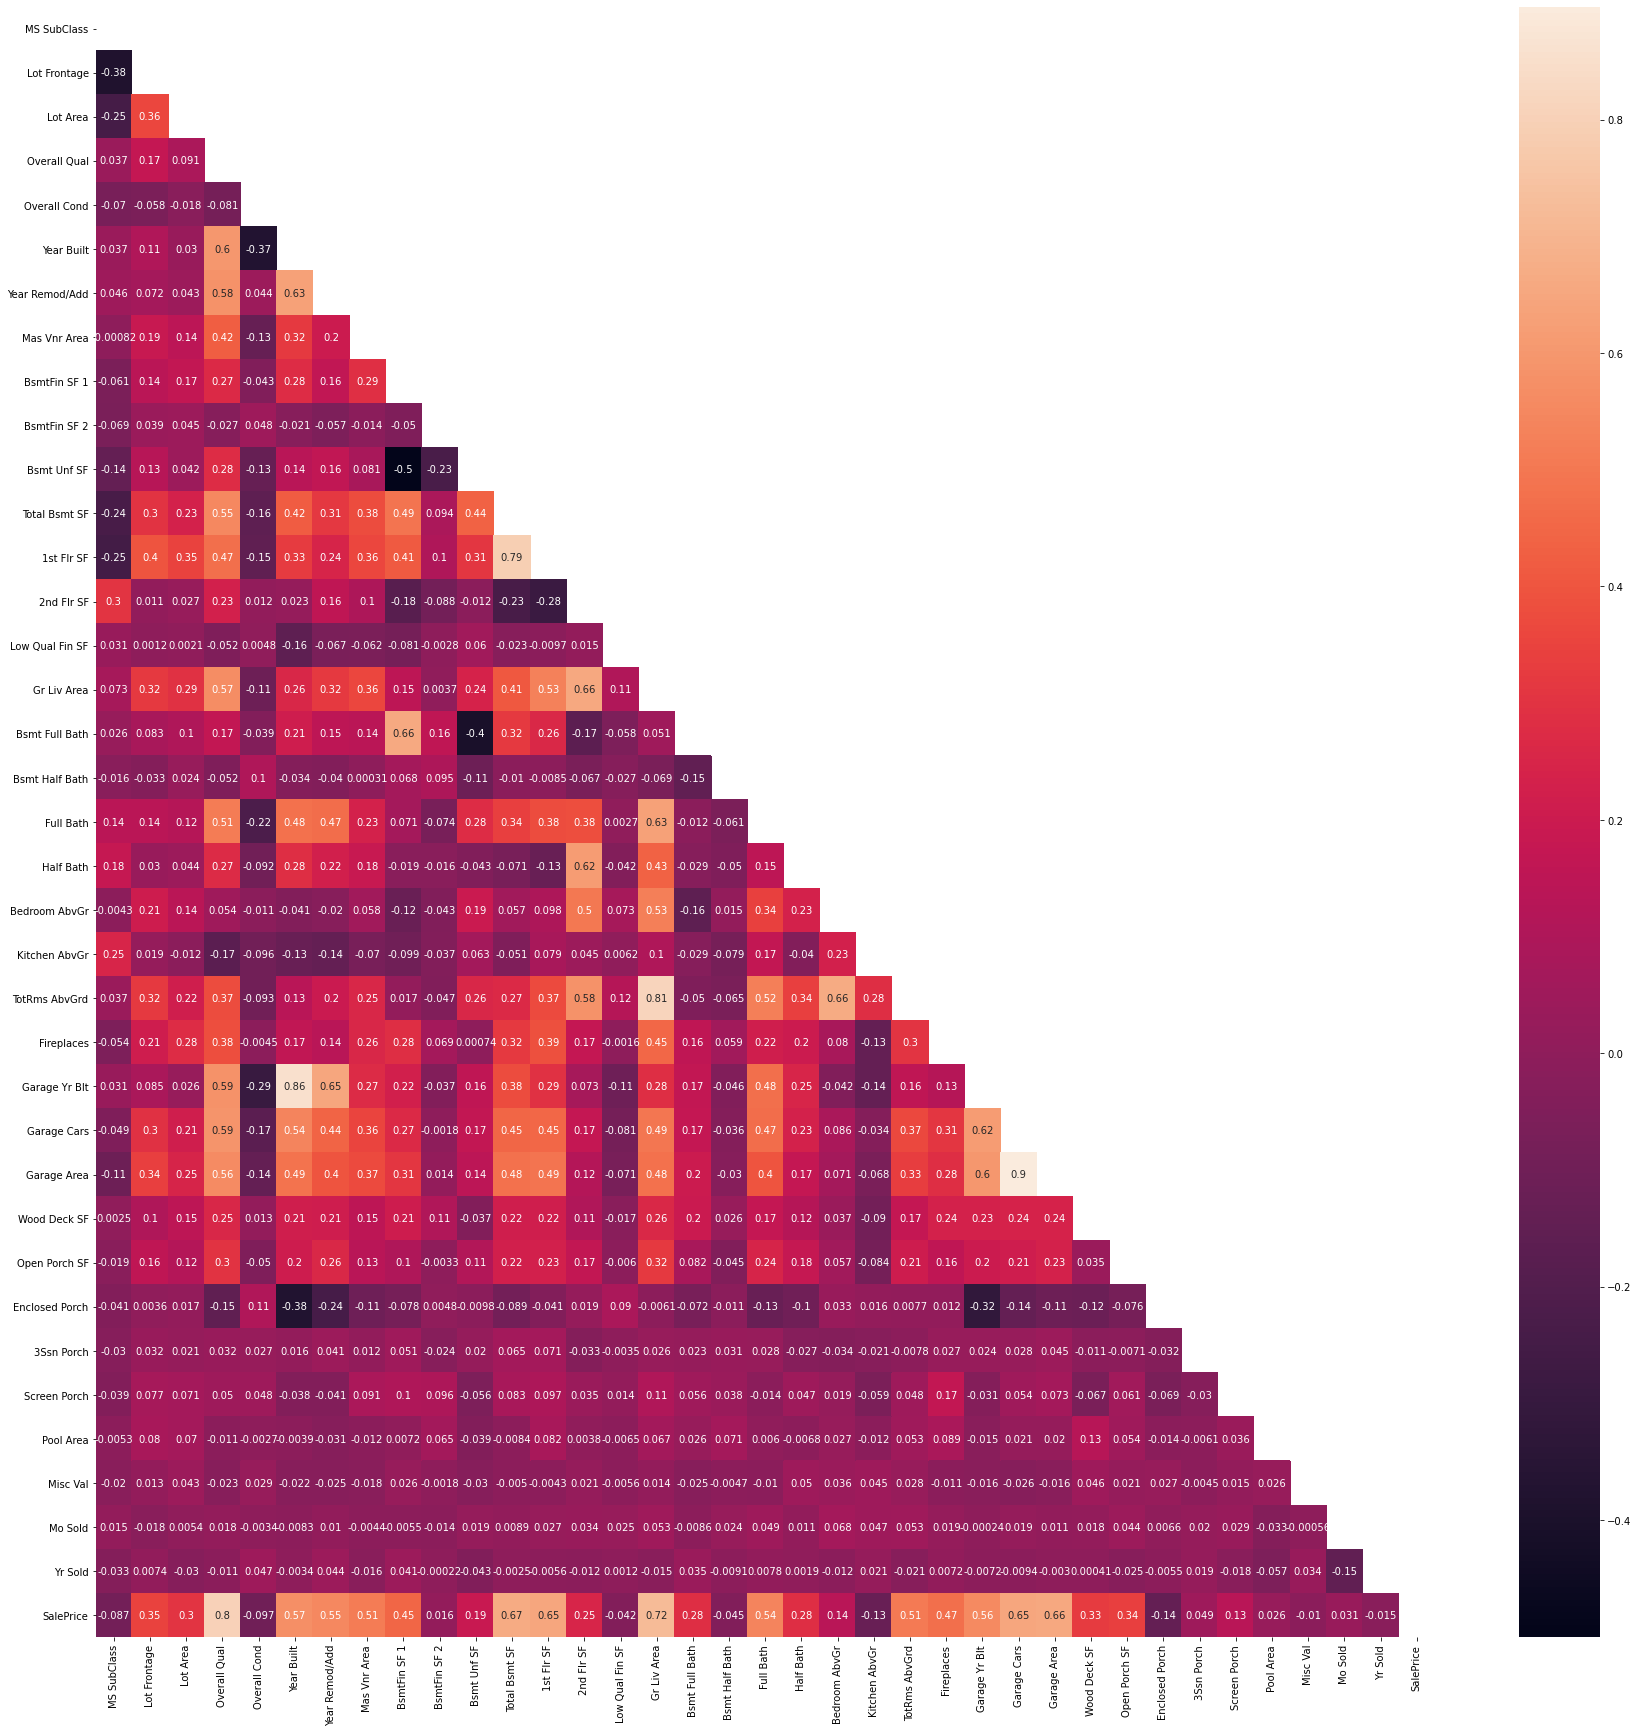

In [259]:
# Create Heat map to see correlation between variables
plt.figure(figsize = (30,30))

mask = np.zeros_like(model2_train[num_col].corr())
mask [np.triu_indices_from(mask)] = True

sns.heatmap(model2_train[num_col].corr(), mask = mask, annot = True)

<AxesSubplot:>

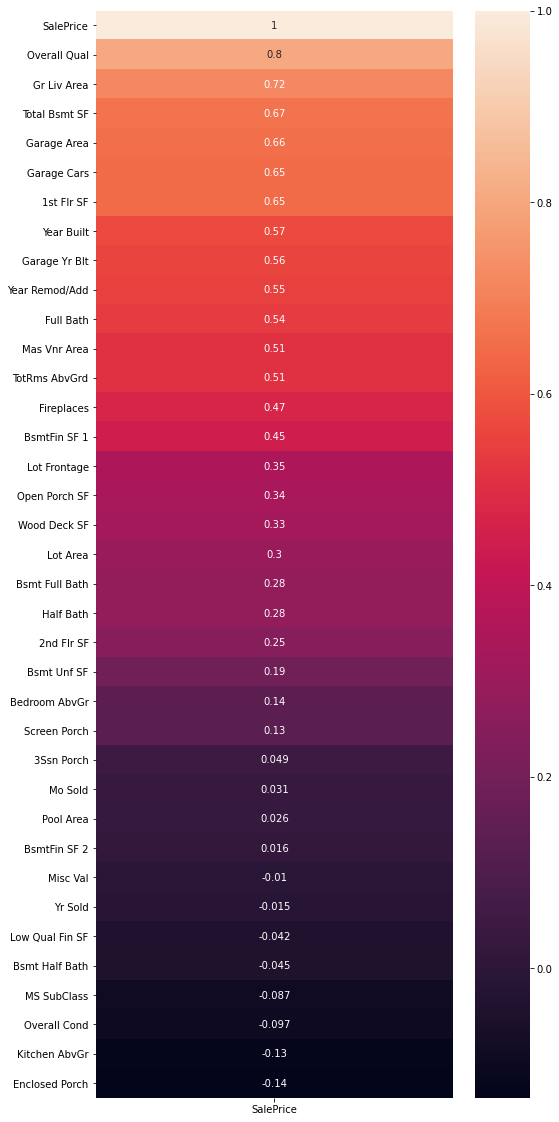

In [260]:
plt.figure(figsize = (8,20))
sns.heatmap(model2_train[num_col].corr()[['SalePrice']].sort_values(by = 'SalePrice',ascending = False), annot = True)

In [261]:
saleprice_corr = model2_train.corr()['SalePrice'].sort_values(ascending = False)
saleprice_corr

SalePrice          1.000000
Overall Qual       0.803118
Gr Liv Area        0.719525
Total Bsmt SF      0.665288
Garage Area        0.655472
Garage Cars        0.648494
1st Flr SF         0.648030
Year Built         0.572273
Garage Yr Blt      0.556644
Year Remod/Add     0.550219
Full Bath          0.537861
Mas Vnr Area       0.511928
TotRms AbvGrd      0.509373
Fireplaces         0.473149
BsmtFin SF 1       0.445874
Lot Frontage       0.348090
Open Porch SF      0.339070
Wood Deck SF       0.327810
Lot Area           0.303297
Bsmt Full Bath     0.284942
Half Bath          0.283832
2nd Flr SF         0.249712
Bsmt Unf SF        0.190174
Bedroom AbvGr      0.136811
Screen Porch       0.134707
3Ssn Porch         0.048772
Mo Sold            0.030664
Pool Area          0.025833
BsmtFin SF 2       0.016438
Misc Val          -0.010324
Yr Sold           -0.014944
Low Qual Fin SF   -0.041636
Bsmt Half Bath    -0.045415
MS SubClass       -0.087166
Overall Cond      -0.096587
Kitchen AbvGr     -0

In [262]:
# I will use only columns that have correlation over 0.4
corr_list = []
for col, value in saleprice_corr.iteritems():
    if value > 0.4 or value < -0.4:
        corr_list.append(col)
corr_list

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1']

In [263]:
len(corr_list)

15

In [264]:
len(cat_col)

23

In [265]:
# For this model I'll try to use all categorical columns
model2_new = model2_train[corr_list + cat_col]
model2_new.head()

SalePrice  Overall Qual  Gr Liv Area  Total Bsmt SF  Garage Area  \
0     130500             6         1479          725.0        475.0   
1     220000             7         2122          913.0        559.0   
2     109000             5         1057         1057.0        246.0   
3     174000             5         1444          384.0        400.0   
4     138500             6         1445          676.0        484.0   

   Garage Cars  1st Flr SF  Year Built  Garage Yr Blt  Year Remod/Add  ...  \
0          2.0         725        1976         1976.0            2005  ...   
1          2.0         913        1996         1997.0            1997  ...   
2          1.0        1057        1953         1953.0            2007  ...   
3          2.0         744        2006         2007.0            2007  ...   
4          2.0         831        1900         1957.0            1993  ...   

   Bsmt Qual  Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Central Air  \
0         TA             No             GLQ             Unf            Y   
1         Gd             No             GLQ             Unf            Y   
2         TA             No             GLQ             Unf            Y   
3         Gd             No             Unf             Unf            Y   
4         Fa             No             Unf             Unf            Y   

  Fireplace Qu Garage Type Garage Finish Garage Cond Paved Drive  
0           NA      Attchd           RFn          TA           Y  
1           TA      Attchd           RFn          TA           Y  
2           NA      Detchd           Unf          TA           Y  
3           NA     BuiltIn           Fin          TA           Y  
4           NA      Detchd           Unf          TA           N  

[5 rows x 38 columns]

In [266]:
model2_new = pd.get_dummies(model2_new, columns = cat_col, drop_first = True)
model2_new

SalePrice  Overall Qual  Gr Liv Area  Total Bsmt SF  Garage Area  \
0        130500             6         1479          725.0        475.0   
1        220000             7         2122          913.0        559.0   
2        109000             5         1057         1057.0        246.0   
3        174000             5         1444          384.0        400.0   
4        138500             6         1445          676.0        484.0   
...         ...           ...          ...            ...          ...   
2046     298751             8         1728         1884.0        520.0   
2047      82500             4          861          861.0        539.0   
2048     177000             6         1913          896.0        342.0   
2049     144000             4         1200         1200.0        294.0   
2050     189000             7         1804          994.0        442.0   

      Garage Cars  1st Flr SF  Year Built  Garage Yr Blt  Year Remod/Add  ...  \
0             2.0         725        1976         1976.0            2005  ...   
1             2.0         913        1996         1997.0            1997  ...   
2             1.0        1057        1953         1953.0            2007  ...   
3             2.0         744        2006         2007.0            2007  ...   
4             2.0         831        1900         1957.0            1993  ...   
...           ...         ...         ...            ...             ...  ...   
2046          2.0        1728        2007         2007.0            2007  ...   
2047          2.0         861        1940         1961.0            1950  ...   
2048          2.0        1172        1928         1929.0            1950  ...   
2049          1.0        1200        1956         1956.0            1956  ...   
2050          2.0        1028        1999         1999.0            1999  ...   

      Garage Finish_NA  Garage Finish_RFn  Garage Finish_Unf  Garage Cond_Fa  \
0                    0                  1                  0               0   
1                    0                  1                  0               0   
2                    0                  0                  1               0   
3                    0                  0                  0               0   
4                    0                  0                  1               0   
...                ...                ...                ...             ...   
2046                 0                  0                  0               0   
2047                 0                  0                  1               0   
2048                 0                  0                  1               1   
2049                 0                  0                  1               0   
2050                 0                  0                  0               0   

      Garage Cond_Gd  Garage Cond_NA  Garage Cond_Po  Garage Cond_TA  \
0                  0               0               0               1   
1                  0               0               0               1   
2                  0               0               0               1   
3                  0               0               0               1   
4                  0               0               0               1   
...              ...             ...             ...             ...   
2046               0               0               0               1   
2047               0               0               0               1   
2048               0               0               0               0   
2049               0               0               0               1   
2050               0               0               0               1   

      Paved Drive_P  Paved Drive_Y  
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              0  
...             ...            ...  
2046              0              1  
2047              0   

In [267]:
# Assign features and target to variables
features = [col for col in model2_new.columns if col != 'SalePrice']
X = model2_new[features]
y = model2_new['SalePrice']

In [268]:
# Look for shape of each variables
print(f'X shape: {X.shape} \ny shape: {y.shape}')

X shape: (2045, 108) 
y shape: (2045,)


In [269]:
# Standardize features before fit in other model
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

### Linear Regression

The first model I will use to predict the price is Linear regression.

In [270]:
# I use function that created above
linear(X_scaled,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.9079648505068083
Val R2     : -1.24944680623621e+22
Train RMSE : 24052.866765179668
Val RMSE   : 3000693547044912.5


LinearRegression()

We can see that the R2 on train data is high which means that the model is doing great but when look at R2 on unseen data that got from doing cross validation the R2 has a minus value. This means that our model is doing worse than baseline model because of the model is overfitting.

### Ridge Regression

Since the model is overfitting I will use ridge regression to solve the problem.

In [271]:
ridge = ridge_reg(X_scaled, y)

--- EVALUATION: Ridge Regression----

Train R2   : 0.9076727603404189
Val R2     : 0.8945029404449112
Train RMSE : 24091.004587875545
Val RMSE   : 25684.419652885535


### Lasso Regression

In [272]:
lasso = lasso_reg(X_scaled,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.9058138126373922
Val R2     : 0.8968061583410586
Train RMSE : 24332.32413456007
Val RMSE   : 25402.88969970124


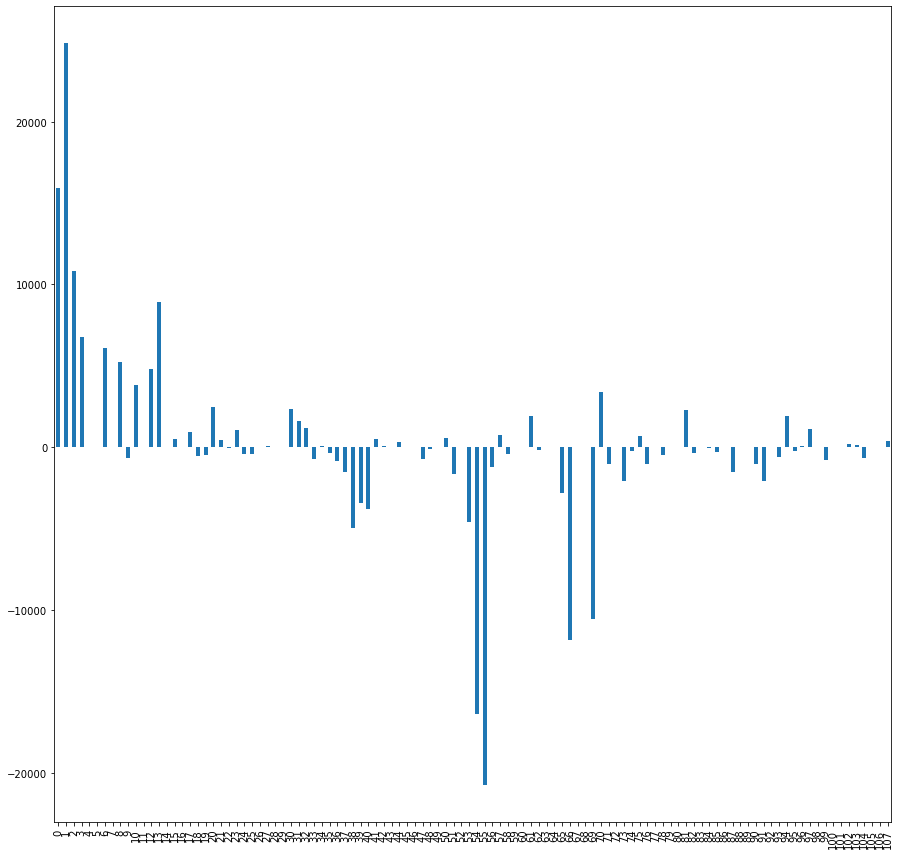

In [273]:
plt.figure(figsize = (15,15))
pd.Series(lasso.coef_).plot(kind = 'bar')
plt.xticks(rotation = 90);

In [274]:
lasso_df = pd.DataFrame(lasso.coef_)
lasso_df.rename(columns = {0:'Coefficient'}, inplace = True)
lasso_df['features'] = X.columns
lasso_df

Coefficient        features
0    15906.943936    Overall Qual
1    24815.386105     Gr Liv Area
2    10818.516539   Total Bsmt SF
3     6788.907702     Garage Area
4        0.000000     Garage Cars
..            ...             ...
103    141.327361  Garage Cond_NA
104   -665.311217  Garage Cond_Po
105     -0.000000  Garage Cond_TA
106     -0.000000   Paved Drive_P
107    403.570536   Paved Drive_Y

[108 rows x 2 columns]

In [275]:
lasso_df[lasso_df['Coefficient'] == 0]

Coefficient            features
4            0.0         Garage Cars
5            0.0          1st Flr SF
7            0.0       Garage Yr Blt
11          -0.0       TotRms AbvGrd
14           0.0         Street_Pave
16          -0.0          Alley_Pave
26           0.0   Lot Config_Inside
28           0.0      Land Slope_Sev
29          -0.0   Condition 1_Feedr
43          -0.0  House Style_2.5Fin
45           0.0  House Style_2Story
46           0.0  House Style_SFoyer
49           0.0  Roof Style_Gambrel
52           0.0     Roof Style_Shed
59          -0.0       Exter Cond_TA
60          -0.0   Foundation_CBlock
63           0.0    Foundation_Stone
64          -0.0     Foundation_Wood
67          -0.0        Bsmt Qual_NA
68           0.0        Bsmt Qual_Po
72          -0.0    Bsmt Exposure_NA
77          -0.0   BsmtFin Type 1_NA
79          -0.0  BsmtFin Type 1_Unf
80          -0.0  BsmtFin Type 2_BLQ
83          -0.0   BsmtFin Type 2_NA
86           0.0       Central Air_Y
88           0.0     Fireplace Qu_Gd
89          -0.0     Fireplace Qu_NA
92          -0.0  Garage Type_Attchd
100         -0.0   Garage Finish_Unf
101         -0.0      Garage Cond_Fa
105         -0.0      Garage Cond_TA
106         -0.0       Paved Drive_P

### ElasticNet Regression

In [276]:
elas_net_reg(X_scaled,y)

--- EVALUATION: ElasticNet Regression----

Train R2   : 0.6827846342736568
Val R2     : 0.6821115007114293
Train RMSE : 44654.69142633642
Val RMSE   : 44625.27933529094


ElasticNet(alpha=70.75007458069824, l1_ratio=0.9)

#### Drop some features

In [277]:
# After look at coeeficient in lasso we can see that some of unique value of features have 0 coefficient, so I decided to create new model without some of these features
model2_new = model2_train[corr_list + cat_col]
model2_new.head()

SalePrice  Overall Qual  Gr Liv Area  Total Bsmt SF  Garage Area  \
0     130500             6         1479          725.0        475.0   
1     220000             7         2122          913.0        559.0   
2     109000             5         1057         1057.0        246.0   
3     174000             5         1444          384.0        400.0   
4     138500             6         1445          676.0        484.0   

   Garage Cars  1st Flr SF  Year Built  Garage Yr Blt  Year Remod/Add  ...  \
0          2.0         725        1976         1976.0            2005  ...   
1          2.0         913        1996         1997.0            1997  ...   
2          1.0        1057        1953         1953.0            2007  ...   
3          2.0         744        2006         2007.0            2007  ...   
4          2.0         831        1900         1957.0            1993  ...   

   Bsmt Qual  Bsmt Exposure  BsmtFin Type 1  BsmtFin Type 2  Central Air  \
0         TA             No             GLQ             Unf            Y   
1         Gd             No             GLQ             Unf            Y   
2         TA             No             GLQ             Unf            Y   
3         Gd             No             Unf             Unf            Y   
4         Fa             No             Unf             Unf            Y   

  Fireplace Qu Garage Type Garage Finish Garage Cond Paved Drive  
0           NA      Attchd           RFn          TA           Y  
1           TA      Attchd           RFn          TA           Y  
2           NA      Detchd           Unf          TA           Y  
3           NA     BuiltIn           Fin          TA           Y  
4           NA      Detchd           Unf          TA           N  

[5 rows x 38 columns]

In [278]:
lasso_df[lasso_df['Coefficient'] == 0]

Coefficient            features
4            0.0         Garage Cars
5            0.0          1st Flr SF
7            0.0       Garage Yr Blt
11          -0.0       TotRms AbvGrd
14           0.0         Street_Pave
16          -0.0          Alley_Pave
26           0.0   Lot Config_Inside
28           0.0      Land Slope_Sev
29          -0.0   Condition 1_Feedr
43          -0.0  House Style_2.5Fin
45           0.0  House Style_2Story
46           0.0  House Style_SFoyer
49           0.0  Roof Style_Gambrel
52           0.0     Roof Style_Shed
59          -0.0       Exter Cond_TA
60          -0.0   Foundation_CBlock
63           0.0    Foundation_Stone
64          -0.0     Foundation_Wood
67          -0.0        Bsmt Qual_NA
68           0.0        Bsmt Qual_Po
72          -0.0    Bsmt Exposure_NA
77          -0.0   BsmtFin Type 1_NA
79          -0.0  BsmtFin Type 1_Unf
80          -0.0  BsmtFin Type 2_BLQ
83          -0.0   BsmtFin Type 2_NA
86           0.0       Central Air_Y
88           0.0     Fireplace Qu_Gd
89          -0.0     Fireplace Qu_NA
92          -0.0  Garage Type_Attchd
100         -0.0   Garage Finish_Unf
101         -0.0      Garage Cond_Fa
105         -0.0      Garage Cond_TA
106         -0.0       Paved Drive_P

In [279]:
# Create list of columns that I will drop
col_to_drop = ['1st Flr SF','Garage Yr Blt','TotRms AbvGrd','House Style','Roof Style','Foundation','BsmtFin Type 2']
col_to_drop

['1st Flr SF',
 'Garage Yr Blt',
 'TotRms AbvGrd',
 'House Style',
 'Roof Style',
 'Foundation',
 'BsmtFin Type 2']

In [280]:
model2_new.drop(columns = col_to_drop, inplace = True)

C:\Users\Peerawat\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [281]:
model2_new.head()

SalePrice  Overall Qual  Gr Liv Area  Total Bsmt SF  Garage Area  \
0     130500             6         1479          725.0        475.0   
1     220000             7         2122          913.0        559.0   
2     109000             5         1057         1057.0        246.0   
3     174000             5         1444          384.0        400.0   
4     138500             6         1445          676.0        484.0   

   Garage Cars  Year Built  Year Remod/Add  Full Bath  Mas Vnr Area  ...  \
0          2.0        1976            2005          2         289.0  ...   
1          2.0        1996            1997          2         132.0  ...   
2          1.0        1953            2007          1           0.0  ...   
3          2.0        2006            2007          2           0.0  ...   
4          2.0        1900            1993          2           0.0  ...   

   Exter Cond  Bsmt Qual Bsmt Exposure BsmtFin Type 1 Central Air  \
0          TA         TA            No            GLQ           Y   
1          TA         Gd            No            GLQ           Y   
2          Gd         TA            No            GLQ           Y   
3          TA         Gd            No            Unf           Y   
4          TA         Fa            No            Unf           Y   

  Fireplace Qu Garage Type Garage Finish Garage Cond Paved Drive  
0           NA      Attchd           RFn          TA           Y  
1           TA      Attchd           RFn          TA           Y  
2           NA      Detchd           Unf          TA           Y  
3           NA     BuiltIn           Fin          TA           Y  
4           NA      Detchd           Unf          TA           N  

[5 rows x 31 columns]

In [282]:
# final features
final_features = [col for col in model2_new.columns if col != 'SalePrice']

In [283]:
cat_col = find_col_type(model2_new, 'Categorical')

In [284]:
model2_new = pd.get_dummies(data = model2_new, columns = cat_col, drop_first = True)

In [285]:
features = [col for col in model2_new.columns if col != 'SalePrice']
X = model2_new[features]
y = model2_new['SalePrice']

In [286]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [287]:
# This is the model that has the highest R2 and lowest RMSE
lasso = lasso_reg(X_scaled,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.9042881064814337
Val R2     : 0.8978069596179648
Train RMSE : 24528.610033713536
Val RMSE   : 25266.240296990545


#### Test data

In [288]:
# This is a numerical column that I used in train data, but it has sale price column so I will remove it first
corr_list

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1']

In [289]:
corr_list.remove('SalePrice')

In [290]:
corr_list

['Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1']

In [291]:
model2_test[corr_list + cat_col]

Overall Qual  Gr Liv Area  Total Bsmt SF  Garage Area  Garage Cars  \
0               6         1928           1020          440            1   
1               5         1967           1967          580            2   
2               7         1496            654          426            2   
3               5          968            968          480            2   
4               6         1394           1394          514            2   
..            ...          ...            ...          ...          ...   
874             6         1877           1084          488            2   
875             6         1988           1104          480            2   
876             5         1211            952          322            1   
877             4          864            864          528            2   
878             5          925            923          390            1   

     1st Flr SF  Year Built  Garage Yr Blt  Year Remod/Add  Full Bath  ...  \
0           908        1910         1910.0            1950          2  ...   
1          1967        1977         1977.0            1977          2  ...   
2           664        2006         2006.0            2006          2  ...   
3           968        1923         1935.0            2006          1  ...   
4          1394        1963         1963.0            1963          1  ...   
..          ...         ...            ...             ...        ...  ...   
874        1084        1974         1974.0            1974          2  ...   
875        1104        1966         1966.0            1999          2  ...   
876        1211        1968         1968.0            1968          1  ...   
877         864        1971         1974.0            1971          1  ...   
878         925        1955         1955.0            1955          1  ...   

     Exter Cond  Bsmt Qual  Bsmt Exposure  BsmtFin Type 1 Central Air  \
0            Fa         Fa             No             Unf           N   
1            TA         Gd             No             Unf           Y   
2            TA         Gd             Av             GLQ           Y   
3            TA         TA             No             Unf           Y   
4            TA         Gd             No             BLQ           Y   
..          ...        ...            ...             ...         ...   
874          TA         TA             No             ALQ           Y   
875          Gd         TA             No             BLQ           Y   
876          TA         TA             No             BLQ           Y   
877          TA         TA             No             ALQ           Y   
878          Gd         TA             No             BLQ           Y   

    Fireplace Qu Garage Type Garage Finish Garage Cond Paved Drive  
0             NA      Detchd           Unf          Po           Y  
1             NA      Attchd           Fin          TA           Y  
2             Gd      Attchd           RFn          TA           Y  
3             NA      Detchd           Unf          TA           N  
4             Gd      Attchd           RFn          TA           Y  
..           ...         ...           ...         ...         ...  
874           TA      Attchd           Unf          TA           Y  
875           Gd      Attchd           RFn          TA           Y  
876           TA      Attchd           Unf          TA           Y  
877           NA      Detchd           Unf          TA           Y  
878           TA      Attchd           Unf          TA           Y  

[879 rows x 33 columns]

In [292]:
model2_test.drop(columns = col_to_drop, inplace = True)

In [293]:
model2_test = pd.get_dummies(data = model2_test, columns = cat_col, drop_first = True)

In [294]:
# After do the same step as train data now we can assign features to variables
X_test = model2_test[features] # This features is a list that contains features, it is the same list that I used with train data

In [295]:
X_test_scaled = ss.transform(X_test)

In [296]:
prediction = lasso.predict(X_test_scaled)

In [297]:
model2_df = test_df[['Id']]
model2_df['SalePrice'] = prediction

<ipython-input-297-0a5bd8004812>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2_df['SalePrice'] = prediction


In [298]:
model2_df

Id      SalePrice
0    2658  129460.417948
1    2718  170479.799330
2    2414  201155.655636
3    1989  123626.454757
4     625  187404.467510
..    ...            ...
874  1662  201334.274456
875  1234  225438.048143
876  1373  121915.438067
877  1672  108790.327537
878  1939  130529.680198

[879 rows x 2 columns]

In [299]:
model2_df.to_csv('datasets/model/model_2.csv', index = False)

In [300]:
# These are 30 features that I use to predict sale price in this model.
final_features

['Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'Fireplaces',
 'BsmtFin SF 1',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Lot Config',
 'Land Slope',
 'Condition 1',
 'Bldg Type',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Central Air',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Cond',
 'Paved Drive']

In [301]:
len(final_features)

30

# Model 3

In [302]:
# make a copy of train data and test data
model3_train = train_df.copy()
model3_test = test_df.copy()

In [303]:
# Find numerical and categorical column
num_col = find_col_type(model3_train, 'Numerical')
cat_col = find_col_type(model3_train, 'Categorical')

In [304]:
# Get dummies for categorical columns
model3_train = pd.get_dummies(data =model3_train, columns = cat_col, drop_first = True)

<AxesSubplot:>

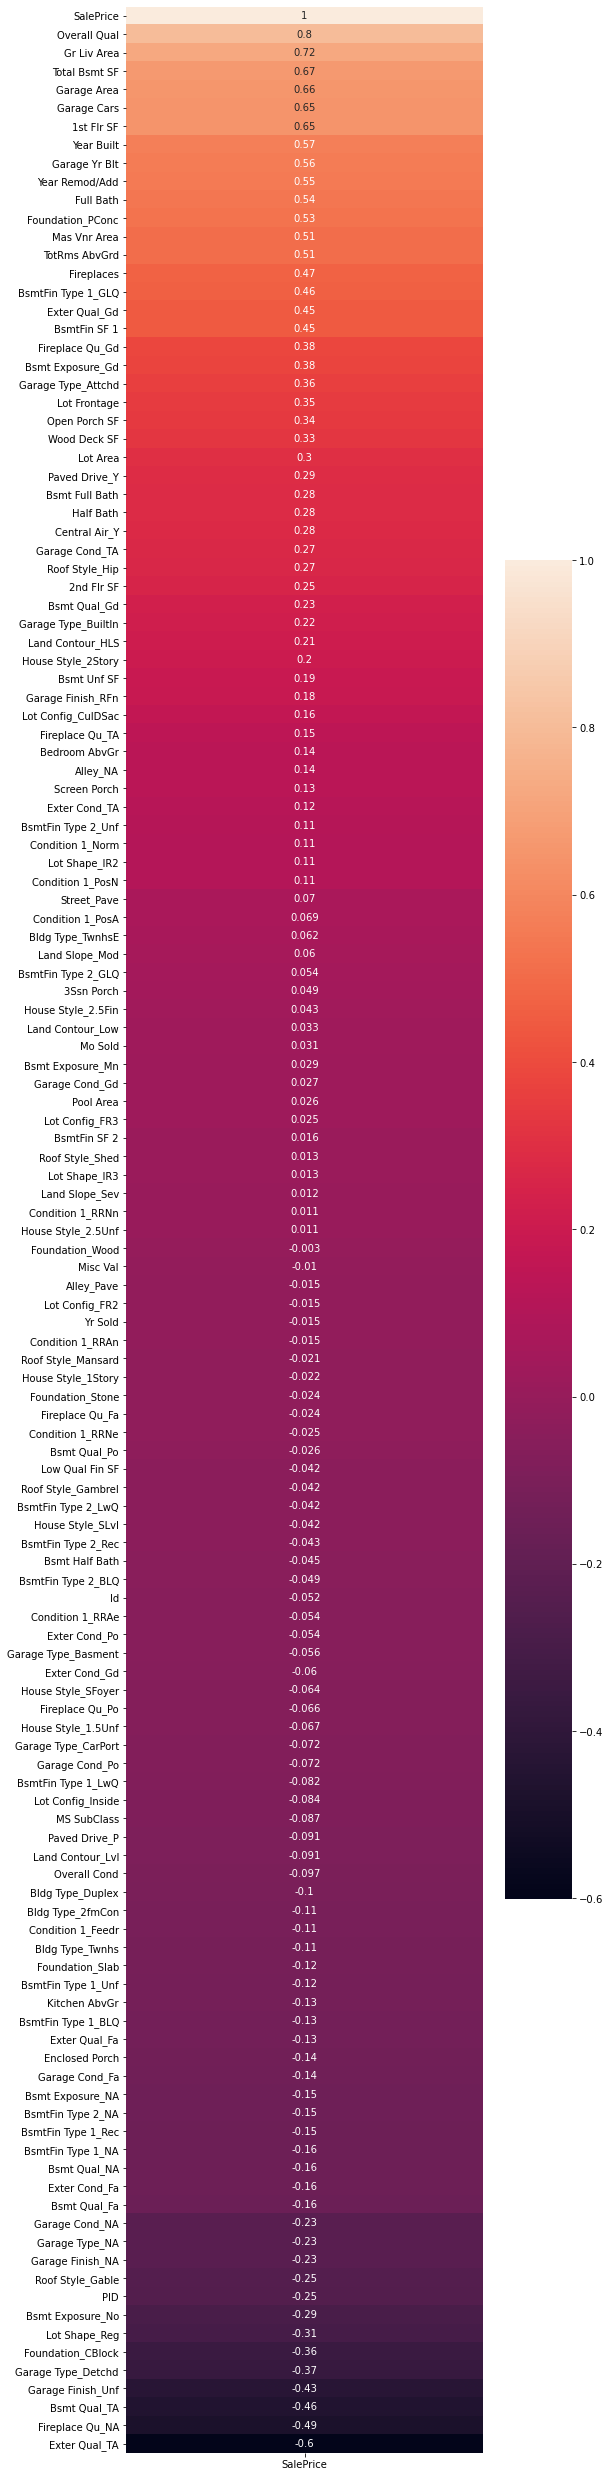

In [305]:
# Use heatmap to show the correlation between each column and sale price
plt.figure(figsize = (8,45))
sns.heatmap(model3_train.corr()[['SalePrice']].sort_values(by = 'SalePrice',ascending = False), annot = True)

In [306]:
# Sort correlation value from max to min
saleprice_corr = model3_train.corr()['SalePrice'].sort_values(ascending = False)
saleprice_corr

SalePrice             1.000000
Overall Qual          0.803118
Gr Liv Area           0.719525
Total Bsmt SF         0.665288
Garage Area           0.655472
                        ...   
Garage Type_Detchd   -0.369468
Garage Finish_Unf    -0.431876
Bsmt Qual_TA         -0.457930
Fireplace Qu_NA      -0.485387
Exter Qual_TA        -0.600993
Name: SalePrice, Length: 133, dtype: float64

In [307]:
# Select features to use in model by select only column that have correlation >0.35 or <-0.35
features = [col for col,value in saleprice_corr.iteritems() if value >0.35 or value < -0.35]
features

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Foundation_PConc',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin Type 1_GLQ',
 'Exter Qual_Gd',
 'BsmtFin SF 1',
 'Fireplace Qu_Gd',
 'Bsmt Exposure_Gd',
 'Garage Type_Attchd',
 'Foundation_CBlock',
 'Garage Type_Detchd',
 'Garage Finish_Unf',
 'Bsmt Qual_TA',
 'Fireplace Qu_NA',
 'Exter Qual_TA']

In [308]:
# Remove sale price from features list because this is our target
features.remove('SalePrice')

In [309]:
# Number of features that used in this model
len(features)

26

In [310]:
# Assign feature and target to X and y
X = model3_train[features]
y = model3_train['SalePrice']

In [311]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

### Linear Regression

In [312]:
lr =linear(X_scaled,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.8790741099747347
Val R2     : 0.8757665672394953
Train RMSE : 27570.816694614787
Val RMSE   : 27850.00387275538


### Ridge Regression

In [313]:
ridge = ridge_reg(X_scaled,y)

--- EVALUATION: Ridge Regression----

Train R2   : 0.8790267507211047
Val R2     : 0.8758044040690759
Train RMSE : 27576.215064978118
Val RMSE   : 27846.931370439277


### Lasso Regression

In [314]:
lasso = lasso_reg(X_scaled,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.8785952856507099
Val R2     : 0.8761631336734824
Train RMSE : 27625.348172791415
Val RMSE   : 27808.633696797497


### ElasticNet Regression

In [315]:
elas_net = elas_net_reg(X_scaled,y)

--- EVALUATION: ElasticNet Regression----

Train R2   : 0.6517328929686658
Val R2     : 0.6536196282902021
Train RMSE : 46789.26400093903
Val RMSE   : 46579.06459402443


From the model we can see that R2 in train and val are not different, this means that the model is not overfitting yet so I will try to decrease root mean squared error by doing a poly nomial feature to increase the complexity of the model.

In [316]:
poly = PolynomialFeatures(include_bias = False)
X_scaled_poly = poly.fit_transform(X_scaled)

In [317]:
lr =linear(X_scaled_poly,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.9407567118260589
Val R2     : 0.8785274076787506
Train RMSE : 19297.878250969512
Val RMSE   : 27444.438638665608


In [318]:
ridge = ridge_reg(X_scaled_poly,y)

--- EVALUATION: Ridge Regression----

Train R2   : 0.9323461264821192
Val R2     : 0.9018845580528614
Train RMSE : 20622.262855162597
Val RMSE   : 24607.604080624613


In [319]:
lasso = lasso_reg(X_scaled_poly,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.9247816602601325
Val R2     : 0.9094574139814944
Train RMSE : 21744.621685712213
Val RMSE   : 23654.26642693025


In [320]:
elas_net = elas_net_reg(X_scaled_poly,y)

--- EVALUATION: ElasticNet Regression----

Train R2   : 0.7578028252918251
Val R2     : 0.7460706188458228
Train RMSE : 39018.854995918155
Val RMSE   : 39672.4726458345


It seems like lasso has the highest Val R2 and lowest Val RMSE, so I will use lasso to predict sale price in test data.

## Test Data

In [321]:
model3_test = pd.get_dummies(data = model3_test, columns = cat_col, drop_first = True)

In [322]:
X_test = model3_test[features]
X_test_scaled = ss.transform(X_test)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [323]:
mod3_prediction = lasso.predict(X_test_scaled_poly)

In [324]:
model3_df = test_df[['Id']]
model3_df['SalePrice'] = mod3_prediction

<ipython-input-324-addb2892aa7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model3_df['SalePrice'] = mod3_prediction


In [325]:
model3_df.to_csv('datasets/model/model_3.csv', index = False)

# Model 4

In [326]:
# make a copy of train data and test data
model4_train = train_df.copy()
model4_test = test_df.copy()

In [327]:
# Find numerical and categorical column
num_col = find_col_type(model4_train, 'Numerical')
cat_col = find_col_type(model4_train, 'Categorical')

In [328]:
saleprice_corr = model4_train[num_col].corr()['SalePrice'].sort_values(ascending = False)
saleprice_corr

SalePrice          1.000000
Overall Qual       0.803118
Gr Liv Area        0.719525
Total Bsmt SF      0.665288
Garage Area        0.655472
Garage Cars        0.648494
1st Flr SF         0.648030
Year Built         0.572273
Garage Yr Blt      0.556644
Year Remod/Add     0.550219
Full Bath          0.537861
Mas Vnr Area       0.511928
TotRms AbvGrd      0.509373
Fireplaces         0.473149
BsmtFin SF 1       0.445874
Lot Frontage       0.348090
Open Porch SF      0.339070
Wood Deck SF       0.327810
Lot Area           0.303297
Bsmt Full Bath     0.284942
Half Bath          0.283832
2nd Flr SF         0.249712
Bsmt Unf SF        0.190174
Bedroom AbvGr      0.136811
Screen Porch       0.134707
3Ssn Porch         0.048772
Mo Sold            0.030664
Pool Area          0.025833
BsmtFin SF 2       0.016438
Misc Val          -0.010324
Yr Sold           -0.014944
Low Qual Fin SF   -0.041636
Bsmt Half Bath    -0.045415
Id                -0.051813
MS SubClass       -0.087166
Overall Cond      -0

In [329]:
# Select numerical columns that have correlation > 0.4
num_col_use = [col for col,value in model4_train[num_col].corr()['SalePrice'].sort_values(ascending = False).iteritems() if value>0.4 ]
num_col_use

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1']

In [330]:
# Remove sale price
num_col_use.remove('SalePrice')

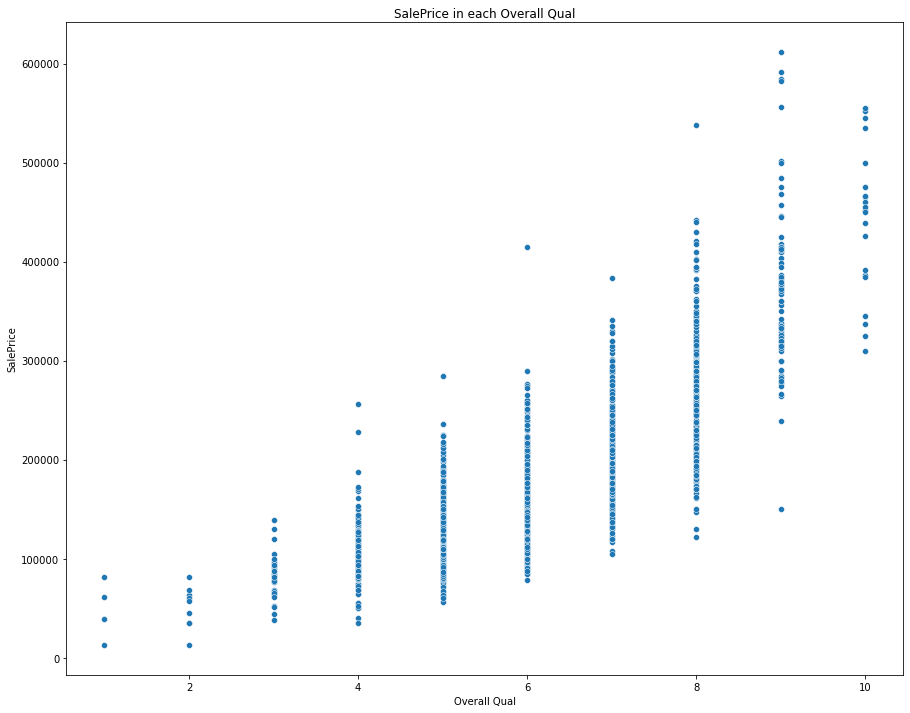

<Figure size 432x288 with 0 Axes>

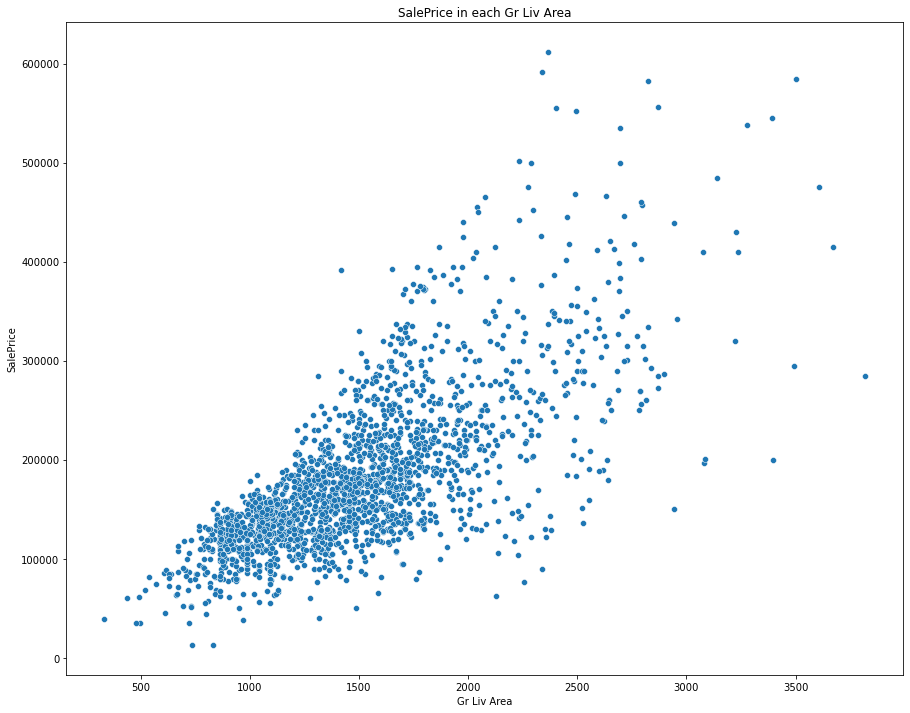

<Figure size 432x288 with 0 Axes>

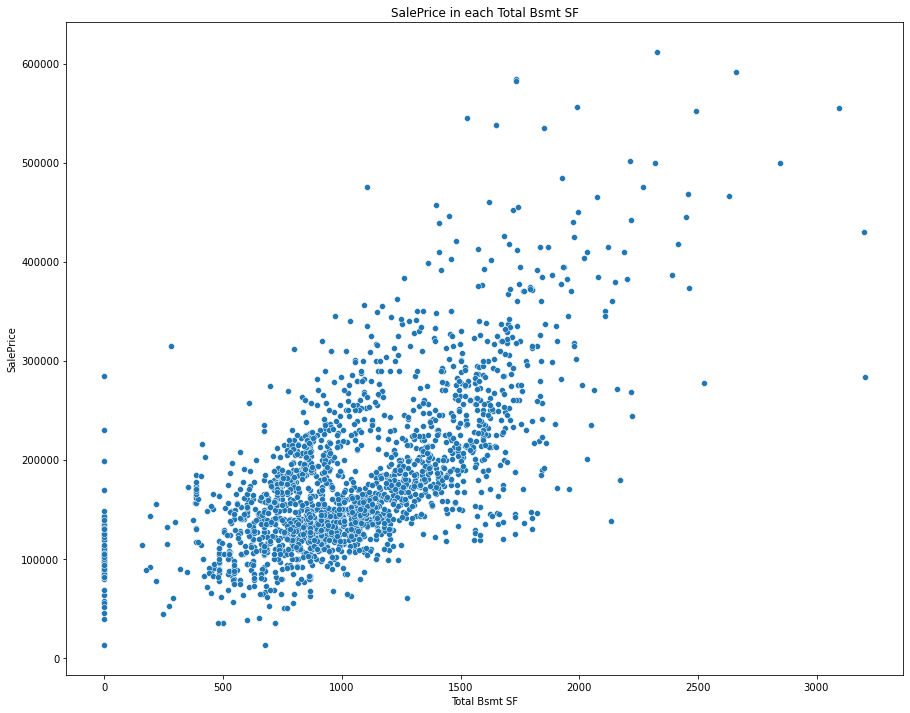

<Figure size 432x288 with 0 Axes>

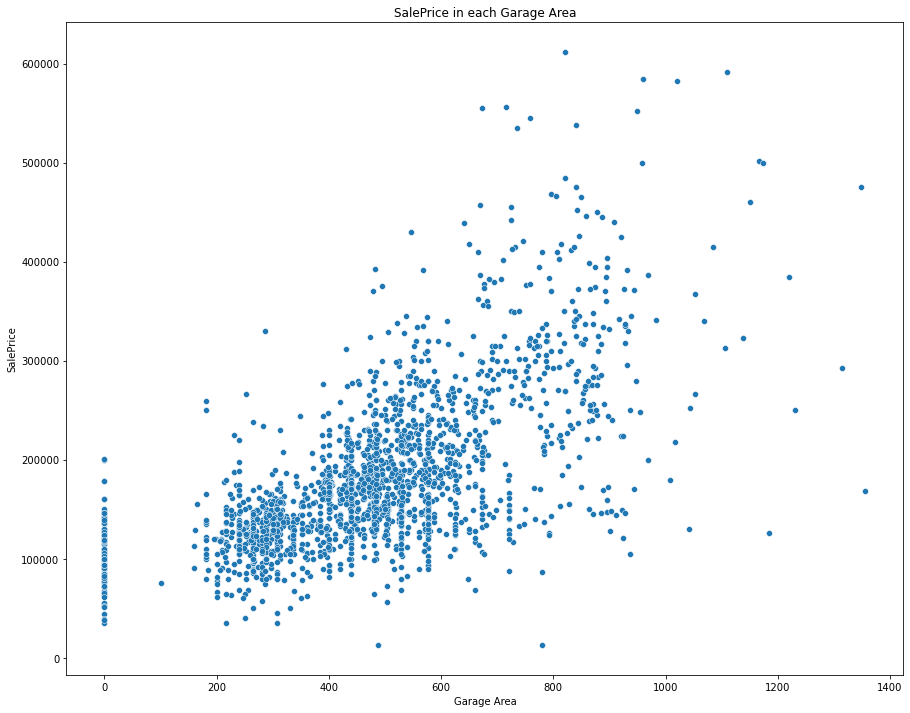

<Figure size 432x288 with 0 Axes>

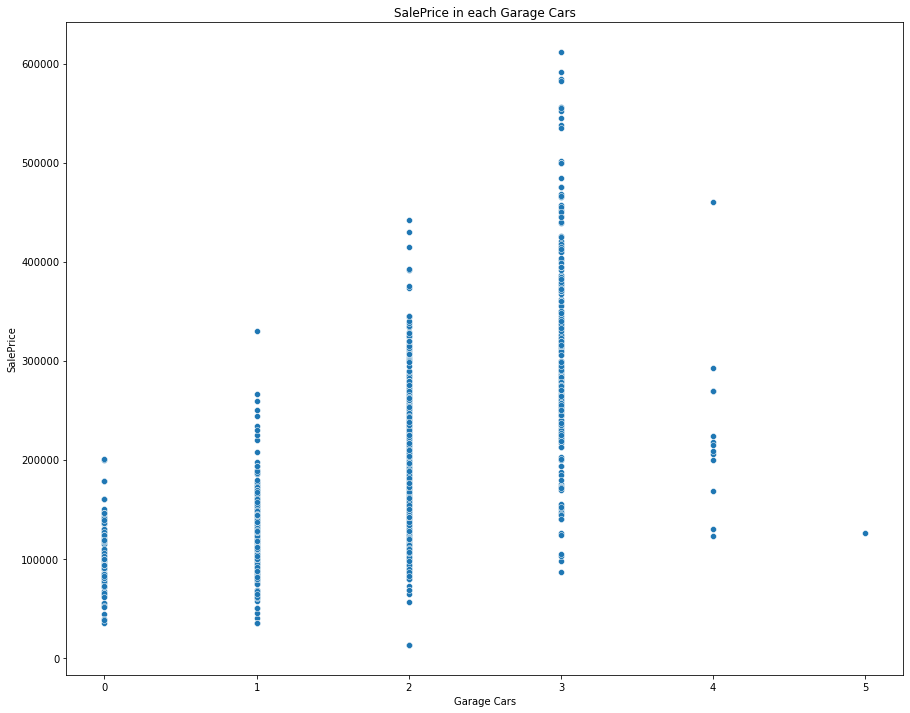

<Figure size 432x288 with 0 Axes>

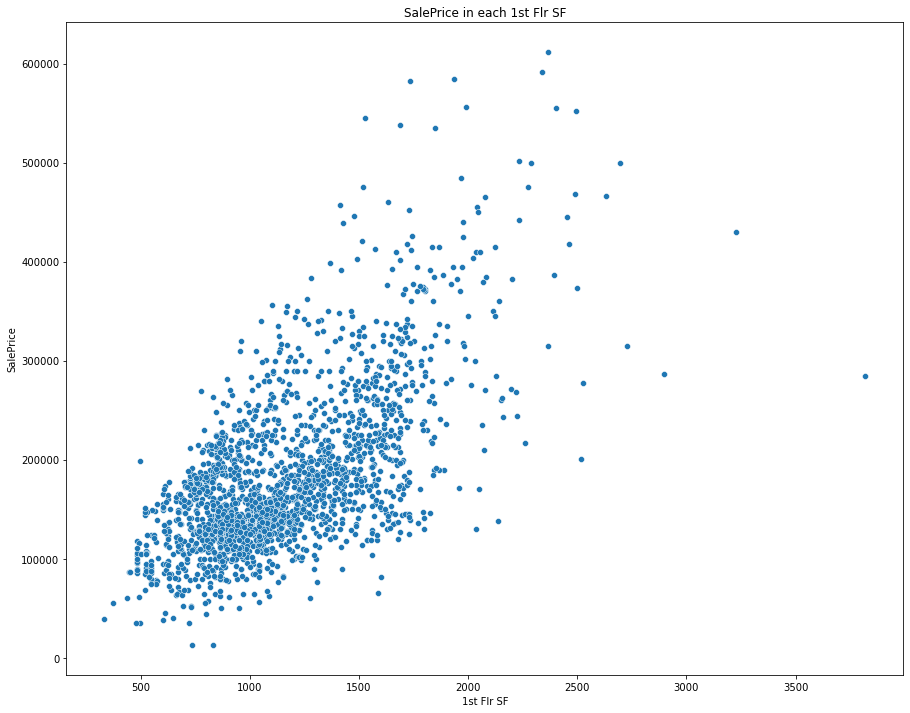

<Figure size 432x288 with 0 Axes>

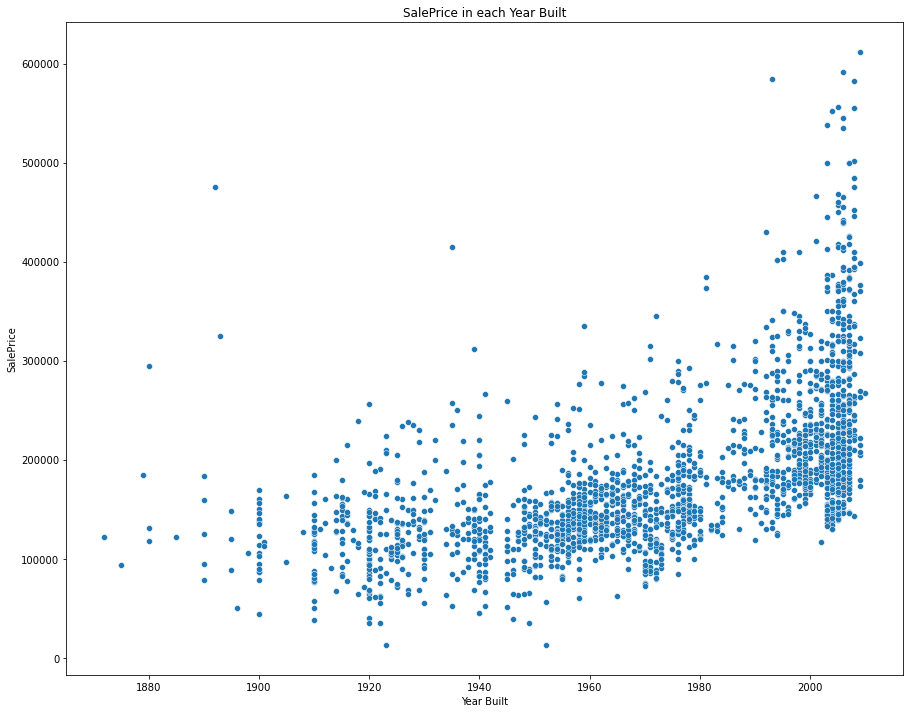

<Figure size 432x288 with 0 Axes>

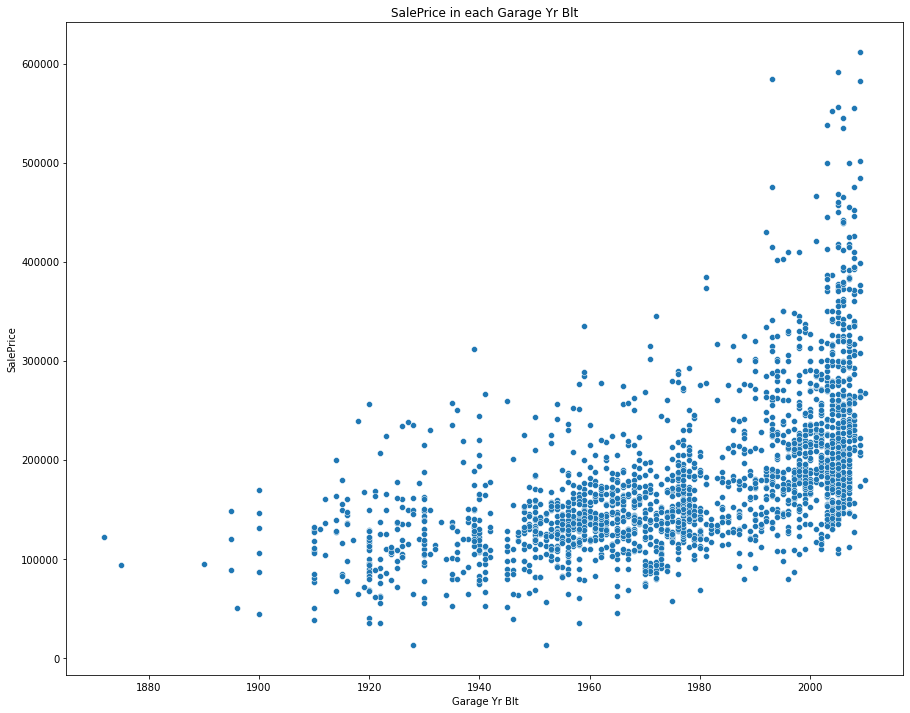

<Figure size 432x288 with 0 Axes>

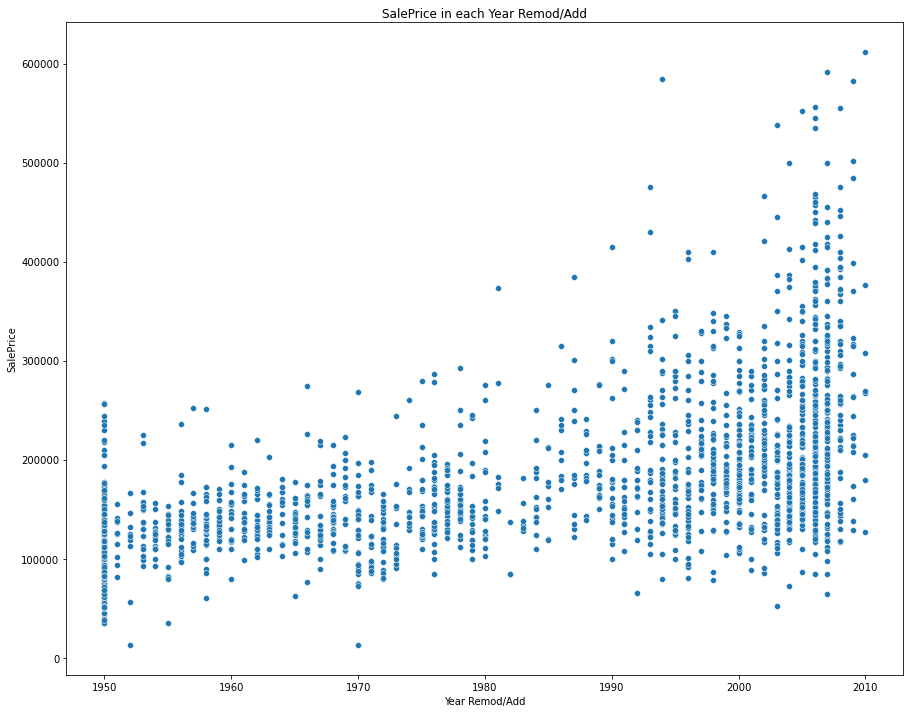

<Figure size 432x288 with 0 Axes>

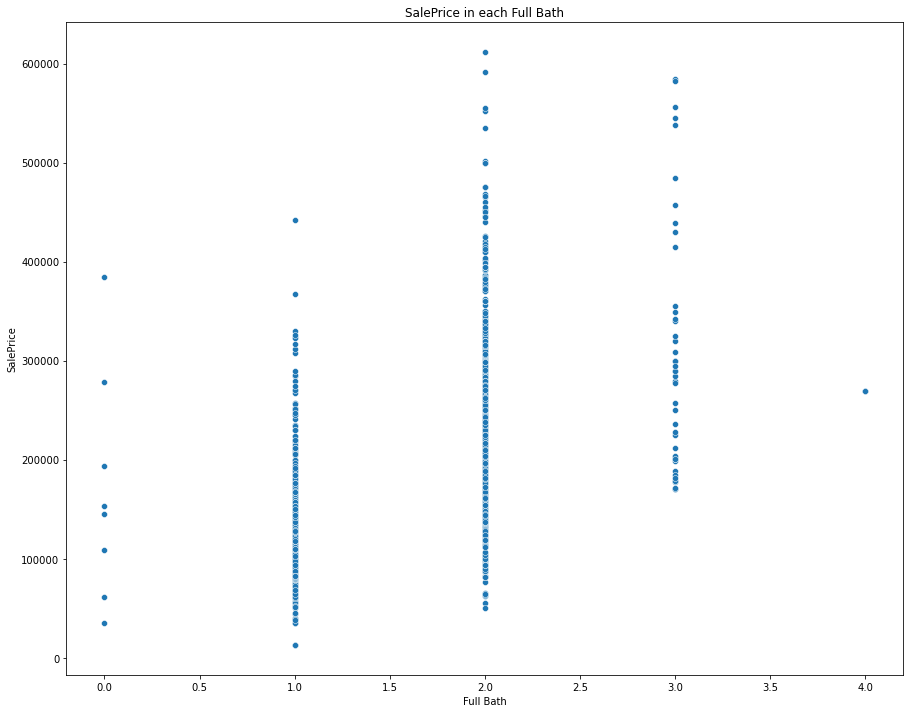

<Figure size 432x288 with 0 Axes>

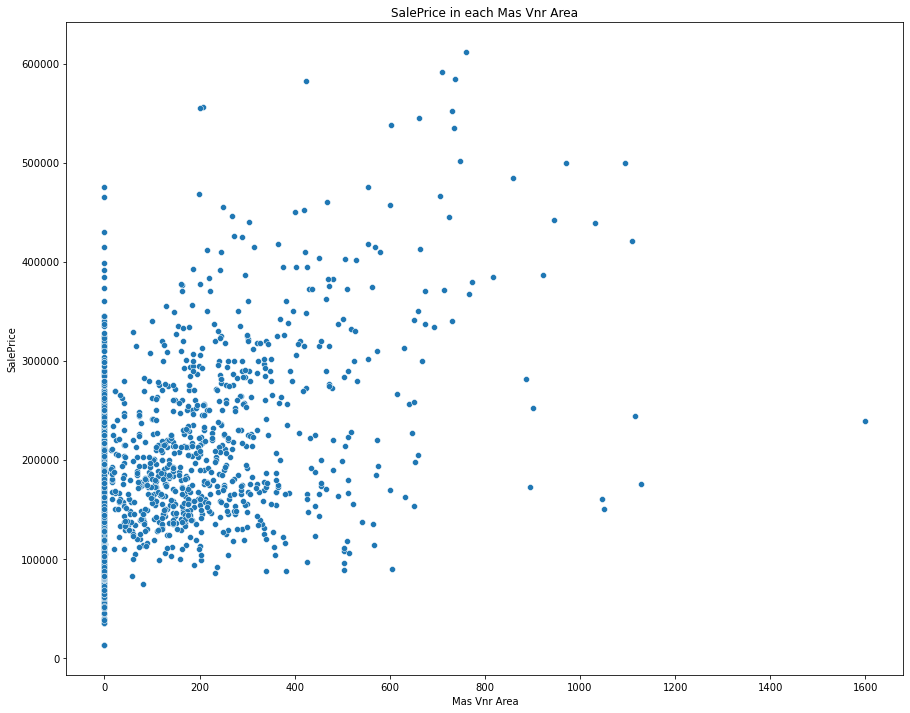

<Figure size 432x288 with 0 Axes>

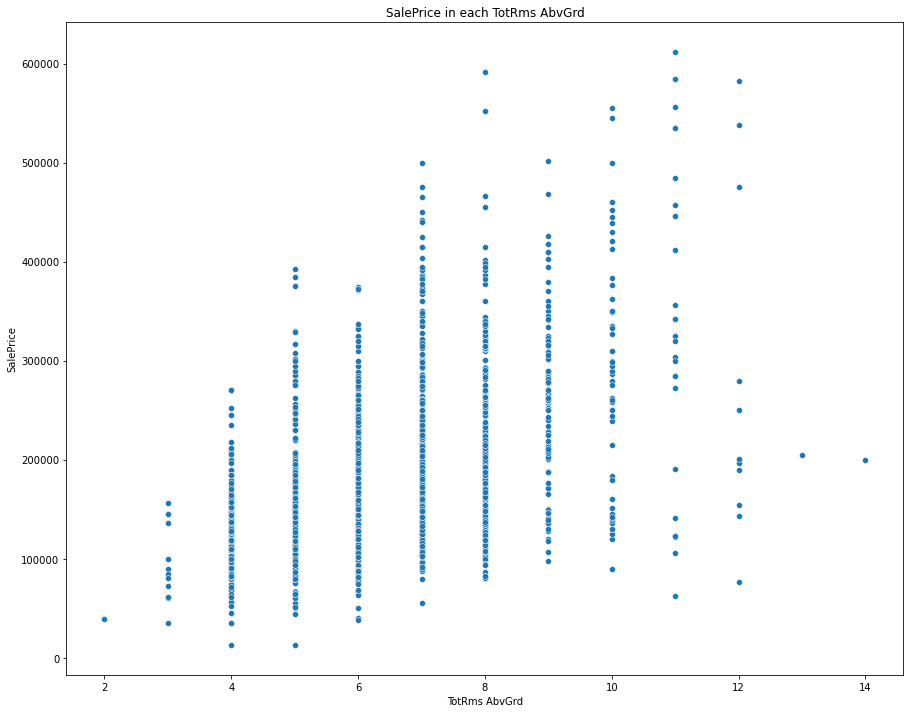

<Figure size 432x288 with 0 Axes>

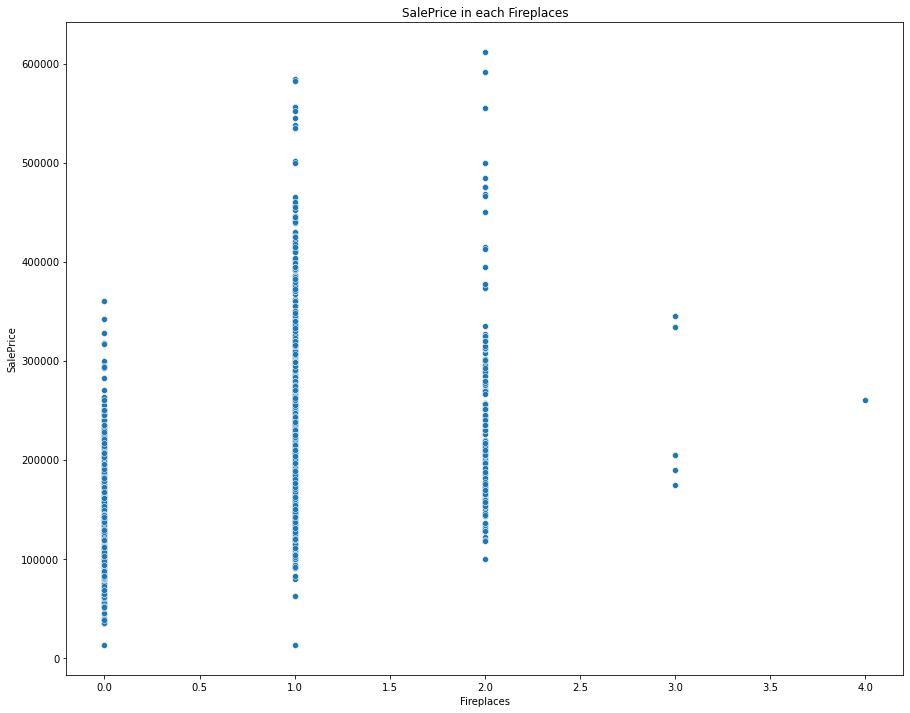

<Figure size 432x288 with 0 Axes>

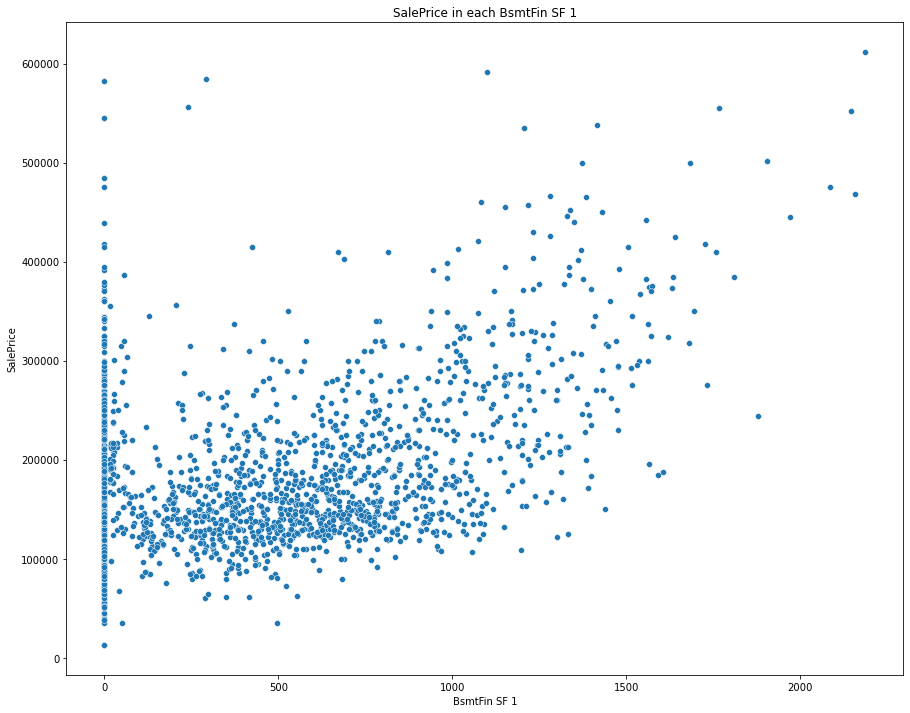

<Figure size 432x288 with 0 Axes>

In [331]:
num_scatterplot(model4_train, list_feature = num_col_use )

In [332]:
# After looking at scatterplot I try to change some numeriacal column to obgject type
model4_train[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']] =  model4_train[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']].astype('object')
model4_test[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']] =  model4_test[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']].astype('object')

In [333]:
# After check the unique value in train and test data forund that only Full Bath has the same unique in train and test
check_unique(model4_train,model4_test,['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces'])

['Overall Qual', 'Garage Cars', 'TotRms AbvGrd', 'Fireplaces']

In [334]:
# make a copy of train data and test data again
model4_train = train_df.copy()
model4_test = test_df.copy()

In [335]:
# Change type only full bath column
model4_train['Full Bath'] =  model4_train['Full Bath'].astype('object')

In [336]:
model4_train['Full Bath'].dtypes

dtype('O')

In [337]:
# Find numerical and categorical column
num_col = find_col_type(model4_train, 'Numerical')
cat_col = find_col_type(model4_train, 'Categorical')

In [338]:
# Get dummies for categorical columns
model4_train = pd.get_dummies(data =model4_train, columns = cat_col, drop_first = True)

<AxesSubplot:>

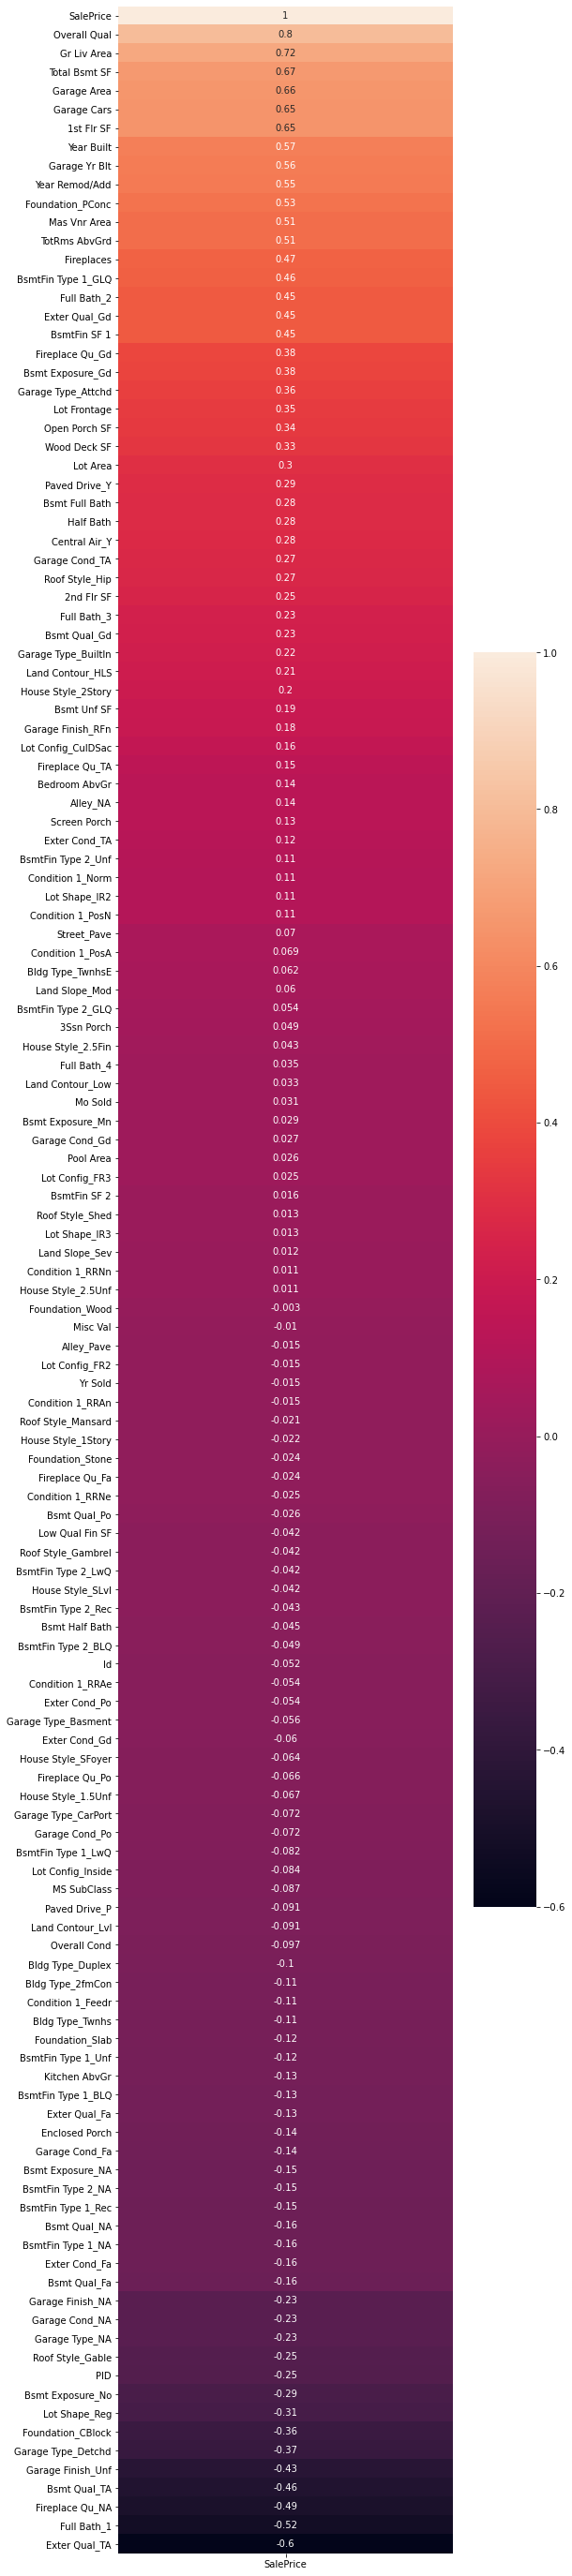

In [339]:
# Use heatmap to show the correlation between each column and sale price
plt.figure(figsize = (8,50))
sns.heatmap(model4_train.corr()[['SalePrice']].sort_values(by = 'SalePrice',ascending = False), annot = True)

In [340]:
saleprice_corr = model4_train.corr()['SalePrice'].sort_values(ascending = False)
saleprice_corr

SalePrice            1.000000
Overall Qual         0.803118
Gr Liv Area          0.719525
Total Bsmt SF        0.665288
Garage Area          0.655472
                       ...   
Garage Finish_Unf   -0.431876
Bsmt Qual_TA        -0.457930
Fireplace Qu_NA     -0.485387
Full Bath_1         -0.519898
Exter Qual_TA       -0.600993
Name: SalePrice, Length: 136, dtype: float64

In [341]:
# Select features to use in model by select only column that have correlation >0.35 or <-0.35
features = [col for col,value in saleprice_corr.iteritems() if value >0.35 or value < -0.35]
features

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Foundation_PConc',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin Type 1_GLQ',
 'Full Bath_2',
 'Exter Qual_Gd',
 'BsmtFin SF 1',
 'Fireplace Qu_Gd',
 'Bsmt Exposure_Gd',
 'Garage Type_Attchd',
 'Foundation_CBlock',
 'Garage Type_Detchd',
 'Garage Finish_Unf',
 'Bsmt Qual_TA',
 'Fireplace Qu_NA',
 'Full Bath_1',
 'Exter Qual_TA']

In [342]:
features.remove('SalePrice')

In [343]:
len(features)

27

In [344]:
X = model4_train[features]
y = model4_train['SalePrice']

In [345]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [346]:
linear(X_scaled,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.8832883607119257
Val R2     : 0.8785599243191733
Train RMSE : 27086.136895944714
Val RMSE   : 27526.298760275786


LinearRegression()

In [347]:
ridge_reg(X_scaled,y)

--- EVALUATION: Ridge Regression----

Train R2   : 0.8832112764158
Val R2     : 0.8787176082011964
Train RMSE : 27095.080182036676
Val RMSE   : 27511.026393420412


Ridge(alpha=12.589254117941675)

In [348]:
lasso_reg(X_scaled,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.8830747525497578
Val R2     : 0.8788271319406242
Train RMSE : 27110.912381254282
Val RMSE   : 27499.923093273177


Lasso(alpha=103.77449378762918)

In [349]:
elas_net_reg(X_scaled,y)

--- EVALUATION: ElasticNet Regression----

Train R2   : 0.6501979511898013
Val R2     : 0.6522918117944012
Train RMSE : 46892.25942540457
Val RMSE   : 46670.94620024938


ElasticNet(alpha=70.7500745806982, l1_ratio=0.9)

In [350]:
# Add some complexity to model by using polynomial features
poly = PolynomialFeatures(include_bias = False)
X_scaled_poly = poly.fit_transform(X_scaled)

In [351]:
linear(X_scaled_poly,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.9456937975601128
Val R2     : 0.8818518497924218
Train RMSE : 18476.287084420313
Val RMSE   : 26993.30922256151


LinearRegression()

In [352]:
ridge_reg(X_scaled_poly, y)

--- EVALUATION: Ridge Regression----

Train R2   : 0.9353295019726949
Val R2     : 0.9061184902331607
Train RMSE : 20162.43996743222
Val RMSE   : 24088.45314779772


Ridge(alpha=199.52623149688807)

In [353]:
# Lasso has the highest R2 and lowest RMSE
lasso = lasso_reg(X_scaled_poly,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.9301012582071123
Val R2     : 0.9115844367831354
Train RMSE : 20961.611315879367
Val RMSE   : 23368.451720933666


In [354]:
elas_net_reg(X_scaled_poly,y)

--- EVALUATION: ElasticNet Regression----

Train R2   : 0.7624352652435946
Val R2     : 0.7507060796378682
Train RMSE : 38643.90188214131
Val RMSE   : 39311.78166071445


ElasticNet(alpha=97.72835496618427, l1_ratio=0.9)

## Test Data

In [355]:
model4_test['Full Bath'] =  model4_test['Full Bath'].astype('object')

In [356]:
# Get dummies for categorical columns
model4_test = pd.get_dummies(data =model4_test, columns = cat_col, drop_first = True)

In [357]:
X_test = model4_test[features]

In [358]:
X_test_scaled = ss.transform(X_test)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [359]:
prediction = lasso.predict(X_test_scaled_poly)

In [360]:
model4_df = test_df[['Id']]
model4_df['SalePrice'] = prediction

<ipython-input-360-0b9bbf1fa1e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model4_df['SalePrice'] = prediction


In [361]:
model4_df.head()

Id      SalePrice
0  2658  128377.588531
1  2718  165421.782177
2  2414  194235.285572
3  1989  121471.684668
4   625  176593.417307

In [362]:
model4_df.to_csv('datasets/model/model_4.csv', index = False)

# Model 5

In [363]:
model5_train = train_df.copy()
model5_test = test_df.copy()

In [364]:
# Find numerical and categorical column
num_col = find_col_type(model5_train, 'Numerical')
cat_col = find_col_type(model5_train, 'Categorical')

<AxesSubplot:>

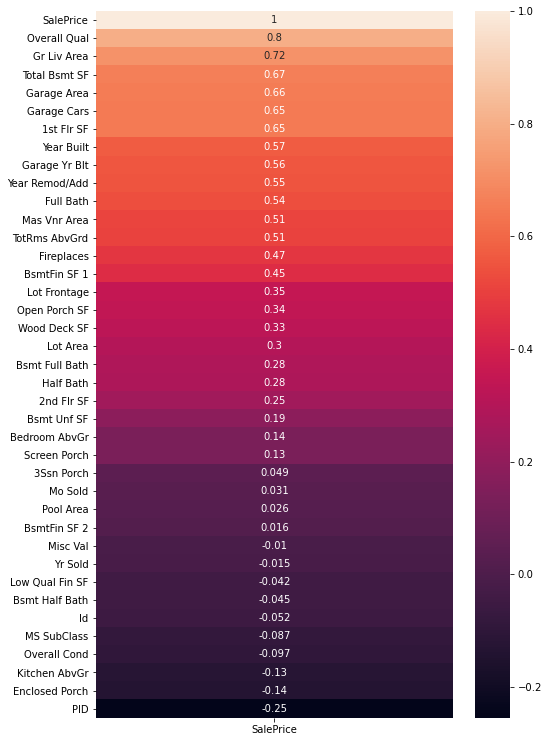

In [365]:
# Use heatmap to show the correlation between each column and sale price
plt.figure(figsize = (8,13))
sns.heatmap(model5_train[num_col].corr()[['SalePrice']].sort_values(by = 'SalePrice',ascending = False), annot = True)

In [366]:
corr_list = model5_train[num_col].corr()['SalePrice'].sort_values(ascending = False)
corr_list

SalePrice          1.000000
Overall Qual       0.803118
Gr Liv Area        0.719525
Total Bsmt SF      0.665288
Garage Area        0.655472
Garage Cars        0.648494
1st Flr SF         0.648030
Year Built         0.572273
Garage Yr Blt      0.556644
Year Remod/Add     0.550219
Full Bath          0.537861
Mas Vnr Area       0.511928
TotRms AbvGrd      0.509373
Fireplaces         0.473149
BsmtFin SF 1       0.445874
Lot Frontage       0.348090
Open Porch SF      0.339070
Wood Deck SF       0.327810
Lot Area           0.303297
Bsmt Full Bath     0.284942
Half Bath          0.283832
2nd Flr SF         0.249712
Bsmt Unf SF        0.190174
Bedroom AbvGr      0.136811
Screen Porch       0.134707
3Ssn Porch         0.048772
Mo Sold            0.030664
Pool Area          0.025833
BsmtFin SF 2       0.016438
Misc Val          -0.010324
Yr Sold           -0.014944
Low Qual Fin SF   -0.041636
Bsmt Half Bath    -0.045415
Id                -0.051813
MS SubClass       -0.087166
Overall Cond      -0

In [367]:
num_features = [col for col,value in corr_list.iteritems() if value > 0.5]

In [368]:
num_features.remove('SalePrice')

In [369]:
num_features

['Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 '1st Flr SF',
 'Year Built',
 'Garage Yr Blt',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [370]:
len(num_features)

12

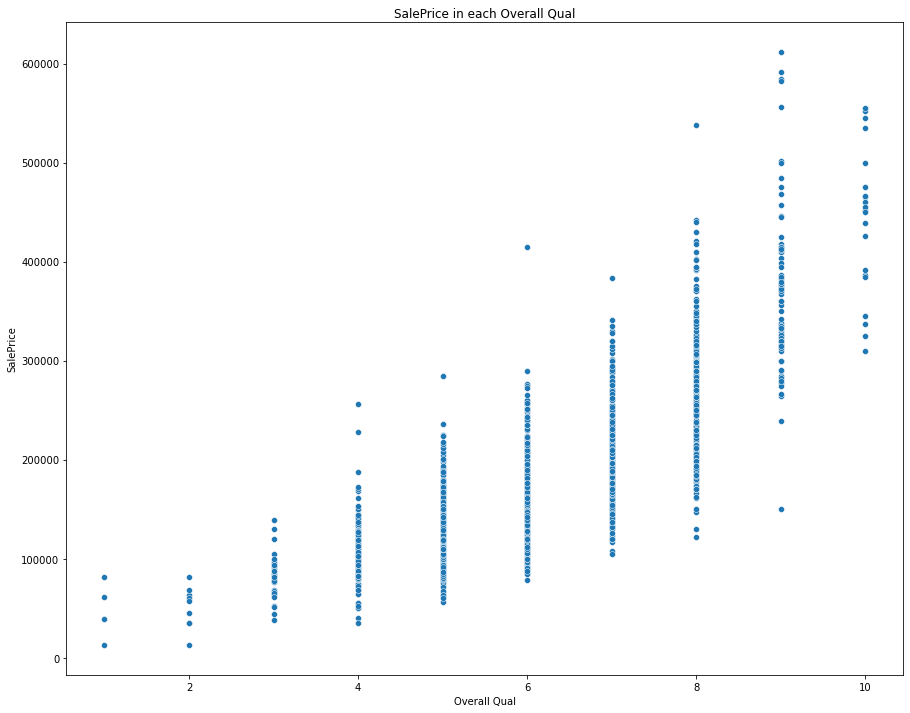

<Figure size 432x288 with 0 Axes>

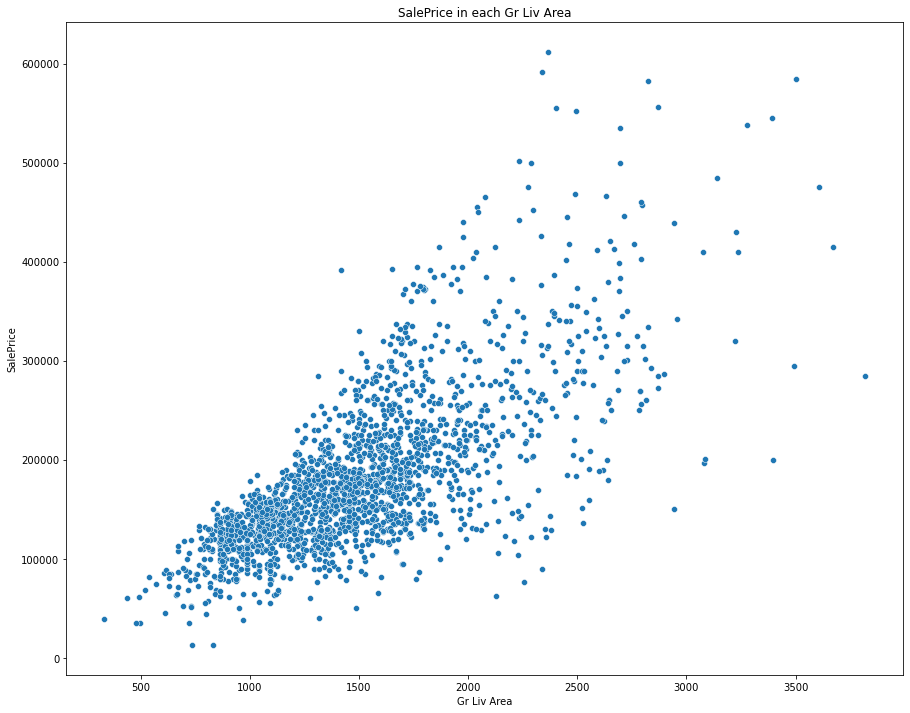

<Figure size 432x288 with 0 Axes>

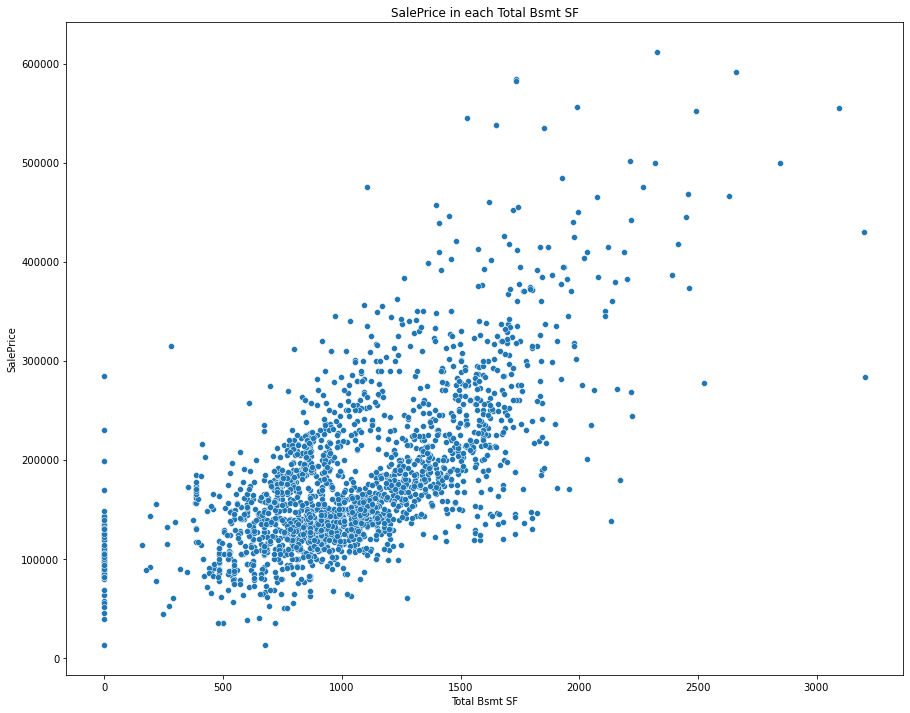

<Figure size 432x288 with 0 Axes>

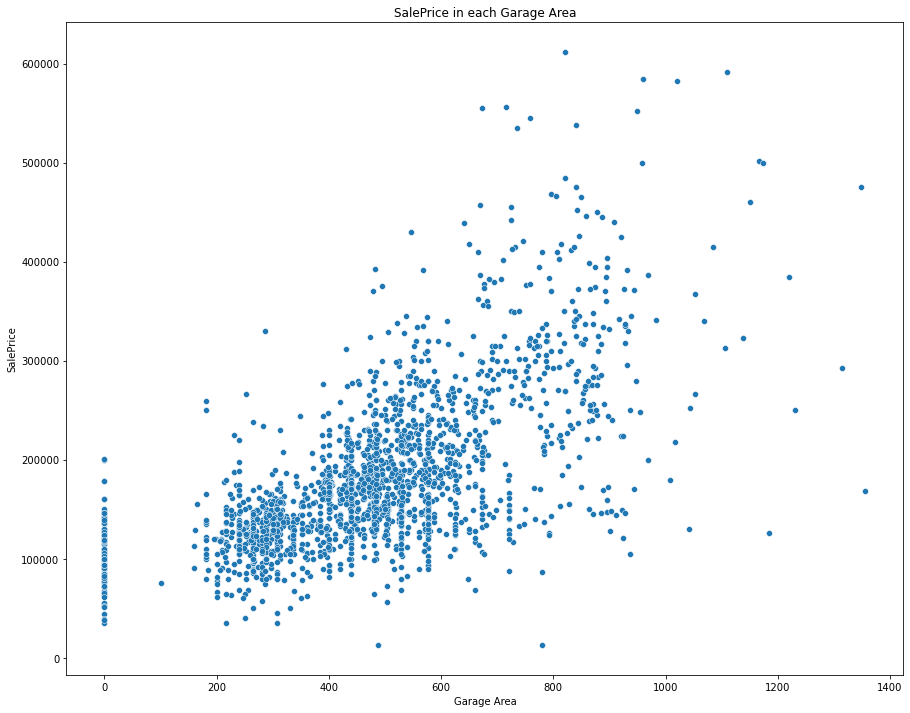

<Figure size 432x288 with 0 Axes>

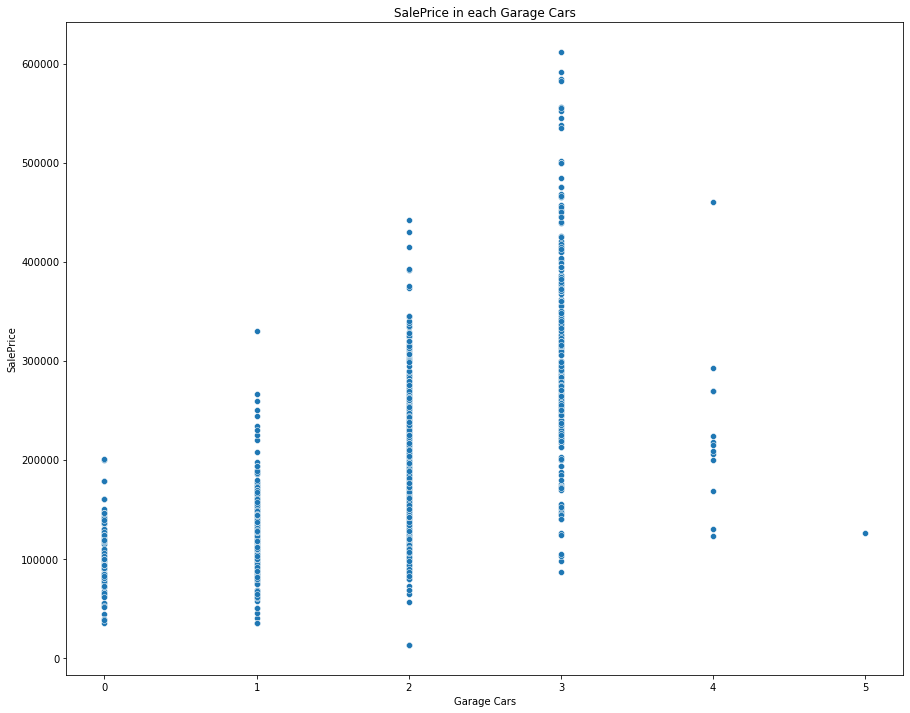

<Figure size 432x288 with 0 Axes>

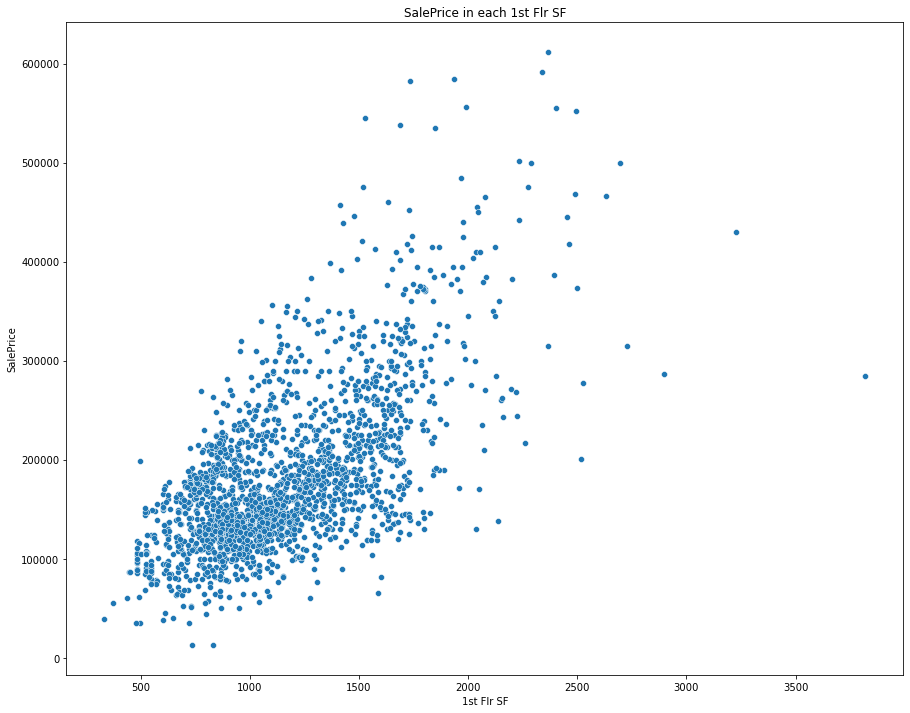

<Figure size 432x288 with 0 Axes>

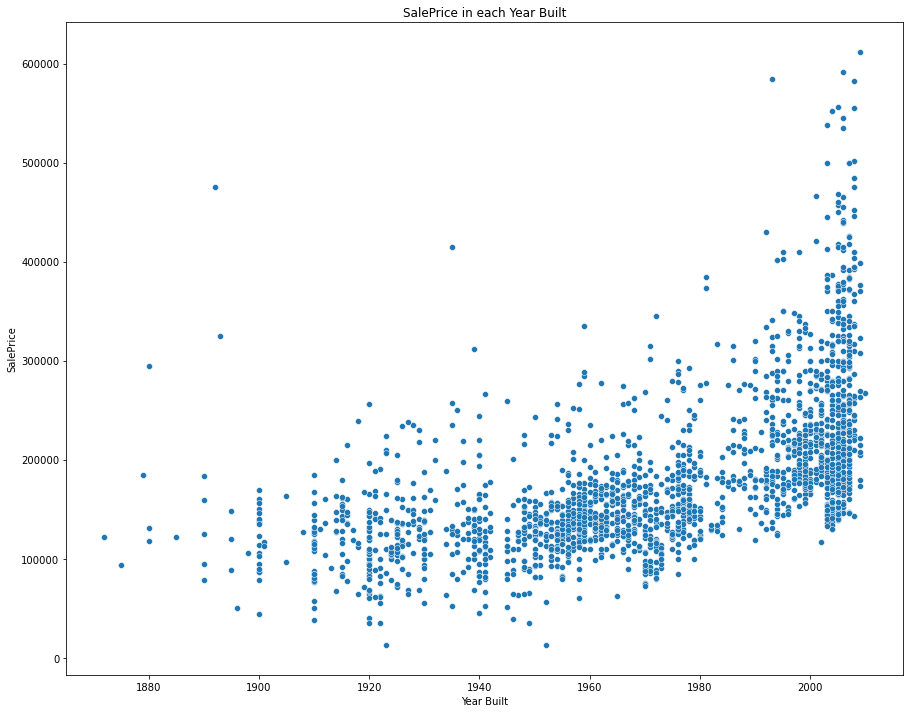

<Figure size 432x288 with 0 Axes>

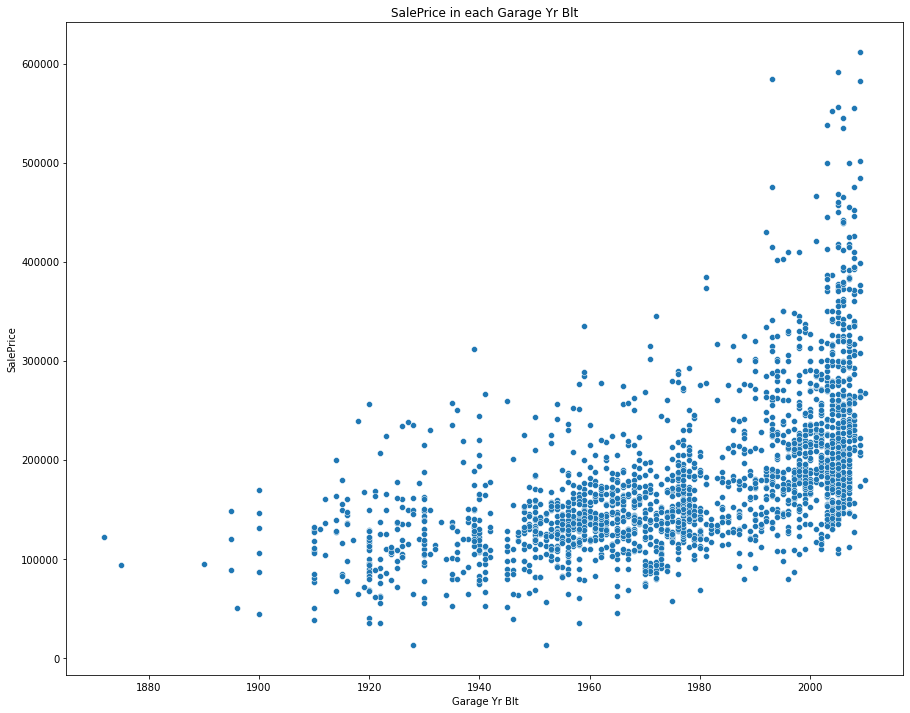

<Figure size 432x288 with 0 Axes>

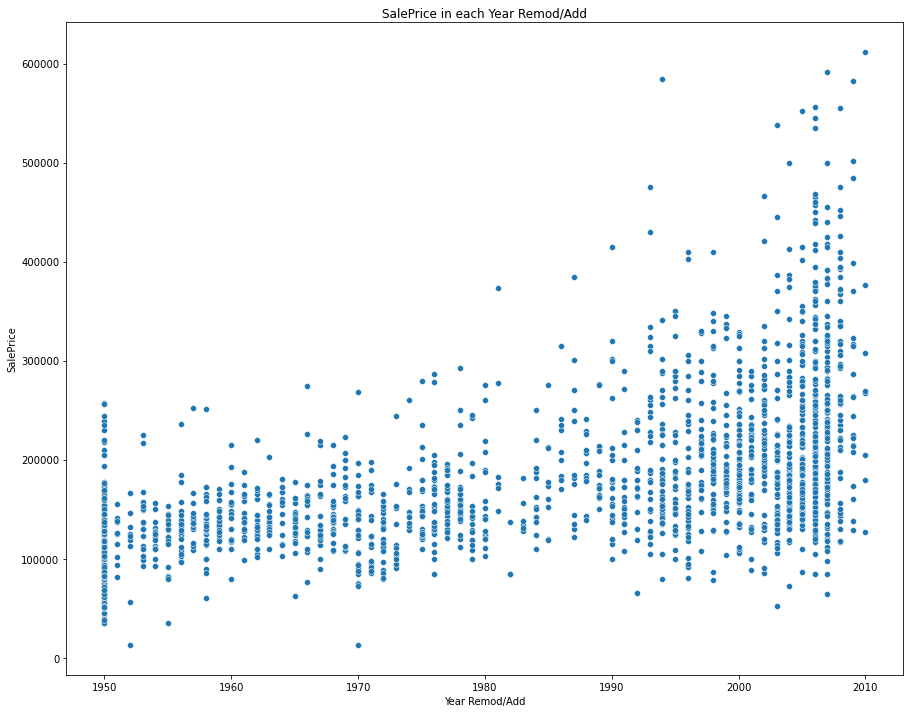

<Figure size 432x288 with 0 Axes>

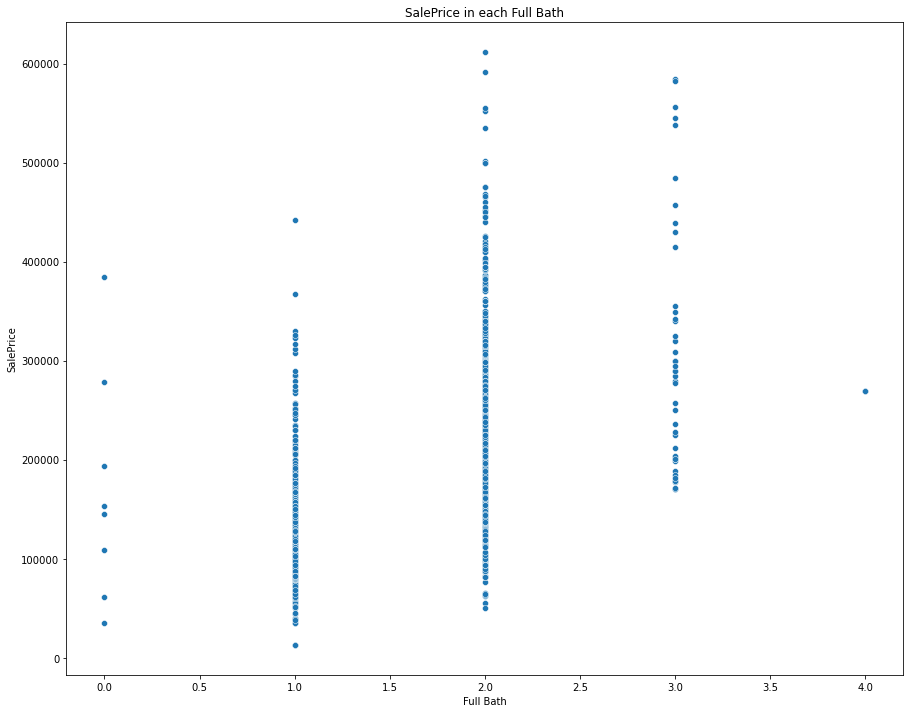

<Figure size 432x288 with 0 Axes>

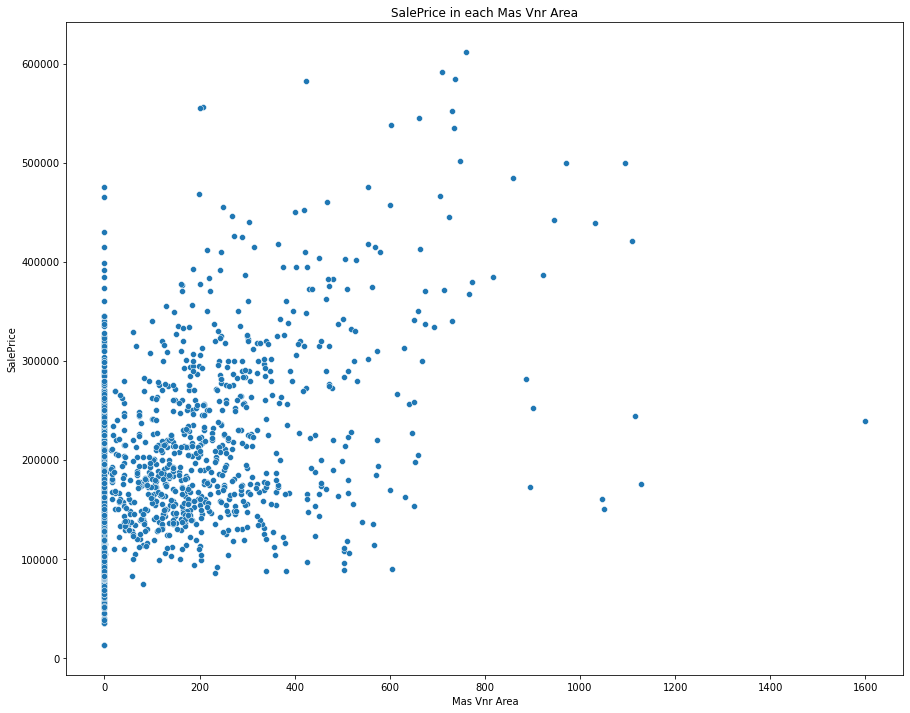

<Figure size 432x288 with 0 Axes>

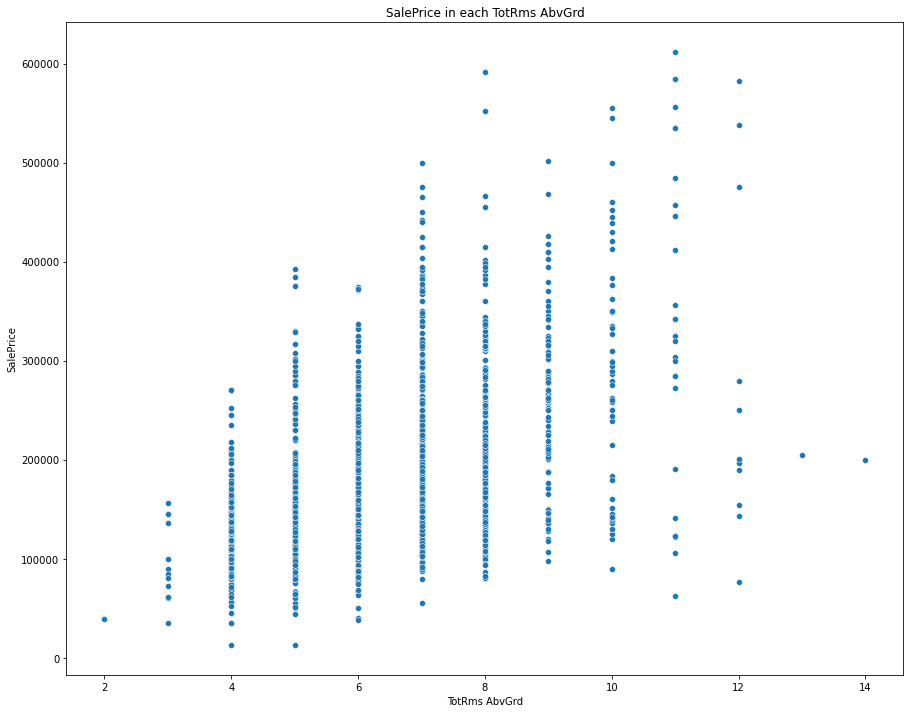

<Figure size 432x288 with 0 Axes>

In [371]:
# Look at the correlation for each variable and sale price
num_scatterplot(model5_train, list_feature = num_features)

In [372]:
# After looking at scatterplot I try to change some numeriacal column to obgject type
model5_train[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']] =  model5_train[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']].astype('object')
model5_test[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']] =  model5_test[['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces']].astype('object')

In [373]:
# After check the unique value in train and test data forund that only Full Bath has the same unique in train and test
check_unique(model5_train,model5_test,['Overall Qual','Garage Cars','Full Bath','TotRms AbvGrd','Fireplaces'])

['Overall Qual', 'Garage Cars', 'TotRms AbvGrd', 'Fireplaces']

In [374]:
# make a copy of train data and test data again
model5_train = train_df.copy()
model5_test = test_df.copy()
# Find numerical and categorical column
num_col = find_col_type(model5_train, 'Numerical')
cat_col = find_col_type(model5_train, 'Categorical')

In [375]:
# Change type only full bath column
model5_train['Full Bath'] =  model5_train['Full Bath'].astype('object')

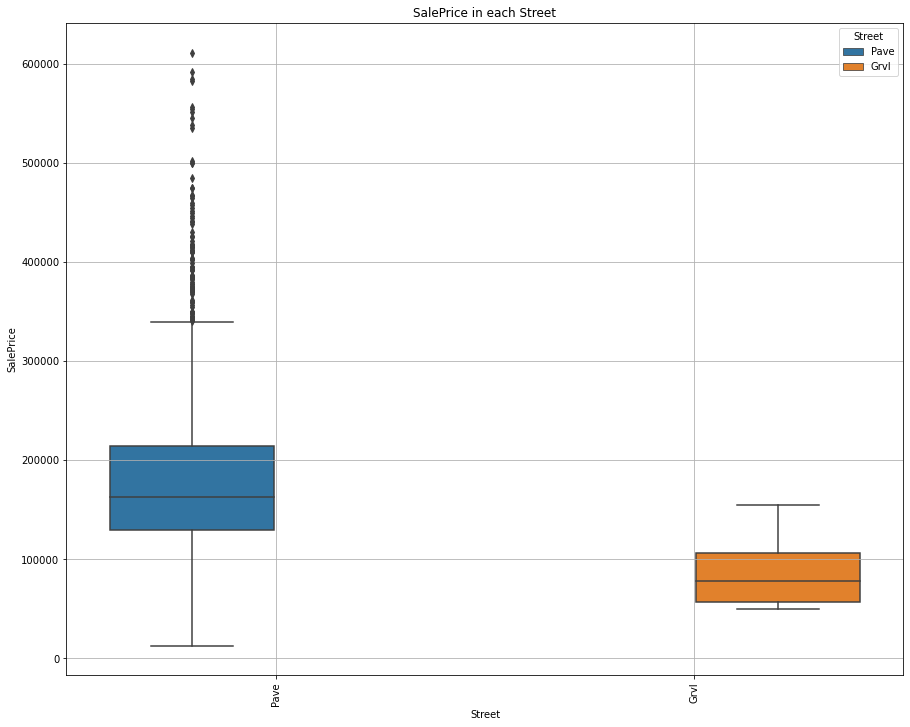

<Figure size 432x288 with 0 Axes>

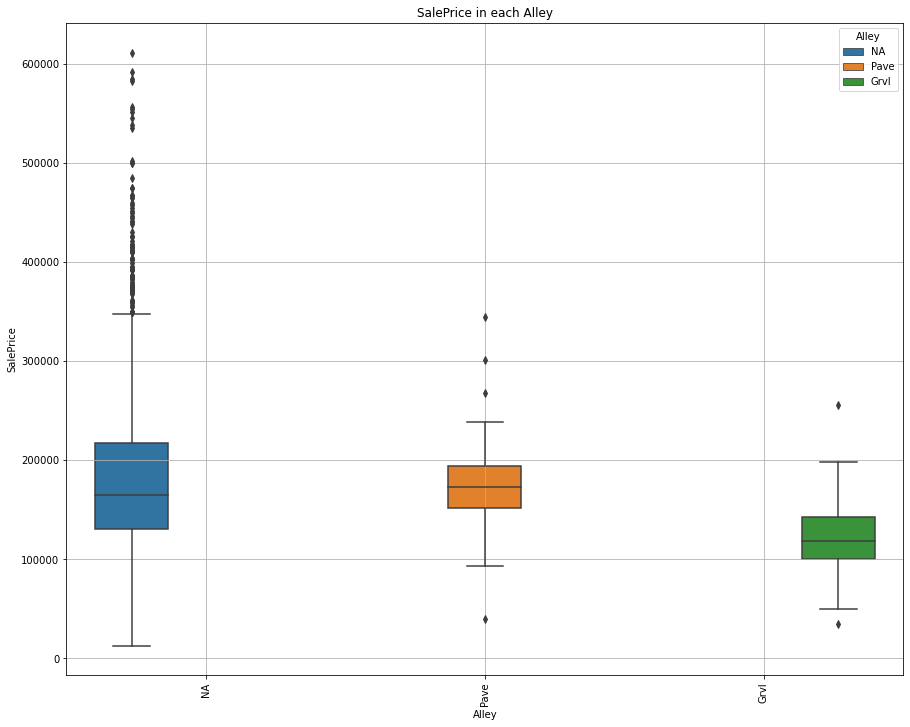

<Figure size 432x288 with 0 Axes>

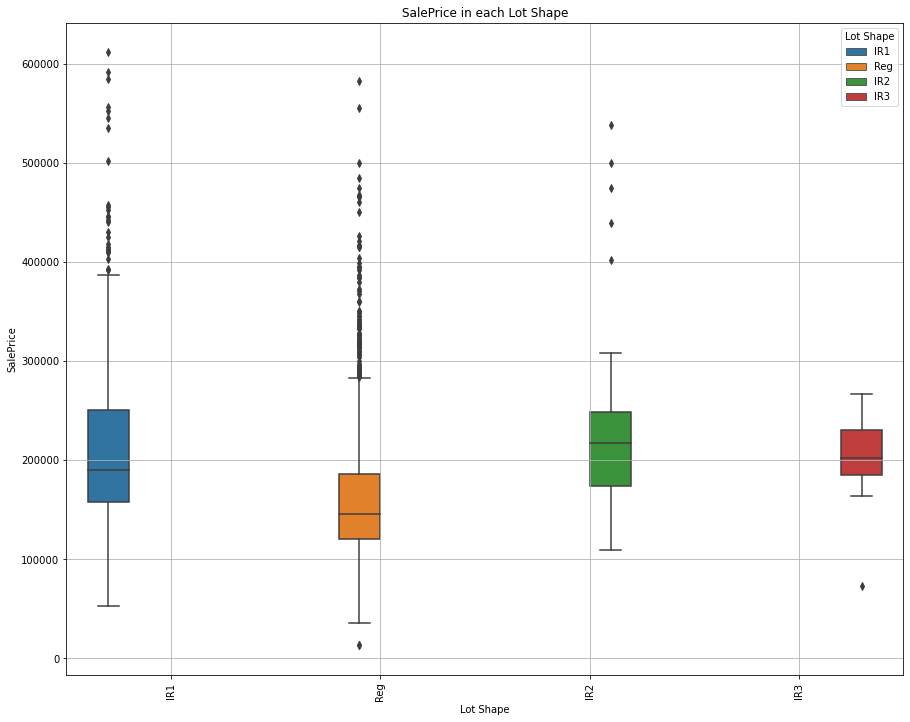

<Figure size 432x288 with 0 Axes>

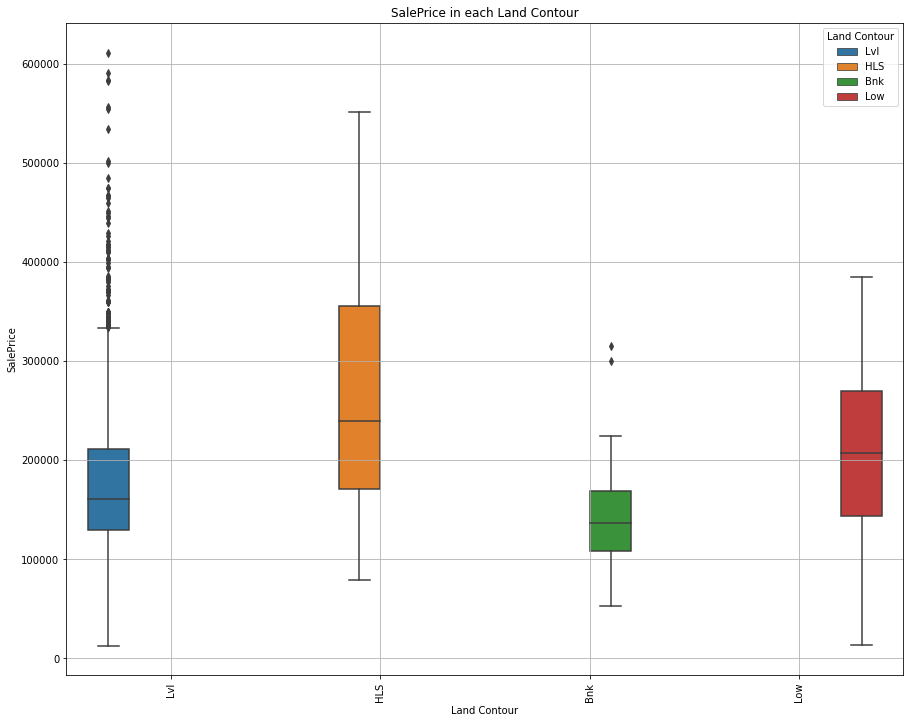

<Figure size 432x288 with 0 Axes>

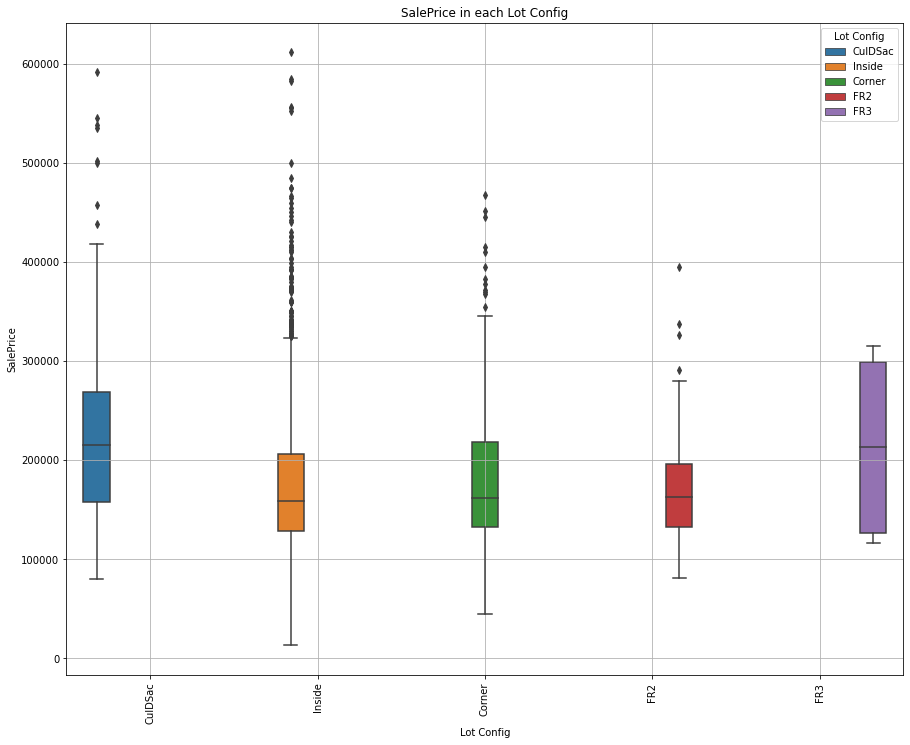

<Figure size 432x288 with 0 Axes>

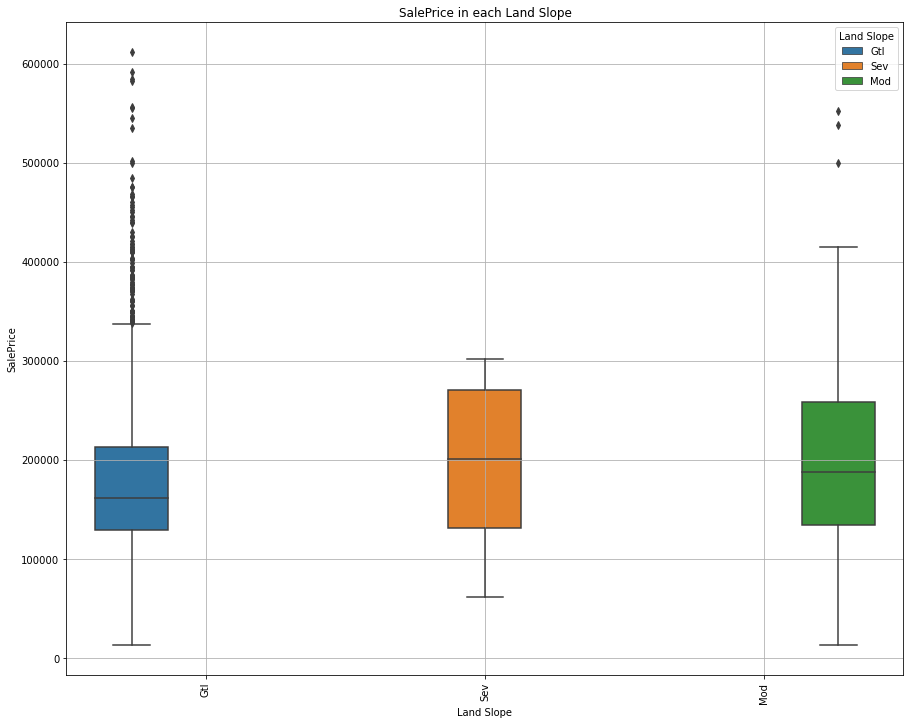

<Figure size 432x288 with 0 Axes>

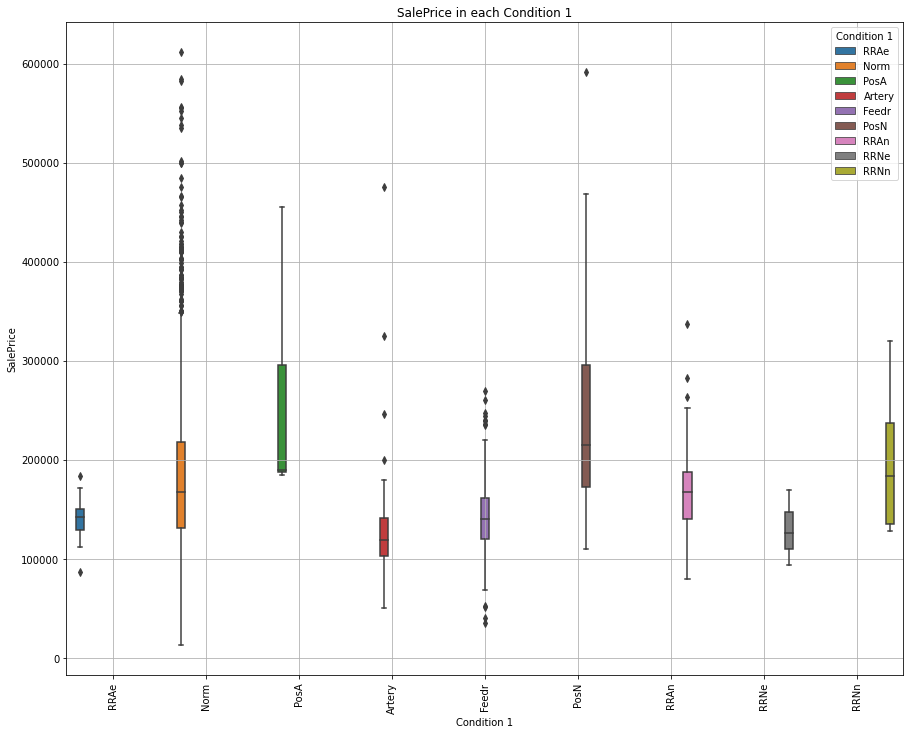

<Figure size 432x288 with 0 Axes>

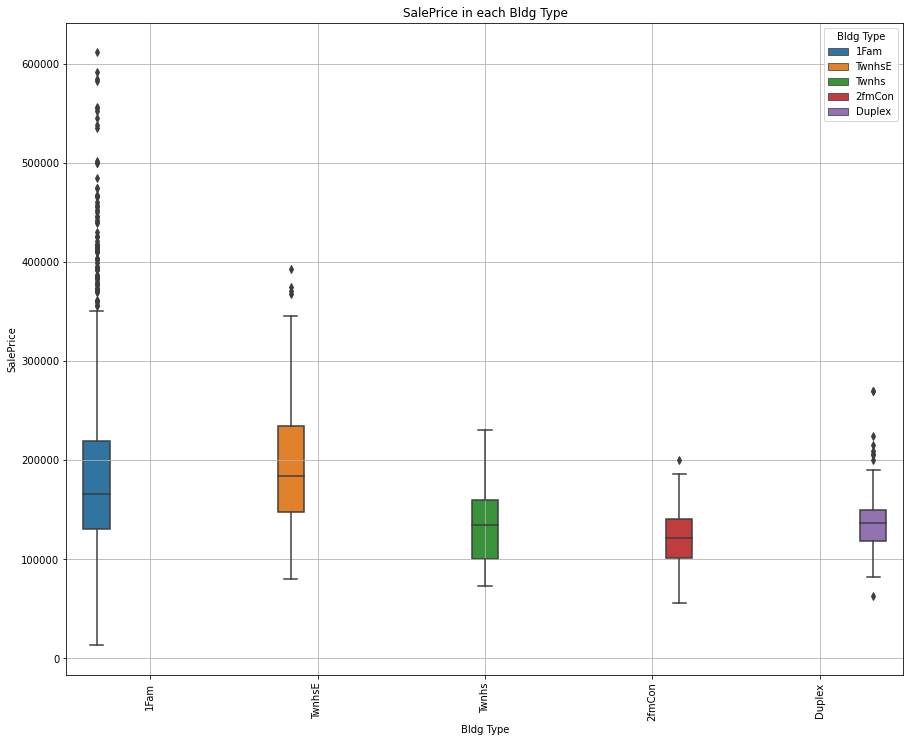

<Figure size 432x288 with 0 Axes>

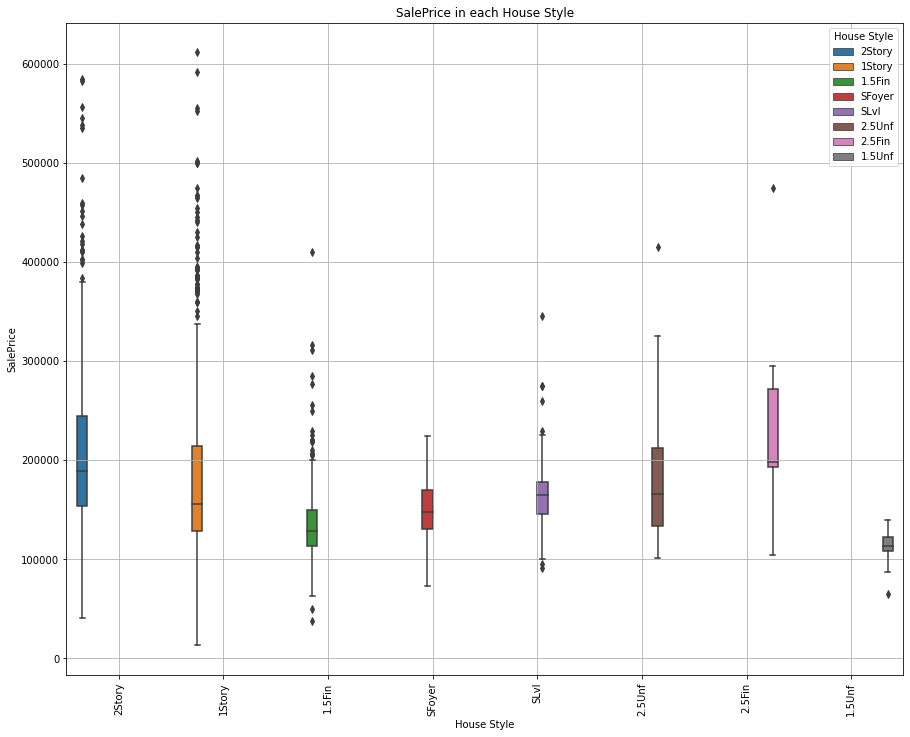

<Figure size 432x288 with 0 Axes>

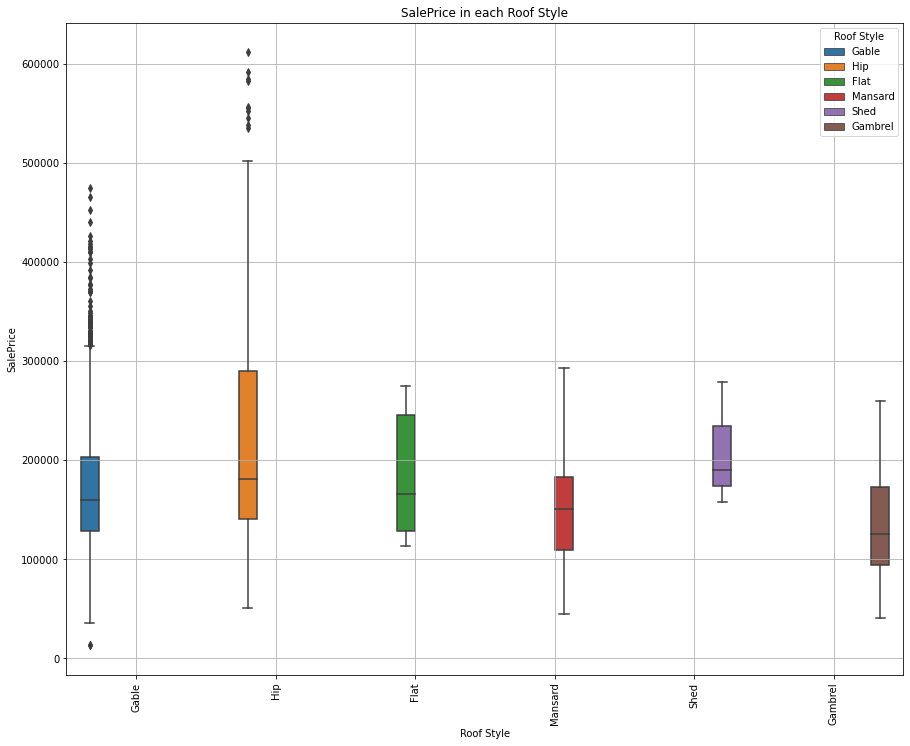

<Figure size 432x288 with 0 Axes>

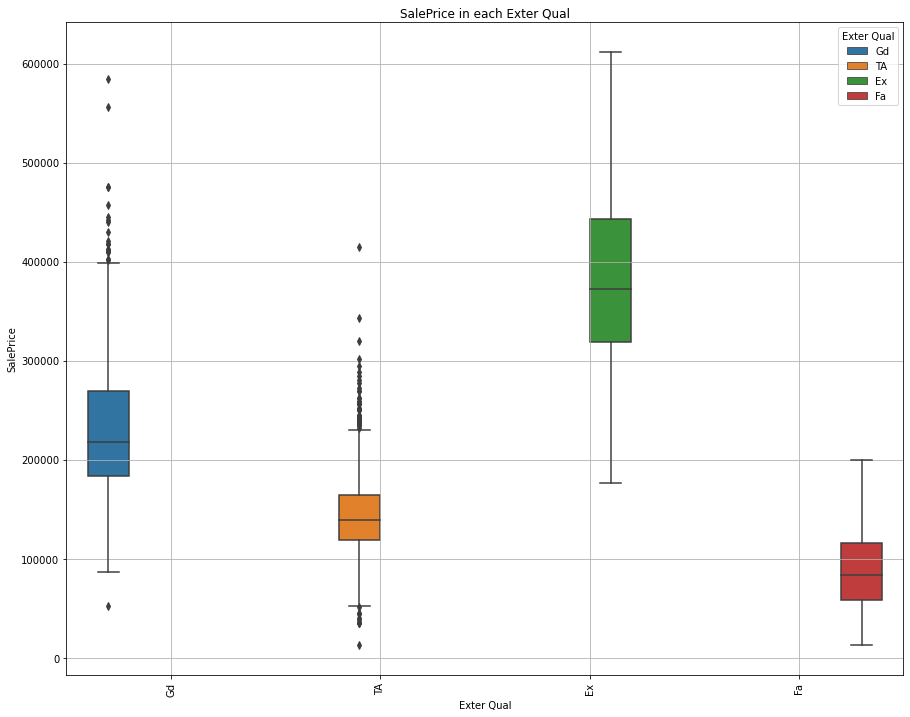

<Figure size 432x288 with 0 Axes>

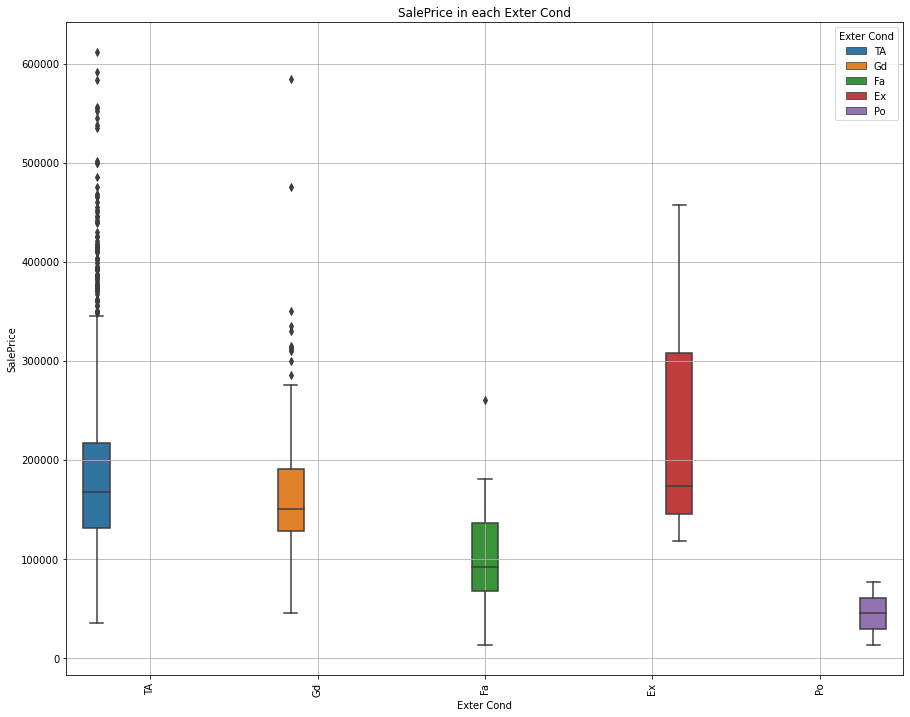

<Figure size 432x288 with 0 Axes>

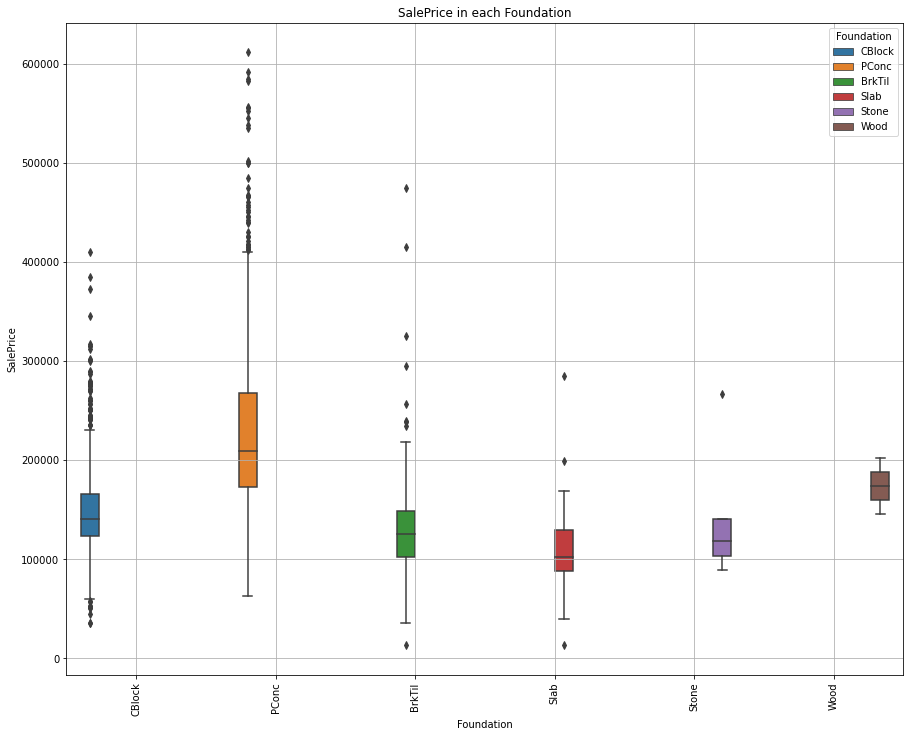

<Figure size 432x288 with 0 Axes>

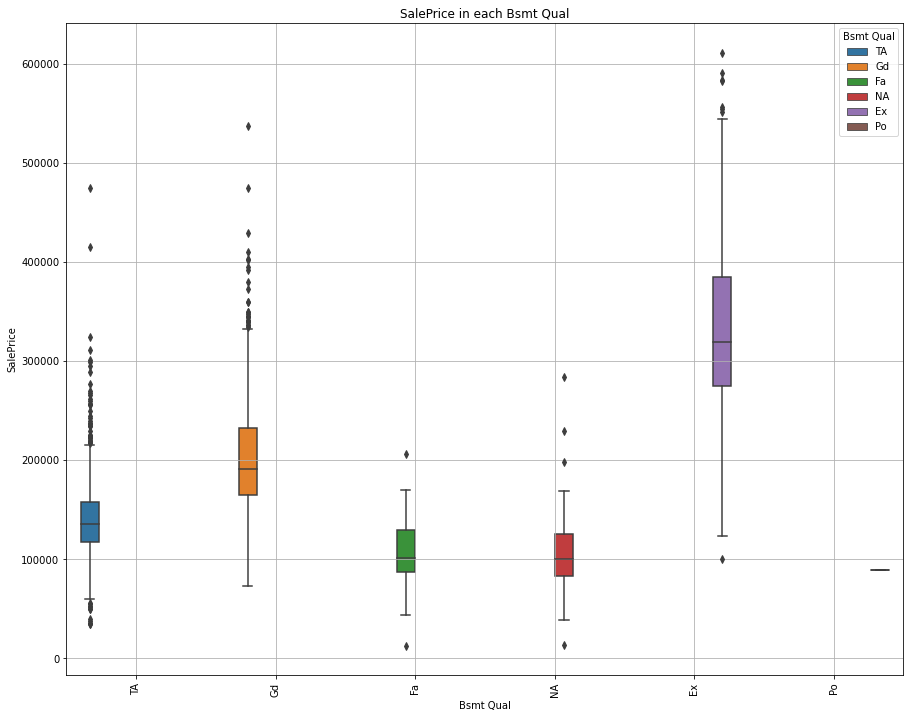

<Figure size 432x288 with 0 Axes>

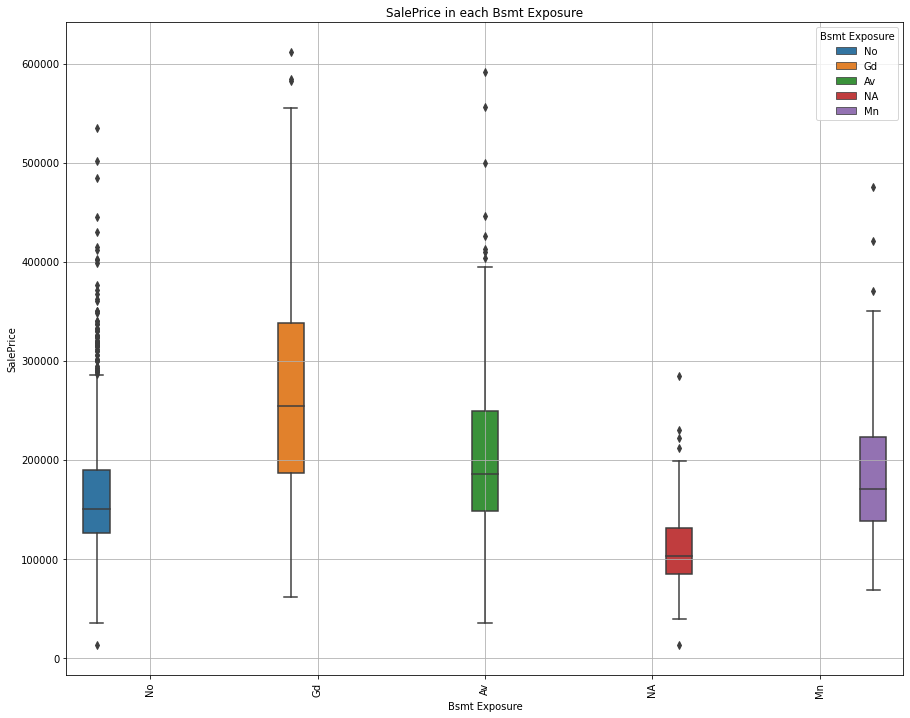

<Figure size 432x288 with 0 Axes>

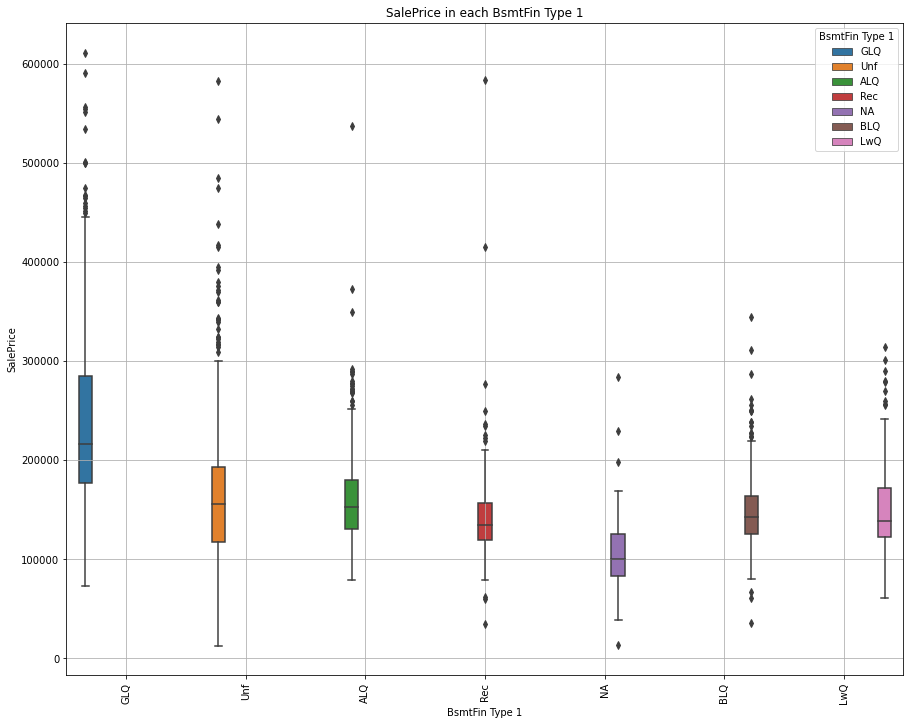

<Figure size 432x288 with 0 Axes>

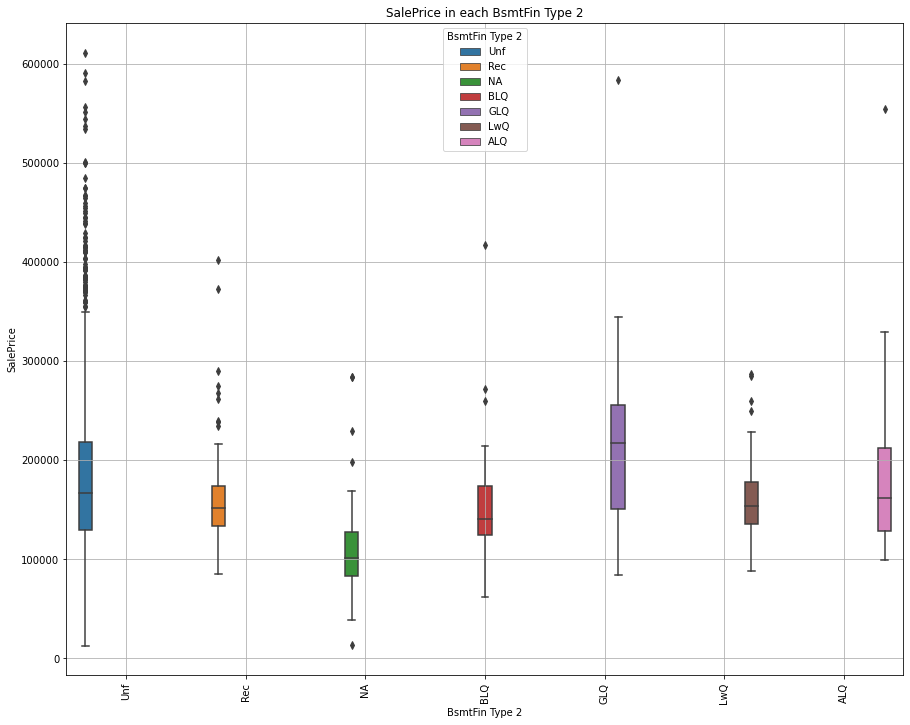

<Figure size 432x288 with 0 Axes>

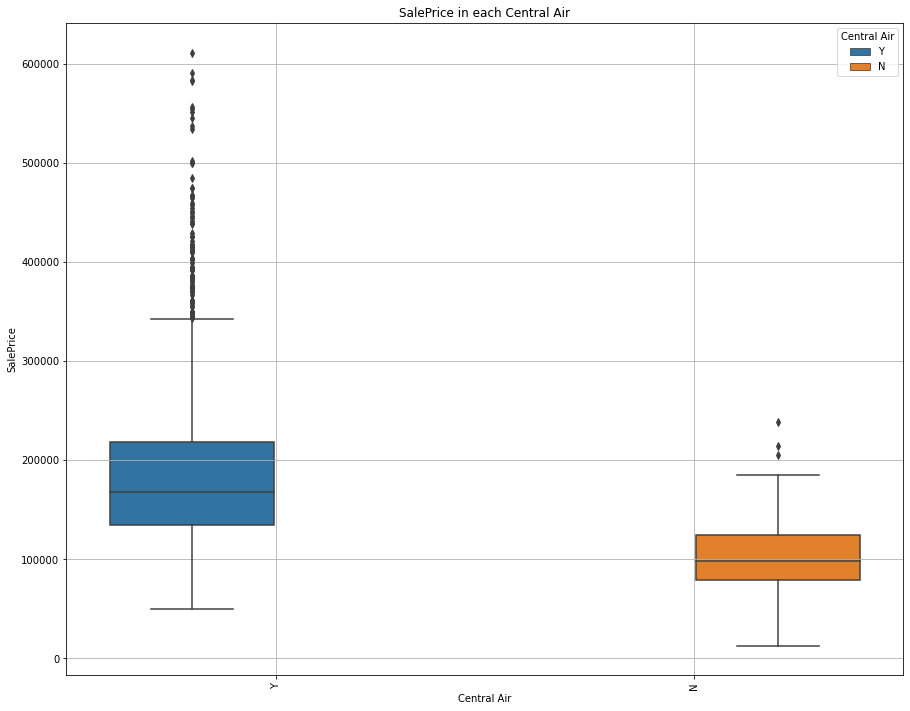

<Figure size 432x288 with 0 Axes>

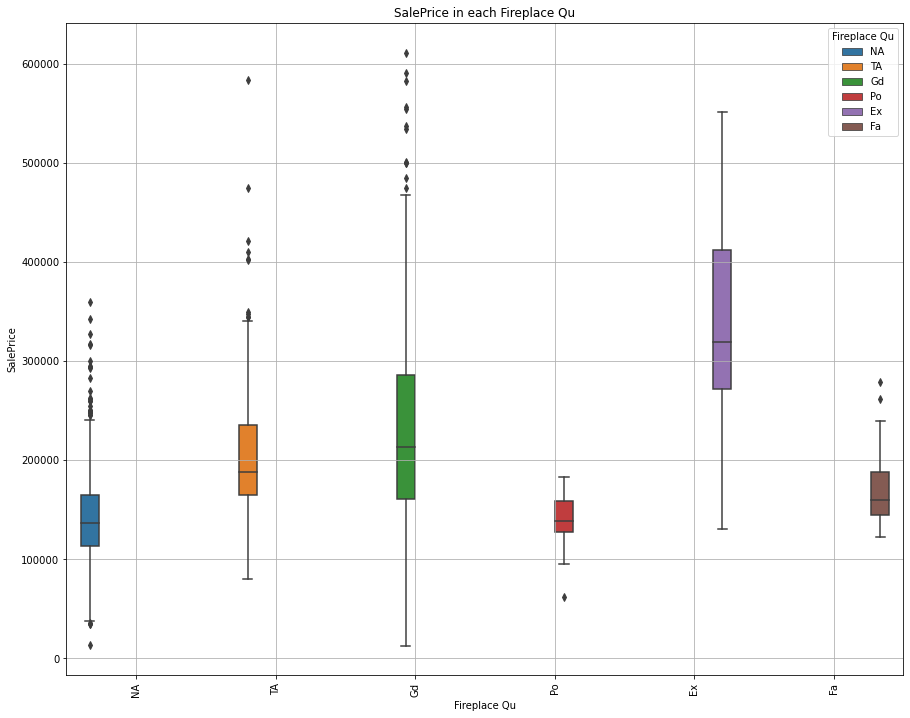

<Figure size 432x288 with 0 Axes>

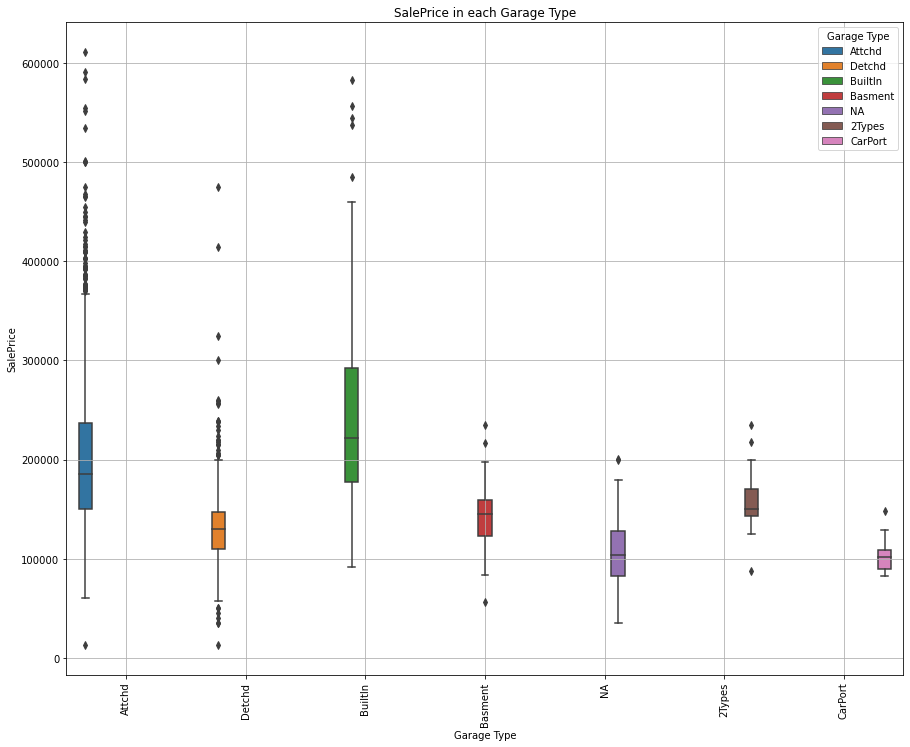

<Figure size 432x288 with 0 Axes>

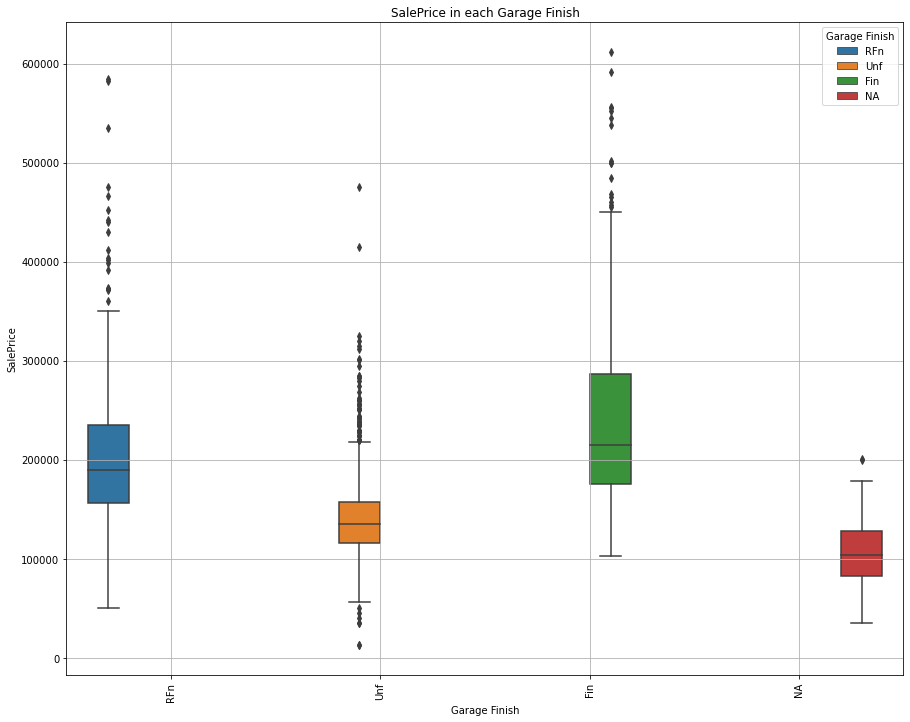

<Figure size 432x288 with 0 Axes>

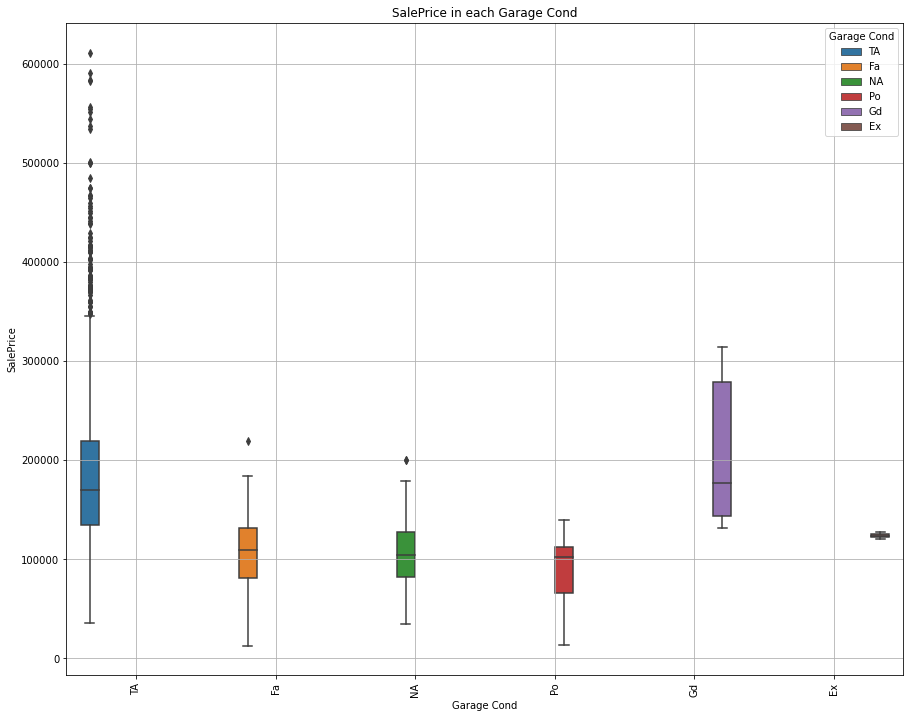

<Figure size 432x288 with 0 Axes>

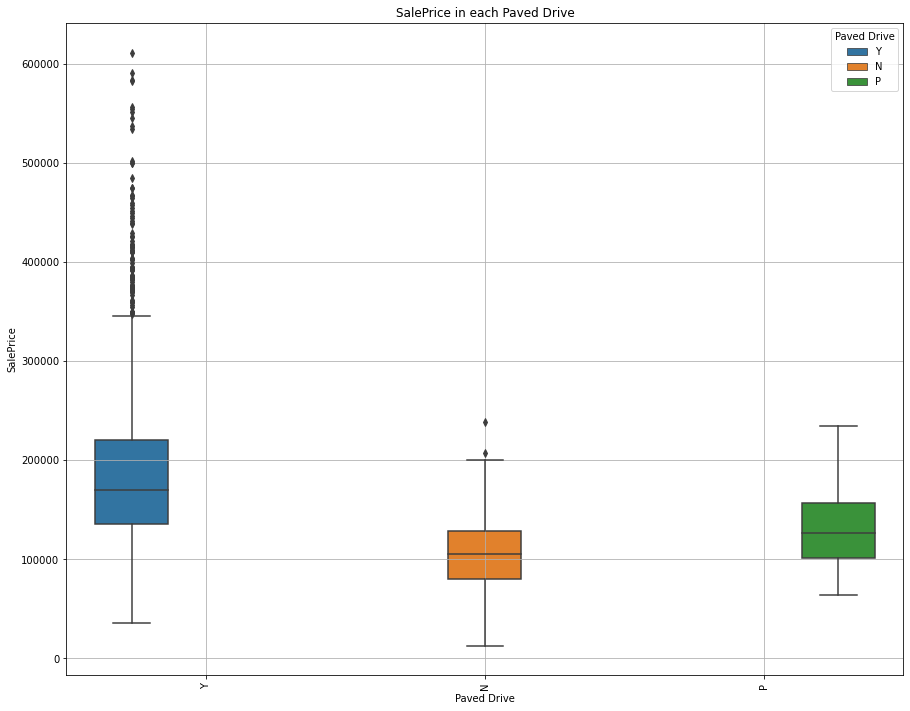

<Figure size 432x288 with 0 Axes>

In [376]:
cat_boxplot(model5_train, list_feature = cat_col)

In [377]:
len(cat_col)

23

In [378]:
col_to_drop = ['Land Slope','Alley','Roof Style','Bldg Type','BsmtFin Type 2']

In [379]:
model5_new = model5_train[num_features + cat_col]

In [380]:
model5_new.drop(columns = col_to_drop, inplace =True)

C:\Users\Peerawat\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [381]:
model5_new.shape

(2045, 30)

In [382]:
mod5_feature = [col for col in model5_new.columns]

In [383]:
cat_col = find_col_type(model5_new, 'Categorical')

In [384]:
model5_new = pd.get_dummies(data = model5_new, columns = cat_col)

In [385]:
features = [col for col in model5_new.columns]
X = model5_new[features]
y = model5_train['SalePrice']

In [386]:
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [387]:
linear(X_scaled,y)

--- EVALUATION: Linear Regression----

Train R2   : 0.898445851974179
Val R2     : -3.29193178249811e+23
Train RMSE : 25266.13533819061
Val RMSE   : 1.6626467782968396e+16


LinearRegression()

R squared on train data is hight while R squared on validation set is minus value, this means that our model is doing worse than baseline model because of the model is overfitting.

### Ridge regression

use ridge regression to solve overfitting problem

In [388]:
ridge_reg(X_scaled,y)

--- EVALUATION: Ridge Regression----

Train R2   : 0.8982283123004509
Val R2     : 0.8859743611974732
Train RMSE : 25293.182222208845
Val RMSE   : 26660.481331756582


Ridge(alpha=25.11886431509581)

Now R squared on validation set is colse to R squared on train data

## Lasso Regression

In [389]:
lasso_mod5 =lasso_reg(X_scaled,y)

--- EVALUATION: Lasso Regression----

Train R2   : 0.8965933726540927
Val R2     : 0.8871355926529656
Train RMSE : 25495.53745041009
Val RMSE   : 26533.510283188778


## ElasticNet Regression

In [390]:
elas_net_reg(X_scaled,y)

--- EVALUATION: ElasticNet Regression----

Train R2   : 0.7001876151806661
Val R2     : 0.6984299304344035
Train RMSE : 43412.497275463276
Val RMSE   : 43466.04949055228


ElasticNet(alpha=70.75007458069824, l1_ratio=0.9)

Lasso regression has the highest R squared and lowest root mean squared error when compare to other model, so I will use lasso to predict the sale price.

### Test Data

In [391]:
model5_test_new =  model5_test[num_features + cat_col]
model5_test['Full Bath'] =  model5_test['Full Bath'].astype('object')
model5_test_new = pd.get_dummies(data =model5_test, columns = cat_col)

In [392]:
X_test = model5_test_new[features]

In [393]:
X_test_scaled = ss.transform(X_test)

In [394]:
prediction = lasso_mod5.predict(X_test_scaled)

In [395]:
model5_df = test_df[['Id']]
model5_df['SalePrice'] = prediction

<ipython-input-395-f8c0fdb997d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model5_df['SalePrice'] = prediction


In [396]:
model5_df.to_csv('datasets/model/model5.csv', index = False)

In [397]:
# Create dataframe to look at coefficient for each features
mod5_coef_df = pd.DataFrame(lasso_mod5.coef_)
mod5_coef_df.rename(columns = {0:'Coefficient'}, inplace = True)
mod5_coef_df['Features'] = X.columns
mod5_coef_df

Coefficient        Features
0    14587.128517    Overall Qual
1    25075.010721     Gr Liv Area
2    12604.708110   Total Bsmt SF
3     8039.254459     Garage Area
4        0.000000     Garage Cars
..            ...             ...
104   -383.543938  Garage Cond_Po
105     -0.000000  Garage Cond_TA
106     -0.000000   Paved Drive_N
107    -19.679810   Paved Drive_P
108      0.000000   Paved Drive_Y

[109 rows x 2 columns]

Model 5 has the best score for public and private score on Kaggle.

# Conclusion and Recommendation

In [398]:
mod5_coef_df.sort_values('Coefficient', ascending = False).head(10)

Coefficient          Features
1   25075.010721       Gr Liv Area
0   14587.128517      Overall Qual
2   12604.708110     Total Bsmt SF
63   8647.443815      Bsmt Qual_Ex
3    8039.254459       Garage Area
48   8004.922268     Exter Qual_Ex
8    5378.382248    Year Remod/Add
70   3891.840559  Bsmt Exposure_Gd
59   3548.499928  Foundation_PConc
9    3292.163559      Mas Vnr Area

This project has created 5 models but model 5 has the lowest root mean squared error for public and private score when submit in Kaggle and Lasso regression by far has the best R squared for validation set at 88 percent and lowest root mean squared error for validation set at 26533.

### Top 5 features

These are top 5 features that affect the sale price of house in Aimes, Iowa

- The top feature affect sale price the most is ground living square feet with a coefficient at 25075, this means that if one unit increase in ground living square feet price of the house will increase 25,075 US dollar.

- The second feature affect sale price the most is overall material and finish quality with a coefficient at 14587, this means that if one unit increase in quality price of the house will increase 14,587 US dollar.

- The third feature affect sale price the most is total square feet of basement area with a coefficient at 12604, this means that if one unit increase in basement area price of the house will increase 12,604 US dollar.

- The fourth feature affect sale price the most is excellent height of the basement (100+ inches) with a coefficient at 8647, this means that if one unit increase in excellent height of the basement price of the house will increase 8,647 US dollar.

- The fifth feature affect sale price the most is garage area with a coefficient at 8039, this means that if one unit increase in garage area price of the house will increase 8,039 US dollar.

### Recommendation

#### Sellers
 - For people who want to sell their house in Aimes they can use this model to predict their house price.
 - For real estate agent they can use these top 5 features  to predict price of the house before buy or selling it, so they can gain the maximum profit.

#### Buyers
 - For people who want to buy house in Aimes they can use this top 5 features to find the house that suitable for their budget such as if they got a limit budget but wnat to find house that bigger they can find house that has lower material quality for a lower price.
